In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('../WORK/surf_bT_ret_171031.txt', header=None, delimiter=r"\s+", names = [' ', 'UTC', 'MY', 'L_s', 'LTST', 'Surf_lat', 'Surf_lon', 'Surf_rad', 'Surf_elev', 'T_surf', 'T_surf_err', 'Dust_column', 'Dust_column_err', 'H2Oice_column', 'H2Oice_column_err', 'p_surf', 'p_surf_err', 'P_qual', 'T_qual'])
#read data into dataframe

In [3]:
df.to_csv('mcs.csv')#converted dataframe to csv

MCS Retrieved Surface Brightness Temperatures   
v5.2.4 retrievals (2D all)  
-9999 means no data for the field  
Processed by: dkass at: Mon Oct 30 18:35:42 2017  

In [4]:
df.tail(510)#checking for correct data

UTC  MY       L_s      LTST  Surf_lat  \
5840318  30-Oct-2017  18:54:24.492  34  81.08898  0.171332  80.67136   
5840319  30-Oct-2017  18:55:30.023  34  81.08931  0.158654  77.33440   
5840320  30-Oct-2017  18:57:39.047  34  81.08997  0.148147  71.95193   
5840321  30-Oct-2017  18:58:42.539  34  81.09029  0.144202  68.56493   
5840322  30-Oct-2017  18:59:48.078  34  81.09063  0.141376  65.28345   
5840323  30-Oct-2017  19:01:32.523  34  81.09115  0.137319  58.56446   
5840324  30-Oct-2017  19:02:38.055  34  81.09149  0.135761  54.97847   
5840325  30-Oct-2017  19:03:41.539  34  81.09181  0.134464  51.44247   
5840326  30-Oct-2017  19:04:47.078  34  81.09214  0.133328  47.80697   
5840327  30-Oct-2017  19:05:50.570  34  81.09246  0.133332  47.80697   
5840328  30-Oct-2017  19:07:00.203  34  81.09281  0.132396  44.34047   
5840329  30-Oct-2017  19:08:07.781  34  81.09315  0.131523  40.71248   
5840330  30-Oct-2017  19:09:17.414  34  81.09351  0.130384  35.21248   
5840331  30-Oct-2017  19:10:24.992  34  81.09385  0.129730  31.64649   
5840332  30-Oct-2017  19:11:34.633  34  81.09420  0.129064  27.95749   
5840333  30-Oct-2017  19:13:23.172  34  81.09476  0.128494  24.32949   
5840334  30-Oct-2017  19:16:50.016  34  81.09580  0.126928  13.59850   
5840335  30-Oct-2017  19:17:57.602  34  81.09614  0.126459  10.01849   
5840336  30-Oct-2017  19:19:07.234  34  81.09650  0.125935   5.14353   
5840337  30-Oct-2017  19:21:24.453  34  81.09719  0.124763  -2.89500   
5840338  30-Oct-2017  19:23:12.992  34  81.09774  0.124315  -6.51050   
5840339  30-Oct-2017  19:24:22.625  34  81.09809  0.123838 -10.09049   
5840340  30-Oct-2017  19:25:30.203  34  81.09844  0.123333 -13.78149   
5840341  30-Oct-2017  19:26:39.836  34  81.09879  0.122823 -17.37649   
5840342  30-Oct-2017  19:27:47.422  34  81.09913  0.122297 -21.03299   
5840343  30-Oct-2017  19:28:57.055  34  81.09949  0.121733 -24.64799   
5840344  30-Oct-2017  19:30:04.641  34  81.09983  0.121139 -28.32599   
5840345  30-Oct-2017  19:31:14.266  34  81.10018  0.120441 -33.21166   
5840346  30-Oct-2017  19:32:21.852  34  81.10052  0.120054 -34.19148   
5840347  30-Oct-2017  19:33:31.484  34  81.10088  0.118531 -39.70364   
...              ...           ...  ..       ...       ...       ...   
5840798  31-Oct-2017  03:42:22.752  34  81.24949  0.626991 -10.93200   
5840799  31-Oct-2017  03:42:53.472  34  81.24964  0.626684  -6.83900   
5840800  31-Oct-2017  03:43:54.911  34  81.24995  0.626138  -5.01800   
5840801  31-Oct-2017  03:44:25.631  34  81.25011  0.626151  -5.01800   
5840802  31-Oct-2017  03:47:23.807  34  81.25101  0.624311   6.59650   
5840803  31-Oct-2017  03:48:33.438  34  81.25137  0.623493   9.89300   
5840804  31-Oct-2017  03:49:41.021  34  81.25170  0.622620  13.19099   
5840805  31-Oct-2017  03:50:28.125  34  81.25195  0.621901  16.49999   
5840806  31-Oct-2017  03:50:58.844  34  81.25210  0.621538  18.18199   
5840807  31-Oct-2017  03:51:29.564  34  81.25226  0.621171  19.86499   
5840808  31-Oct-2017  03:52:00.284  34  81.25241  0.620823  21.49199   
5840809  31-Oct-2017  03:52:31.003  34  81.25257  0.620455  23.17599   
5840810  31-Oct-2017  03:53:01.725  34  81.25272  0.620115  24.80199   
5840811  31-Oct-2017  03:53:32.443  34  81.25288  0.620129  24.80199   
5840812  31-Oct-2017  03:54:03.164  34  81.25304  0.619142  29.67598   
5840813  31-Oct-2017  03:54:33.883  34  81.25319  0.619133  29.67598   
5840814  31-Oct-2017  03:55:04.604  34  81.25335  0.618820  31.35499   
5840815  31-Oct-2017  03:55:35.323  34  81.25350  0.618550  32.97498   
5840816  31-Oct-2017  03:56:06.042  34  81.25366  0.618393  34.64298   
5840817  31-Oct-2017  03:56:36.761  34  81.25381  0.618423  36.26548   
5840818  31-Oct-2017  03:56:47.002  34  81.25386  0.618420  36.26548   
5840819  31-Oct-2017  03:56:57.242  34  81.25392  0.618368  37.94198   
5840820  31-Oct-2017  03:57:07.482  34  81.25397  0.618388  37.94198   
5840821  31-Oct-2017  03:57:17.722  34  81.25402  0.618385  37.94198   

In [5]:
df.columns#checking for correct data order

Index([u' ', u'UTC', u'MY', u'L_s', u'LTST', u'Surf_lat', u'Surf_lon',
       u'Surf_rad', u'Surf_elev', u'T_surf', u'T_surf_err', u'Dust_column',
       u'Dust_column_err', u'H2Oice_column', u'H2Oice_column_err', u'p_surf',
       u'p_surf_err', u'P_qual', u'T_qual'],
      dtype='object')

In [6]:
df.dtypes #undesrstanding datatypes of each column

                      object
UTC                   object
MY                     int64
L_s                  float64
LTST                 float64
Surf_lat             float64
Surf_lon             float64
Surf_rad             float64
Surf_elev            float64
T_surf               float64
T_surf_err           float64
Dust_column          float64
Dust_column_err      float64
H2Oice_column        float64
H2Oice_column_err    float64
p_surf               float64
p_surf_err           float64
P_qual                 int64
T_qual                 int64
dtype: object

In [7]:
UTC_df = df['UTC'] #for this I assigned the Dataframe columns to specific variables
MY_df = df['MY'] 
L_s_df = df['L_s']
LTST_df = df['LTST'] 
Surf_lat_df = df['Surf_lat'] 
Surf_lon_df = df['Surf_lon'] 
Surf_rad_df = df['Surf_rad'] 
Surf_elev_df = df['Surf_elev'] 
T_surf_df = df['T_surf'] 
T_surf_err_df = df['T_surf_err'] 
Dust_column_df = df['Dust_column'] 
Dust_column_err_df = df['Dust_column_err'] 
H2Oice_column_df = df['H2Oice_column']
H2Oice_column_err_df = df['H2Oice_column_err'] 
p_surf_df = df['p_surf'] 
p_surf_err_df = df['p_surf_err']
P_qual_df = df['P_qual'] 
T_qual_df = df['T_qual']

In [8]:
#created arrays to graph
Time = np.array(LTST_df)
Temp = np.array(T_surf_df)

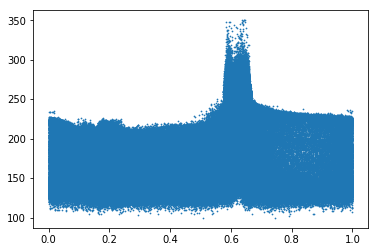

In [9]:
#graphed to deduce time of the day
plt.scatter(Time,Temp, s= .5 )
plt.show()

from 0.5 to 1.0 LTST it is daytime
from 0.0 to 0.5 LTST it is nighttime

In [10]:
UTC_df_sample = UTC_df.head(25) #sampled the previous variables to small amount of sets
MY_df_sample = MY_df.head(25)
L_s_df_sample = L_s_df.head(25)
LTST_df_sample = LTST_df.head(25)
Surf_lat_df_sample = Surf_lat_df.head(25)
Surf_lon_df_sample = Surf_lon_df.head(25)
Surf_rad_df_sample = Surf_rad_df.head(25)
Surf_elev_df_sample = Surf_elev_df.head(25)
T_surf_df_sample = T_surf_df.head(25)
T_surf_err_sample = T_surf_err_df.head(25)
Dust_column_df_sample = Dust_column_df.head(25)
Dust_column_err_df_sample = Dust_column_err_df.head(25)
H2Oice_column_df_sample = H2Oice_column_df.head(25)
H2Oice_column_err_df_sample = H2Oice_column_err_df.head(25)
p_surf_df_sample = p_surf_df.head(25)
p_surf_err_df_sample = p_surf_err_df.head(25)
P_qual_df_sample = P_qual_df.head(25)
T_qual_df_sample = T_qual_df.head(25)

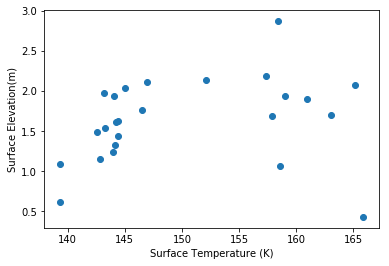

In [11]:
plt.scatter(T_surf_df_sample,Surf_elev_df_sample) #plotted sampled data (Surface temperature vs. Surface elevation)
plt.errorbar(T_surf_df_sample,Surf_elev_df_sample, xerr=T_surf_err_sample, fmt='|')
plt.xlabel('Surface Temperature (K)')
plt.ylabel('Surface Elevation(m)')
plt.show()

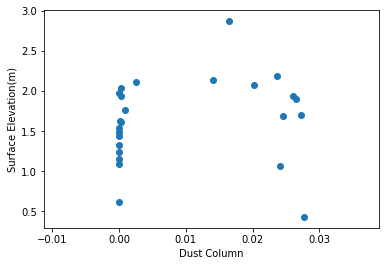

In [12]:
plt.scatter(Dust_column_df_sample,Surf_elev_df_sample) #plotted sampled data (Dust column vs. Surface elevation)
plt.errorbar(Dust_column_df_sample,Surf_elev_df_sample, xerr=Dust_column_err_df_sample, fmt='|')
plt.xlabel('Dust Column')
plt.ylabel('Surface Elevation(m)')
plt.show()

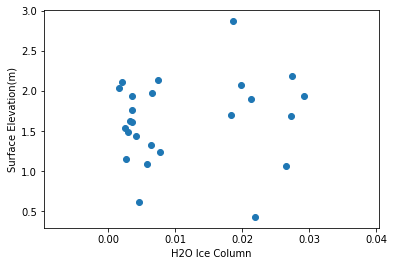

In [13]:
plt.scatter(H2Oice_column_df_sample,Surf_elev_df_sample) 
plt.errorbar(H2Oice_column_df_sample,Surf_elev_df_sample, xerr=H2Oice_column_err_df_sample, fmt='|')
plt.xlabel('H2O Ice Column')
plt.ylabel('Surface Elevation(m)')
plt.show()
#plotted sampled data (H2O Ice Column vs. Surface elevation)

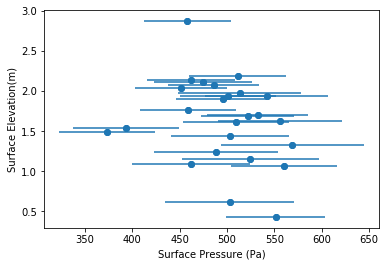

In [14]:
plt.scatter(p_surf_df_sample,Surf_elev_df_sample)
plt.errorbar(p_surf_df_sample,Surf_elev_df_sample, xerr=p_surf_err_df_sample, fmt='o')
plt.xlabel('Surface Pressure (Pa)')
plt.ylabel('Surface Elevation(m)')
plt.show()
#plotted sampled data (Surface pressure with error vs. Surface elevation)

In [15]:
new_df = df[((Surf_elev_df >= -3.632) & (Surf_elev_df  <= -3.631))] #viking 1
new_df2 = df[((Surf_elev_df >= -4.508) & (Surf_elev_df  <= -4.504))] #viking 2
#created 2 new dataframes constraining the initial dataframe to the altitudes of viking 1 & 2 

In [16]:
UTC_new_df = new_df['UTC']
MY_new_df = new_df['MY'] 
L_s_new_df = new_df['L_s']
LTST_new_df = new_df['LTST'] 
Surf_lat_new_df = new_df['Surf_lat'] 
Surf_lon_new_df = new_df['Surf_lon'] 
Surf_rad_new_df = new_df['Surf_rad'] 
Surf_elev_new_df = new_df['Surf_elev'] 
T_surf_new_df = new_df['T_surf'] 
T_surf_err_new_df = new_df['T_surf_err'] 
Dust_column_new_df = new_df['Dust_column'] 
Dust_column_err_new_df = new_df['Dust_column_err'] 
H2Oice_column_new_df = new_df['H2Oice_column']
H2Oice_column_err_new_df = new_df['H2Oice_column_err'] 
p_surf_new_df = new_df['p_surf'] 
p_surf_err_new_df = new_df['p_surf_err']
P_qual_new_df = new_df['P_qual'] 
T_qual_new_df = new_df['T_qual']
#for this I assigned the Dataframe columns to specific variables for Viking 1

In [17]:
UTC_new_df2 = new_df2['UTC'] 
MY_new_df2 = new_df2['MY'] 
L_s_new_df2 = new_df2['L_s']
LTST_new_df2 = new_df2['LTST'] 
Surf_lat_new_df2 = new_df2['Surf_lat'] 
Surf_lon_new_df2 = new_df2['Surf_lon'] 
Surf_rad_new_df2 = new_df2['Surf_rad'] 
Surf_elev_new_df2 = new_df2['Surf_elev'] 
T_surf_new_df2 = new_df2['T_surf'] 
T_surf_err_new_df2 = new_df2['T_surf_err'] 
Dust_column_new_df2 = new_df2['Dust_column'] 
Dust_column_err_new_df2 = new_df2['Dust_column_err'] 
H2Oice_column_new_df2 = new_df2['H2Oice_column']
H2Oice_column_err_new_df2 = new_df2['H2Oice_column_err'] 
p_surf_new_df2 = new_df2['p_surf'] 
p_surf_err_new_df2 = new_df2['p_surf_err']
P_qual_new_df2 = new_df2['P_qual'] 
T_qual_new_df2 = new_df2['T_qual']
#for this I assigned the Dataframe columns to specific variables for Viking 2

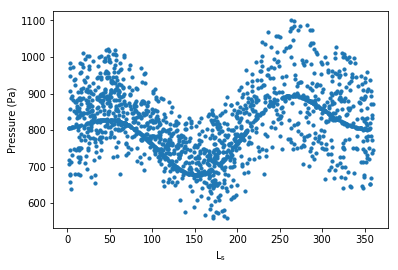

In [18]:
plt.scatter(L_s_new_df,p_surf_new_df, s = 10)
plt.ylabel('Pressure (Pa)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface pressure for viking 1 vs L_s

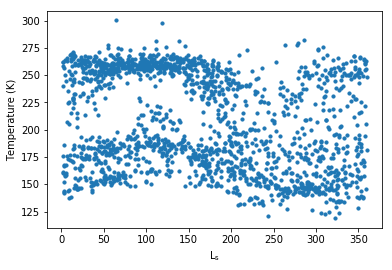

In [19]:
plt.scatter(L_s_new_df,T_surf_new_df, s = 10)
plt.ylabel('Temperature (K)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface temperature for viking 1 vs L_s

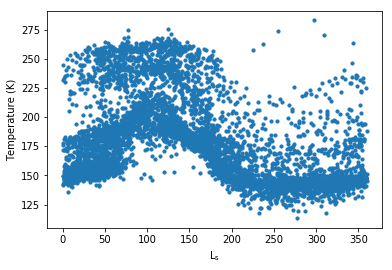

In [20]:
plt.scatter(L_s_new_df2,T_surf_new_df2, s = 10)
plt.ylabel('Temperature (K)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface temperature for viking 2 vs L_s

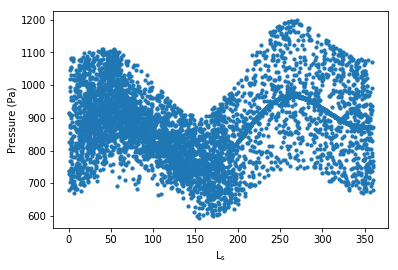

In [21]:
plt.scatter(L_s_new_df2,p_surf_new_df2,s = 10)
plt.ylabel('Pressure (Pa)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface pressure for viking 2 vs L_s

In [22]:
########
# pco2 #
########
# --------------------------------------------
# Equilibrium vapor pressure over solid CO2
# Brown and Ziegler (1980)
# --------------------------------------------
# Input:
#    T = temperature of solid [K]
# Output:
#    vapor pressure [Pa]
def pco2(T):
    A0 = 2.13807649e1
    A1 = -2.57064700e3
    A2 = -7.78129489e4
    A3 = 4.32506256e6
    A4 = -1.20671368e8
    A5 = 1.34966306e9
    # Pressure in torr
    ptorr = np.exp(A0 + (A1/(T)) + (A2/(T**2)) + (A3/(T**3)) + (A4/(T**4)) + (A5/(T**5)))
    # Pressure in Pa
    p = ptorr*133.3223684211
    return p

In [23]:
prep= (pco2(T_surf_new_df), p_surf_new_df, T_surf_new_df, L_s_new_df, Surf_lat_new_df, Surf_lon_new_df)
prep2 = (pco2(T_surf_new_df2),p_surf_new_df2, T_surf_new_df2,L_s_new_df2, Surf_lat_new_df2, Surf_lon_new_df2)
prep_pco2 = np.transpose(prep)
prep_pco2_2 = np.transpose(prep2)
#evaluated the previous function with the viking 1 temperatures and created a list that 
#contains pressure and temperature as well as L_s for graphing (prep) 
#evaluated the previous function with the viking 2 temperatures and created a list that 
#contains pressure and temperature as well as L_s for graphing (prep2) 

In [24]:
Viking1_EVP = pd.DataFrame(list(prep_pco2))
Viking1_EVP.columns = ['Eq_Vap_P','p_surf','T_surf', 'L_s' , 'Lat', 'Long']
Eq_Vap_P_Vik1 = Viking1_EVP['Eq_Vap_P']
p_surf_Vik1 = Viking1_EVP['p_surf']
T_surf_Vik1 = Viking1_EVP['T_surf']
L_s_Vik1 = Viking1_EVP['L_s']
Lat_Vik1 = Viking1_EVP['Lat']
Long_Vik1 = Viking1_EVP['Long']
#converted the previous list for viking 1 into a dataframe and converted the columns into variables

In [25]:
Viking2_EVP = pd.DataFrame(list(prep_pco2_2))
Viking2_EVP.columns = ['Eq_Vap_P','p_surf','T_surf', 'L_s' , 'Lat', 'Long']
Eq_Vap_P_Vik2 = Viking2_EVP['Eq_Vap_P']
p_surf_Vik2 = Viking2_EVP['p_surf']
T_surf_Vik2 = Viking2_EVP['T_surf']
L_s_Vik2 = Viking2_EVP['L_s']
Lat_Vik2 = Viking2_EVP['Lat']
Long_Vik2 = Viking2_EVP['Long']
#converted the previous list for viking 2 into a dataframe and converted the columns into variables

In [26]:
new_Viking1_EVP = Viking1_EVP[(Eq_Vap_P_Vik1 <= 650)]
new_Viking2_EVP = Viking2_EVP[(Eq_Vap_P_Vik2 <= 650)]
#converted the previous dataframes for viking 1 & 2 into two new dataframes with pressure constraints

In [27]:
New_Eq_Vap_P_Vik1 = new_Viking1_EVP['Eq_Vap_P']
New_T_surf_Vik1 = new_Viking1_EVP['T_surf']
New_p_surf_Vik1 = new_Viking1_EVP['p_surf']
New_L_s_Vik1 = new_Viking1_EVP['L_s']
New_Lat_Vik1 = new_Viking1_EVP['Lat']
New_Long_Vik1 = new_Viking1_EVP['Long']
#converted the columns of the constrained viking 1 dataframe into variables

In [28]:
New_Eq_Vap_P_Vik2 = new_Viking2_EVP['Eq_Vap_P']
New_T_surf_Vik2 = new_Viking2_EVP['T_surf']
New_p_surf_Vik2 = new_Viking2_EVP['p_surf']
New_L_s_Vik2 = new_Viking2_EVP['L_s']
New_Lat_Vik2 = new_Viking2_EVP['Lat']
New_Long_Vik2 = new_Viking2_EVP['Long']
#converted the columns of the constrained viking 2 dataframe into variables

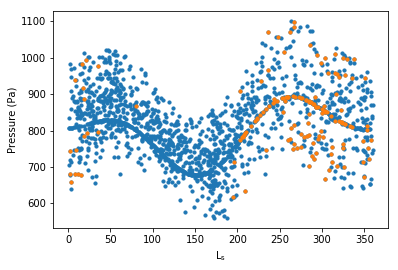

In [29]:
plt.scatter(L_s_new_df,p_surf_new_df, s = 10)
plt.scatter(New_L_s_Vik1,New_p_surf_Vik1, s = 10)
plt.ylabel('Pressure (Pa)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface pressure for viking 1 with pressure constraint vs L_s

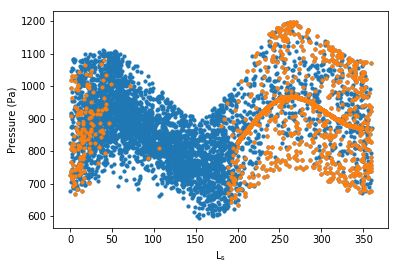

In [30]:
plt.scatter(L_s_new_df2,p_surf_new_df2, s = 10)
plt.scatter(New_L_s_Vik2,New_p_surf_Vik2, s = 10)
plt.ylabel('Pressure (Pa)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface pressure for viking 2 with pressure constraint vs L_s

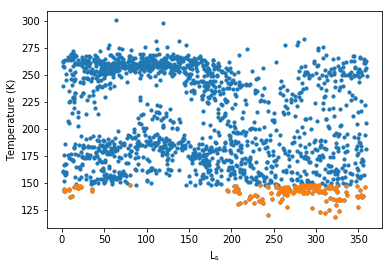

In [31]:
plt.scatter(L_s_new_df,T_surf_new_df, s = 10)
plt.scatter(New_L_s_Vik1,New_T_surf_Vik1, s = 10)
plt.ylabel('Temperature (K)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface temperature for viking 1 with pressure constraint vs L_s

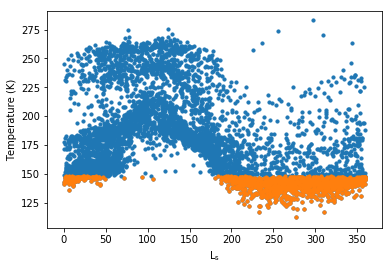

In [32]:
plt.scatter(L_s_new_df2,T_surf_new_df2, s = 10)
plt.scatter(New_L_s_Vik2,New_T_surf_Vik2, s = 10)
plt.ylabel('Temperature (K)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface temperature for viking 2 with pressure constraint vs L_s

In [33]:
new_df5 = df[((T_surf_df >= 273) & (T_surf_df <= 373) & (p_surf_df >= 600))]
# created dataframe with constrained data to satisfy conditions of liquid water

In [34]:
surflat = np.array(Surf_lat_df)
np.max(surflat)

89.528530000000003

In [35]:
new_df3 = df[((Surf_elev_df >= -3.632) & (Surf_elev_df  <= -3.631) & (T_surf_df >= 273) & (T_surf_df <= 373) & (p_surf_df >= 600))]
new_df4 = df[((Surf_elev_df >= -4.508) & (Surf_elev_df  <= -4.504) & (T_surf_df >= 273) & (T_surf_df <= 373) & (p_surf_df >= 600))]
#created dataframe with constrained data to satisfy conditions of liquid water with viking 1 and 2 altitudes

In [36]:
UTC_new_df3 = new_df3['UTC']
MY_new_df3 = new_df3['MY'] 
L_s_new_df3 = new_df3['L_s']
LTST_new_df3 = new_df3['LTST'] 
Surf_lat_new_df3 = new_df3['Surf_lat'] 
Surf_lon_new_df3 = new_df3['Surf_lon'] 
Surf_rad_new_df3= new_df3['Surf_rad'] 
Surf_elev_new_df3 = new_df3['Surf_elev'] 
T_surf_new_df3 = new_df3['T_surf'] 
T_surf_err_new_df3 = new_df3['T_surf_err'] 
Dust_column_new_df3 = new_df3['Dust_column'] 
Dust_column_err_new_df3 = new_df3['Dust_column_err'] 
H2Oice_column_new_df3 = new_df3['H2Oice_column']
H2Oice_column_err_new_df3 = new_df3['H2Oice_column_err'] 
p_surf_new_df3 = new_df3['p_surf'] 
p_surf_err_new_df3 = new_df3['p_surf_err']
P_qual_new_df3 = new_df3['P_qual'] 
T_qual_new_df3 = new_df3['T_qual']
#for this I assigned the Dataframe columns to specific variables for Viking 1 with liquid water conditions

In [37]:
UTC_new_df4 = new_df4['UTC']
MY_new_df4 = new_df4['MY'] 
L_s_new_df4 = new_df4['L_s']
LTST_new_df4 = new_df4['LTST'] 
Surf_lat_new_df4 = new_df4['Surf_lat'] 
Surf_lon_new_df4 = new_df4['Surf_lon'] 
Surf_rad_new_df4 = new_df4['Surf_rad'] 
Surf_elev_new_df4 = new_df4['Surf_elev'] 
T_surf_new_df4 = new_df4['T_surf'] 
T_surf_err_new_df4 = new_df4['T_surf_err'] 
Dust_column_new_df4 = new_df4['Dust_column'] 
Dust_column_err_new_df4 = new_df4['Dust_column_err'] 
H2Oice_column_new_df4 = new_df4['H2Oice_column']
H2Oice_column_err_new_df4 = new_df4['H2Oice_column_err'] 
p_surf_new_df4 = new_df4['p_surf'] 
p_surf_err_new_df4 = new_df4['p_surf_err']
P_qual_new_df4 = new_df4['P_qual'] 
T_qual_new_df4 = new_df4['T_qual']
#for this I assigned the Dataframe columns to specific variables for Viking 2 with liquid water conditions

In [38]:
UTC_new_df5 = new_df5['UTC']
MY_new_df5 = new_df5['MY'] 
L_s_new_df5 = new_df5['L_s']
LTST_new_df5 = new_df5['LTST'] 
Surf_lat_new_df5 = new_df5['Surf_lat'] 
Surf_lon_new_df5 = new_df5['Surf_lon'] 
Surf_rad_new_df5 = new_df5['Surf_rad'] 
Surf_elev_new_df5 = new_df5['Surf_elev'] 
T_surf_new_df5 = new_df5['T_surf'] 
T_surf_err_new_df5 = new_df5['T_surf_err'] 
Dust_column_new_df5 = new_df5['Dust_column'] 
Dust_column_err_new_df5 = new_df5['Dust_column_err'] 
H2Oice_column_new_df5 = new_df5['H2Oice_column']
H2Oice_column_err_new_df5 = new_df5['H2Oice_column_err'] 
p_surf_new_df5 = new_df5['p_surf'] 
p_surf_err_new_df5 = new_df5['p_surf_err']
P_qual_new_df5 = new_df5['P_qual'] 
T_qual_new_df5 = new_df5['T_qual']
#for this I assigned the Dataframe columns to specific variables for all data with liquid water conditions

In [39]:
len(L_s_new_df5) #data that satisfies liquid water conditions

55882

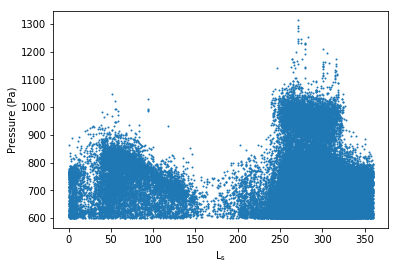

In [40]:
plt.scatter(L_s_new_df5,p_surf_new_df5,s = 1)
plt.ylabel('Pressure (Pa)')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted surface pressure with liquid water conditions vs L_s 

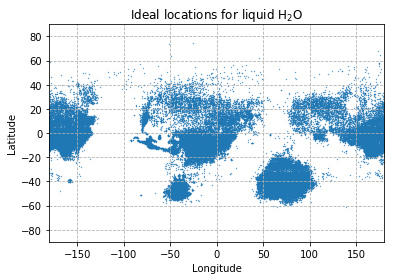

In [41]:
plt.scatter(Surf_lon_new_df5 ,Surf_lat_new_df5 ,s = 0.1)
plt.grid(linestyle='--')
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ideal locations for liquid $\mathregular{H_2O}$ ')
plt.show()
#plotted in a 2D map projection the points that satisfy liquid water conditions

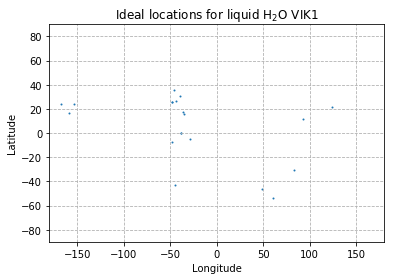

In [42]:
plt.scatter(Surf_lon_new_df3 ,Surf_lat_new_df3, s=1)
plt.grid(linestyle='--')
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ideal locations for liquid $\mathregular{H_2O}$ VIK1')
plt.show()
#plotted in a 2D map projection the points that satisfy liquid water conditions fro Viking 1

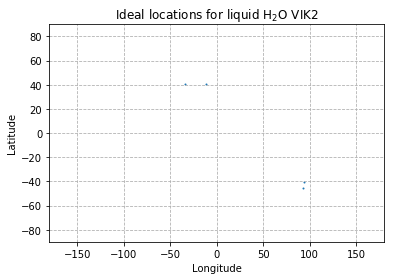

In [43]:
plt.scatter(Surf_lon_new_df4 ,Surf_lat_new_df4,s=1)
plt.grid(linestyle='--')
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ideal locations for liquid $\mathregular{H_2O}$ VIK2')
plt.show()
#plotted in a 2D map projection the points that satisfy liquid water conditions for Viking 2

In [44]:
cond = (pco2(T_surf_df), p_surf_df, T_surf_df, L_s_df, Surf_lat_df, Surf_lon_df, Dust_column_df, Surf_rad_df )
cond_right= np.transpose(cond)
#created a DataFrame using the empirical pressure formula and all of data from MCS

In [45]:
CO2 = pd.DataFrame(list(cond_right))
CO2.columns = ['Eq_Vap_P','p_surf','T_surf', 'L_s' , 'Lat', 'Long', 'Dust', 'Surf_rad']
Eq_Vap_P_CO2 = CO2['Eq_Vap_P']
p_surf_CO2 = CO2['p_surf']
T_surf_CO2 = CO2['T_surf']
L_s_CO2 = CO2['L_s']
Lat_CO2 = CO2['Lat']
Long_CO2 = CO2['Long']
Dust_column_CO2 =CO2['Dust']
Surf_rad_CO2 = CO2['Surf_rad']

#for this I assigned the Dataframe columns to specific variables based on the previous dataframe

In [46]:
new_CO2 = CO2[(Eq_Vap_P_CO2 <= 650)]
#constrained the previous Dataframe to a pressure that allows CO2 condensation

In [47]:
new_Eq_Vap_P_CO2 = new_CO2['Eq_Vap_P']
new_p_surf_CO2 = new_CO2['p_surf']
new_T_surf_CO2 = new_CO2['T_surf']
new_L_s_CO2= new_CO2['L_s']
new_Lat_CO2 = new_CO2['Lat']
new_Long_CO2 = new_CO2['Long']
new_Dust_column_CO2 = new_CO2['Dust']
new_Surf_rad_CO2 = new_CO2['Surf_rad']
#for this I assigned the Dataframe columns to specific variables based on the dataframe above

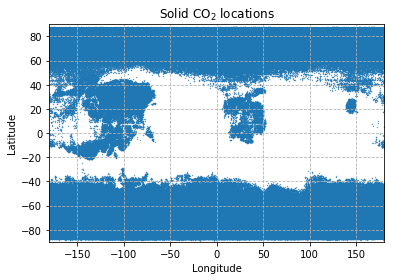

In [48]:
plt.scatter(new_Long_CO2, new_Lat_CO2, s = .1)
plt.grid(linestyle='--')
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Solid $\mathregular{CO_2}$ locations')
plt.show()
#plotted in a 2D map projection the points that satisfy solid CO2 conditions throughout the martian year

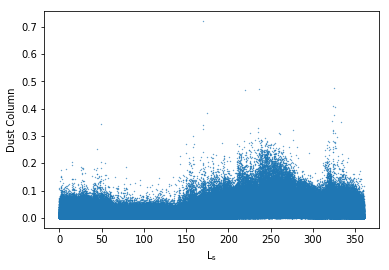

In [49]:
plt.scatter(new_L_s_CO2, new_Dust_column_CO2, s=.1)
plt.ylabel('Dust Column')
plt.xlabel('$\mathregular{L_s}$')
plt.show()
#plotted dust column vs. L_s for CO2 frost point

In [50]:
new_CO2_NSP = CO2[(Eq_Vap_P_CO2 <= 650) & (L_s_CO2 <= 90)  & (L_s_CO2 >= 0)]
new_CO2_NSM = CO2[(Eq_Vap_P_CO2 <= 650) & (L_s_CO2 <= 180)  & (L_s_CO2 >= 90)]
new_CO2_NFA = CO2[(Eq_Vap_P_CO2 <= 650) & (L_s_CO2 <= 270)  & (L_s_CO2 >= 180)]
new_CO2_NWI = CO2[(Eq_Vap_P_CO2 <= 650) & (L_s_CO2 <= 360)  & (L_s_CO2 >= 270)]
#refined CO2 Dataframe to smaller dataframes dependent on seasons in Northern Hemisphere
#thus I had to make 4 different dataframes(1 per season based on the Northern Hemisphere)

In [51]:
new_Eq_Vap_P_CO2_NSP = new_CO2_NSP['Eq_Vap_P']
new_p_surf_CO2_NSP = new_CO2_NSP['p_surf']
new_T_surf_CO2_NSP = new_CO2_NSP['T_surf']
new_L_s_CO2_NSP = new_CO2_NSP['L_s']
new_Lat_CO2_NSP = new_CO2_NSP['Lat']
new_Long_CO2_NSP = new_CO2_NSP['Long']
new_Surf_rad_NSP = new_CO2_NSP['Surf_rad']
#created columns values for the Northern Spring

In [52]:
new_Eq_Vap_P_CO2_NSM = new_CO2_NSM['Eq_Vap_P']
new_p_surf_CO2_NSM = new_CO2_NSM['p_surf']
new_T_surf_CO2_NSM = new_CO2_NSM['T_surf']
new_L_s_CO2_NSM = new_CO2_NSM['L_s']
new_Lat_CO2_NSM = new_CO2_NSM['Lat']
new_Long_CO2_NSM = new_CO2_NSM['Long']
new_Surf_rad_NSM = new_CO2_NSM['Surf_rad']
#created columns values for the Northern Summer

In [53]:
new_Eq_Vap_P_CO2_NFA = new_CO2_NFA['Eq_Vap_P']
new_p_surf_CO2_NFA = new_CO2_NFA['p_surf']
new_T_surf_CO2_NFA = new_CO2_NFA['T_surf']
new_L_s_CO2_NFA = new_CO2_NFA['L_s']
new_Lat_CO2_NFA = new_CO2_NFA['Lat']
new_Long_CO2_NFA = new_CO2_NFA['Long']
new_Surf_rad_NFA = new_CO2_NFA['Surf_rad']
#created columns values for the Northern Fall

In [54]:
new_Eq_Vap_P_CO2_NWI = new_CO2_NWI['Eq_Vap_P']
new_p_surf_CO2_NWI = new_CO2_NWI['p_surf']
new_T_surf_CO2_NWI = new_CO2_NWI['T_surf']
new_L_s_CO2_NWI = new_CO2_NWI['L_s']
new_Lat_CO2_NWI = new_CO2_NWI['Lat']
new_Long_CO2_NWI = new_CO2_NWI['Long']
new_Surf_rad_NWI = new_CO2_NWI['Surf_rad']
#created columns values for the Northern Winter

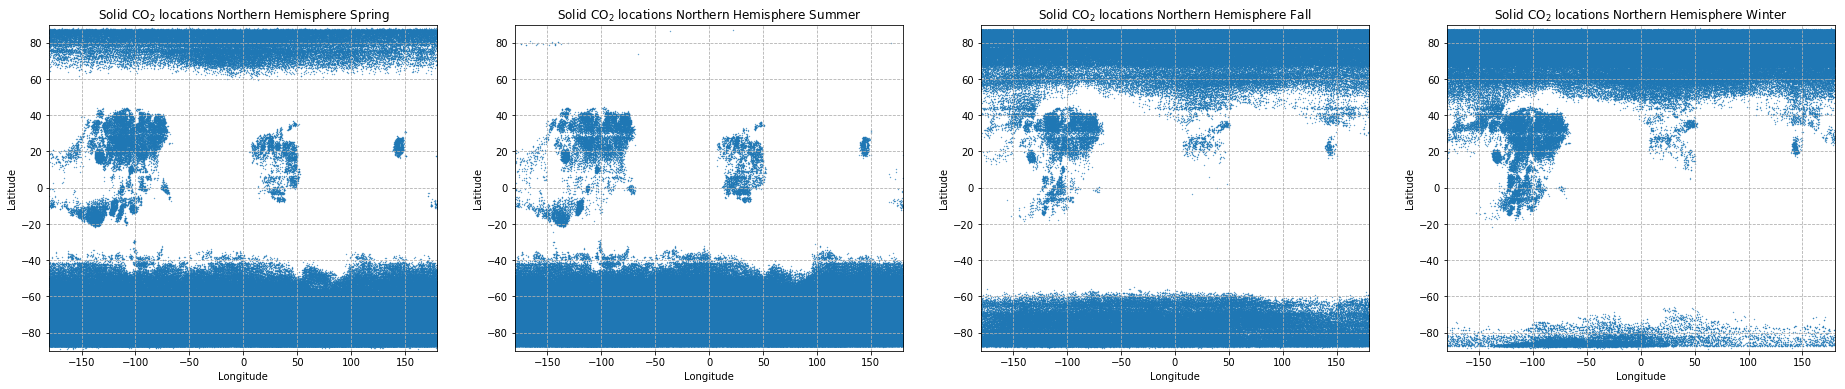

In [55]:
fig,axes = plt.subplots(1,4,sharex = True, sharey = False, figsize= (32,6)) 
plt.sca(axes[0])
plt.scatter(new_Long_CO2_NSP, new_Lat_CO2_NSP, s = .1)
plt.grid(linestyle='--')
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Solid $\mathregular{CO_2}$ locations Northern Hemisphere Spring')
plt.sca(axes[1])
plt.scatter(new_Long_CO2_NSM, new_Lat_CO2_NSM, s = .1)
plt.grid(linestyle='--')
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Solid $\mathregular{CO_2}$ locations Northern Hemisphere Summer')
plt.sca(axes[2])
plt.scatter(new_Long_CO2_NFA, new_Lat_CO2_NFA, s = .1)
plt.grid(linestyle='--')
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Solid $\mathregular{CO_2}$ locations Northern Hemisphere Fall')
plt.sca(axes[3])
plt.scatter(new_Long_CO2_NWI, new_Lat_CO2_NWI, s = .1)
plt.grid(linestyle='--')
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Solid $\mathregular{CO_2}$ locations Northern Hemisphere Winter')
plt.show
#created subplots of CO2 condensation for the four seasons of the martian year
filename = 'mcsSeasons.jpg'
plt.savefig(filename)  
#saved the image

In [56]:
new_CO2_north = CO2[(Eq_Vap_P_CO2 <= 650) & (Lat_CO2 <= 87) & (Lat_CO2 >= 80)]
new_CO2_south = CO2[(Eq_Vap_P_CO2 <= 650) & (Lat_CO2 <= -80) & (Lat_CO2 >= -87)]
#created 2 different dataframes based on hemisphere limitations from the original CO2 dataframe

In [57]:
north_Eq_Vap_P_CO2 = new_CO2_north['Eq_Vap_P']
north_p_surf_CO2 = new_CO2_north['p_surf']
north_T_surf_CO2 = new_CO2_north['T_surf']
north_L_s_CO2 = new_CO2_north['L_s']
north_Lat_CO2 = new_CO2_north['Lat']
north_Long_CO2 = new_CO2_north['Long']
north_Surf_rad_CO2 = new_CO2_north['Surf_rad']
#created columns for CO2 conditions for southern hemisphere dataframe

In [58]:
south_Eq_Vap_P_CO2 = new_CO2_south['Eq_Vap_P']
south_p_surf_CO2 = new_CO2_south['p_surf']
south_T_surf_CO2 = new_CO2_south['T_surf']
south_L_s_CO2 = new_CO2_south['L_s']
south_Lat_CO2 = new_CO2_south['Lat']
south_Long_CO2 = new_CO2_south['Long']
south_Surf_rad_CO2 = new_CO2_south['Surf_rad']
#created columns for CO2 conditions for southern hemisphere dataframe 

In [59]:
NorthSpring = new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 90)  & (north_L_s_CO2 >= 0)]
NorthSummer = new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 180)  & (north_L_s_CO2 >= 90)]
NorthFall= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 270)  & (north_L_s_CO2 >= 180)]
NorthWinter = new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 360)  & (north_L_s_CO2 >= 270)]
#created four different dataframes based on the northern hemisphere seasons

In [60]:
SouthFall = new_CO2_south[(south_Eq_Vap_P_CO2<= 650) & (south_L_s_CO2 <= 90)  & (south_L_s_CO2 >= 0)]
SouthWinter = new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 180)  & (south_L_s_CO2 >= 90)]
SouthSpring= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 270)  & (south_L_s_CO2 >= 180)]
SouthSummer = new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2<= 360)  & (south_L_s_CO2 >= 270)]
#created four different dataframes based on the southern hemisphere seasons

In [61]:
Eq_Vap_P_CO2_NSP = NorthSpring['Eq_Vap_P']
p_surf_CO2_NSP = NorthSpring['p_surf']
T_surf_CO2_NSP = NorthSpring['T_surf']
L_s_CO2_NSP = NorthSpring['L_s']
Lat_CO2_NSP = NorthSpring['Lat']
Long_CO2_NSP = NorthSpring['Long']
Surf_rad_NSP = NorthSpring['Surf_rad']
#created columns for CO2 conditions for northern hemisphere spring dataframe 

In [62]:
Eq_Vap_P_CO2_NSM = NorthSummer['Eq_Vap_P']
p_surf_CO2_NSM = NorthSummer['p_surf']
T_surf_CO2_NSM = NorthSummer['T_surf']
L_s_CO2_NSM = NorthSummer['L_s']
Lat_CO2_NSM = NorthSummer['Lat']
Long_CO2_NSM = NorthSummer['Long']
Surf_rad_NSM = NorthSummer['Surf_rad']
#created columns for CO2 conditions for northern hemisphere summer dataframe 

In [63]:
Eq_Vap_P_CO2_NFA = NorthFall['Eq_Vap_P']
p_surf_CO2_NFA = NorthFall['p_surf']
T_surf_CO2_NFA = NorthFall['T_surf']
L_s_CO2_NFA = NorthFall['L_s']
Lat_CO2_NFA = NorthFall['Lat']
Long_CO2_NFA = NorthFall['Long']
Surf_rad_NFA = NorthFall['Surf_rad']
#created columns for CO2 conditions for northern hemisphere fall dataframe 

In [64]:
Eq_Vap_P_CO2_NWI = NorthWinter['Eq_Vap_P']
p_surf_CO2_NWI = NorthWinter['p_surf']
T_surf_CO2_NWI = NorthWinter['T_surf']
L_s_CO2_NWI = NorthWinter['L_s']
Lat_CO2_NWI = NorthWinter['Lat']
Long_CO2_NWI = NorthWinter['Long']
Surf_rad_NWI = NorthWinter['Surf_rad']
#created columns for CO2 conditions for northern hemisphere winter dataframe 

In [65]:
Eq_Vap_P_CO2_SFA = SouthFall['Eq_Vap_P']
p_surf_CO2_SFA = SouthFall['p_surf']
T_surf_CO2_SFA = SouthFall['T_surf']
L_s_CO2_SFA = SouthFall['L_s']
Lat_CO2_SFA = SouthFall['Lat']
Long_CO2_SFA = SouthFall['Long']
Surf_rad_SFA = SouthFall['Surf_rad']
#created columns for CO2 conditions for southern hemisphere fall dataframe 

In [66]:
Eq_Vap_P_CO2_SWI = SouthWinter['Eq_Vap_P']
p_surf_CO2_SWI = SouthWinter['p_surf']
T_surf_CO2_SWI = SouthWinter['T_surf']
L_s_CO2_SWI = SouthWinter['L_s']
Lat_CO2_SWI = SouthWinter['Lat']
Long_CO2_SWI = SouthWinter['Long']
Surf_rad_SWI = SouthWinter['Surf_rad']
#created columns for CO2 conditions for southern hemisphere winter dataframe 

In [67]:
Eq_Vap_P_CO2_SSP = SouthSpring['Eq_Vap_P']
p_surf_CO2_SSP = SouthSpring['p_surf']
T_surf_CO2_SSP = SouthSpring['T_surf']
L_s_CO2_SSP = SouthSpring['L_s']
Lat_CO2_SSP = SouthSpring['Lat']
Long_CO2_SSP = SouthSpring['Long']
Surf_rad_SSP = SouthSpring['Surf_rad']
#created columns for CO2 conditions for southern hemisphere spring dataframe 

In [68]:
Eq_Vap_P_CO2_SSM = SouthSummer['Eq_Vap_P']
p_surf_CO2_SSM = SouthSummer['p_surf']
T_surf_CO2_SSM = SouthSummer['T_surf']
L_s_CO2_SSM = SouthSummer['L_s']
Lat_CO2_SSM = SouthSummer['Lat']
Long_CO2_SSM = SouthSummer['Long']
Surf_rad_SSM = SouthSummer['Surf_rad']
#created columns for CO2 conditions for southern hemisphere summer dataframe 

In [69]:
Long_NSP = np.array(Long_CO2_NSP)
Lat_NSP = np.array(Lat_CO2_NSP)
Long_NSM = np.array(Long_CO2_NSM)
Lat_NSM = np.array(Lat_CO2_NSM)
Long_NFA = np.array(Long_CO2_NFA)
Lat_NFA = np.array(Lat_CO2_NFA)
Long_NWI = np.array(Long_CO2_NWI)
Lat_NWI = np.array(Lat_CO2_NWI)
Temp_NSP = np.array(T_surf_CO2_NSP)
Temp_NSM = np.array(T_surf_CO2_NSM)
Temp_NFA = np.array(T_surf_CO2_NFA)
Temp_NWI = np.array(T_surf_CO2_NWI)
#converted northern hemisphere seasonal temperatures, longitudes and latitudes into arrays for plotting

In [70]:
Long_SFA = np.array(Long_CO2_SFA)
Lat_SFA = np.array(Lat_CO2_SFA)
Long_SWI = np.array(Long_CO2_SWI)
Lat_SWI = np.array(Lat_CO2_SWI)
Long_SSP = np.array(Long_CO2_SSP)
Lat_SSP = np.array(Lat_CO2_SSP)
Long_SSM = np.array(Long_CO2_SSM)
Lat_SSM = np.array(Lat_CO2_SSM)
Temp_SFA = np.array(T_surf_CO2_SFA)
Temp_SWI = np.array(T_surf_CO2_SWI)
Temp_SSP = np.array(T_surf_CO2_SSP)
Temp_SSM = np.array(T_surf_CO2_SSM)
#converted southern hemisphere seasonal temperatures, longitudes and latitudes into arrays for plotting

/Users/eytangarybicas/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/eytangarybicas/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


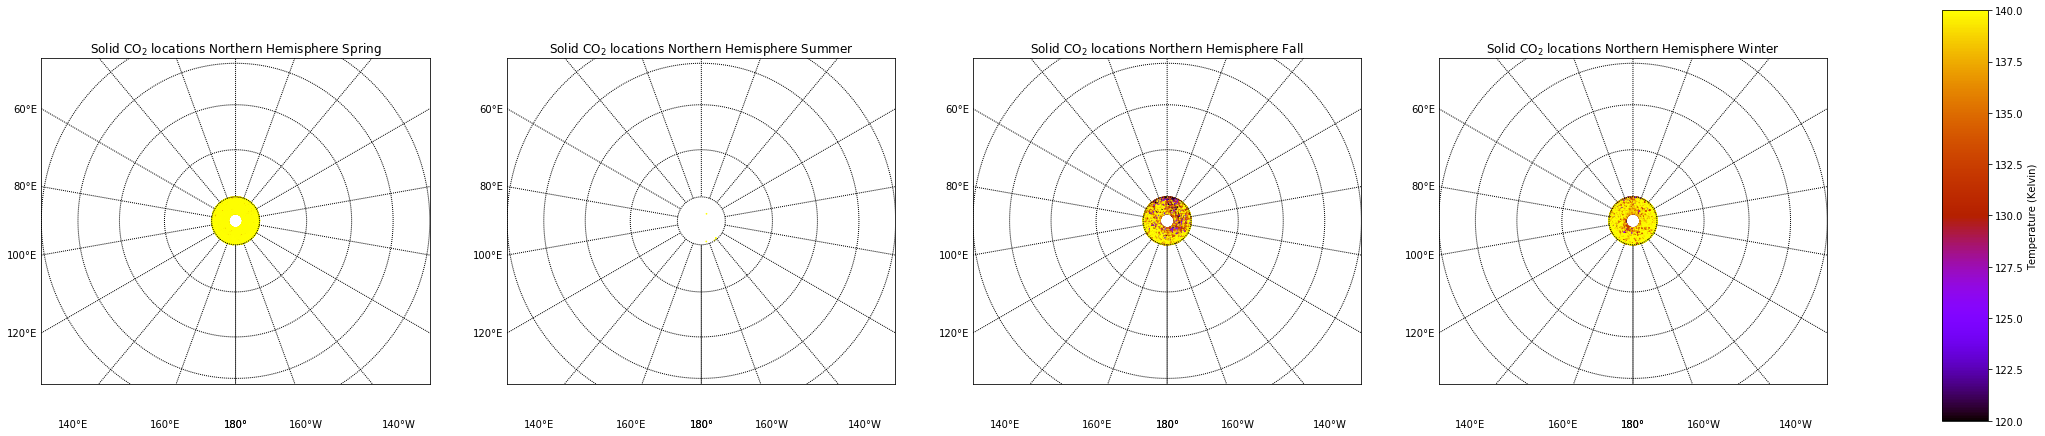

In [71]:
fig,axes = plt.subplots(1,4,sharex = True, sharey = False, figsize= (32,6))
plt.sca(axes[0])
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Solid $\mathregular{CO_2}$ locations Northern Hemisphere Spring')
x,y = m(Long_NSP,Lat_NSP)
s0 = m.scatter(x, y,c=Temp_NSP, cmap='gnuplot',  s=0.5, vmin = 120, vmax = 140)
plt.sca(axes[1])
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Solid $\mathregular{CO_2}$ locations Northern Hemisphere Summer')
x,y = m(Long_NSM,Lat_NSM)
s1 = m.scatter(x, y,c=Temp_NSM, cmap='gnuplot',  s=0.5, vmin = 120, vmax = 140)
plt.sca(axes[2])
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Solid $\mathregular{CO_2}$ locations Northern Hemisphere Fall')
x,y = m(Long_NFA,Lat_NFA)
s2 = m.scatter(x, y,c=Temp_NFA, cmap='gnuplot',  s=0.5, vmin = 120, vmax = 140)
plt.sca(axes[3])
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Solid $\mathregular{CO_2}$ locations Northern Hemisphere Winter')
x,y = m(Long_NWI,Lat_NWI)
s3 = m.scatter(x, y,c=Temp_NWI, cmap='gnuplot',  s=0.5, vmin = 120, vmax = 140)
#nplaea = north polar lambert azimuthal
#plotted the north hemisphere seasonal condensation of CO2 with temperature and the above projection
cbx = fig.add_axes([0.95, 0.04, 0.02, 0.95])
ca = fig.colorbar(s3, cbx)
ca.set_label('Temperature (Kelvin)')
#created a color bar
filename3 = 'mcsSeasonsNorthT.jpg'
plt.savefig(filename3) 
#saved the plot as an image

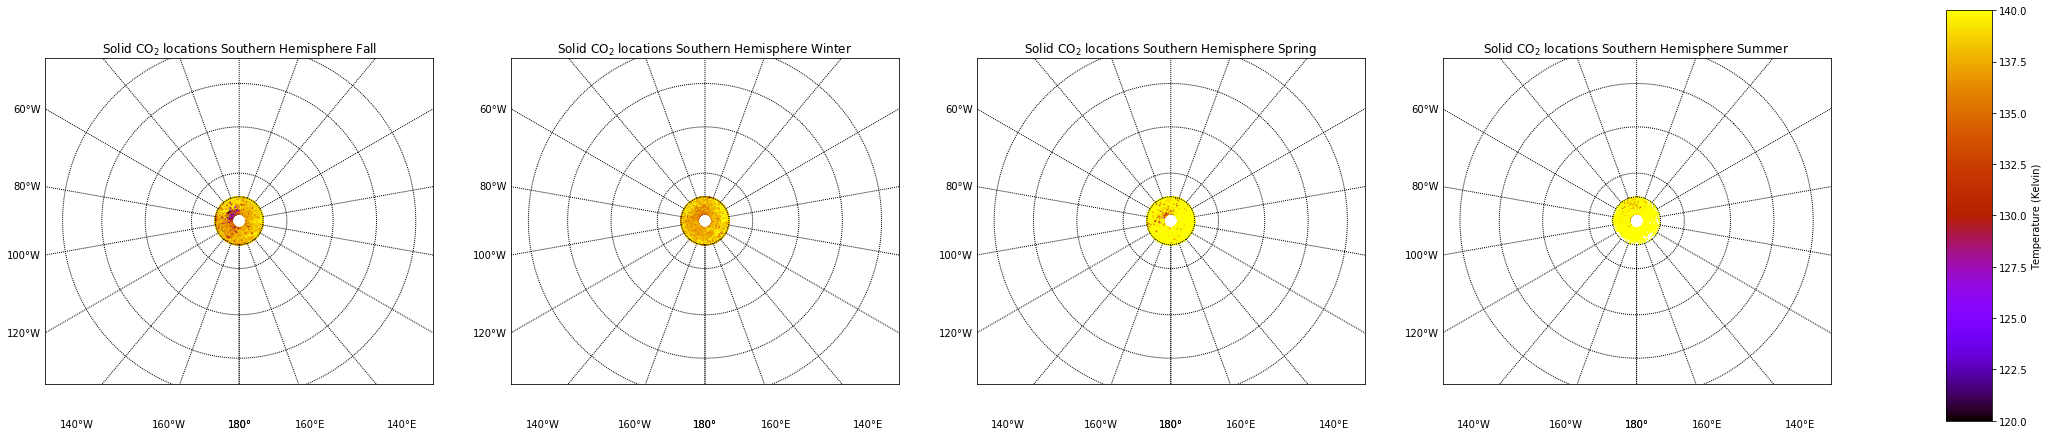

In [72]:
fig,axes = plt.subplots(1,4,sharex = True, sharey = False, figsize= (32,6))
plt.sca(axes[0])
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Solid $\mathregular{CO_2}$ locations Southern Hemisphere Fall')
x,y = m(Long_SFA,Lat_SFA)
t0 = m.scatter(x, y,c=Temp_SFA, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.sca(axes[1])
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Solid $\mathregular{CO_2}$ locations Southern Hemisphere Winter')
x,y = m(Long_SWI,Lat_SWI)
t1 =m.scatter(x, y, c=Temp_SWI, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.sca(axes[2])
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Solid $\mathregular{CO_2}$ locations Southern Hemisphere Spring')
x,y = m(Long_SSP,Lat_SSP)
t2 =m.scatter(x, y, c=Temp_SSP, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.sca(axes[3])
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Solid $\mathregular{CO_2}$ locations Southern Hemisphere Summer')
x,y = m(Long_SSM,Lat_SSM)
t3 = m.scatter(x, y,c=Temp_SSM, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
#splaea = south polar lambert azimuthal
#plotted the south hemisphere seasonal condensation of CO2 with temperature and the above projection
cax = fig.add_axes([0.95, 0.04, 0.02, 0.95])
cb = fig.colorbar(t3, cax)
cb.set_label('Temperature (Kelvin)')
#created a color bar
filename2 = 'mcsSeasonsSouthT.jpg'
plt.savefig(filename2) 
#saved the plot into an image

In [73]:
def IRFlux(T):
    '''Calculate the luminosity of the thing.'''
    sigma = 5.67e-8 # W/m**2/K**4
    boltz = sigma * T**4
    return boltz

In [74]:
#I subdivided the previous DataFrames based on periods of 15 L_s for the Northern Hemisphere
new_CO2_north_SUB = new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 15)  & (north_L_s_CO2 >= 0)]
new_CO2_north_SUB2= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 30)  & (north_L_s_CO2 >= 15)]
new_CO2_north_SUB3= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 45)  & (north_L_s_CO2 >= 30)]
new_CO2_north_SUB4= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 60)  & (north_L_s_CO2 >= 45)]
new_CO2_north_SUB5= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 75)  & (north_L_s_CO2 >= 60)]
new_CO2_north_SUB6= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 90)  & (north_L_s_CO2 >= 75)]
new_CO2_north_SUB7= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 105)  & (north_L_s_CO2 >= 90)]
new_CO2_north_SUB8= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 120)  & (north_L_s_CO2 >= 105)]
new_CO2_north_SUB9= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 135)  & (north_L_s_CO2 >= 120)]
new_CO2_north_SUB10= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 150)  & (north_L_s_CO2 >= 135)]
new_CO2_north_SUB11= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 165)  & (north_L_s_CO2 >= 150)]
new_CO2_north_SUB12= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 180)  & (north_L_s_CO2 >= 165)]
new_CO2_north_SUB13= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 195)  & (north_L_s_CO2 >= 180)]
new_CO2_north_SUB14= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 210)  & (north_L_s_CO2 >= 195)]
new_CO2_north_SUB15= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 225)  & (north_L_s_CO2 >= 210)]
new_CO2_north_SUB16= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 240)  & (north_L_s_CO2 >= 225)]
new_CO2_north_SUB17= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 255)  & (north_L_s_CO2 >= 240)]
new_CO2_north_SUB18= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 270)  & (north_L_s_CO2 >= 255)]
new_CO2_north_SUB19= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 285)  & (north_L_s_CO2 >= 270)]
new_CO2_north_SUB20= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 300)  & (north_L_s_CO2 >= 285)]
new_CO2_north_SUB21= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 315)  & (north_L_s_CO2 >= 300)]
new_CO2_north_SUB22= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 330)  & (north_L_s_CO2 >= 315)]
new_CO2_north_SUB23= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 345)  & (north_L_s_CO2 >= 330)]
new_CO2_north_SUB24= new_CO2_north[(north_Eq_Vap_P_CO2 <= 650) & (north_L_s_CO2 <= 360)  & (north_L_s_CO2 >= 345)]

In [75]:
# Renamed each column in the new dataframe created above(Northern Hemisphere)
NEq_Vap_P_CO2_SUB = new_CO2_north_SUB['Eq_Vap_P']
Np_surf_CO2_SUB = new_CO2_north_SUB['p_surf']
NT_surf_CO2_SUB = new_CO2_north_SUB['T_surf']
NL_s_CO2_SUB = new_CO2_north_SUB['L_s']
NLat_CO2_SUB = new_CO2_north_SUB['Lat']
NLong_CO2_SUB = new_CO2_north_SUB['Long']

NEq_Vap_P_CO2_SUB2 = new_CO2_north_SUB2['Eq_Vap_P']
Np_surf_CO2_SUB2 = new_CO2_north_SUB2['p_surf']
NT_surf_CO2_SUB2 = new_CO2_north_SUB2['T_surf']
NL_s_CO2_SUB2 = new_CO2_north_SUB2['L_s']
NLat_CO2_SUB2 = new_CO2_north_SUB2['Lat']
NLong_CO2_SUB2 = new_CO2_north_SUB2['Long']

NEq_Vap_P_CO2_SUB3 = new_CO2_north_SUB3['Eq_Vap_P']
Np_surf_CO2_SUB3 = new_CO2_north_SUB3['p_surf']
NT_surf_CO2_SUB3 = new_CO2_north_SUB3['T_surf']
NL_s_CO2_SUB3 = new_CO2_north_SUB3['L_s']
NLat_CO2_SUB3 = new_CO2_north_SUB3['Lat']
NLong_CO2_SUB3 = new_CO2_north_SUB3['Long']

NEq_Vap_P_CO2_SUB4 = new_CO2_north_SUB4['Eq_Vap_P']
Np_surf_CO2_SUB4 = new_CO2_north_SUB4['p_surf']
NT_surf_CO2_SUB4 = new_CO2_north_SUB4['T_surf']
NL_s_CO2_SUB4 = new_CO2_north_SUB4['L_s']
NLat_CO2_SUB4 = new_CO2_north_SUB4['Lat']
NLong_CO2_SUB4 = new_CO2_north_SUB4['Long']

NEq_Vap_P_CO2_SUB5 = new_CO2_north_SUB5['Eq_Vap_P']
Np_surf_CO2_SUB5 = new_CO2_north_SUB5['p_surf']
NT_surf_CO2_SUB5 = new_CO2_north_SUB5['T_surf']
NL_s_CO2_SUB5 = new_CO2_north_SUB5['L_s']
NLat_CO2_SUB5 = new_CO2_north_SUB5['Lat']
NLong_CO2_SUB5 = new_CO2_north_SUB5['Long']

NEq_Vap_P_CO2_SUB6 = new_CO2_north_SUB6['Eq_Vap_P']
Np_surf_CO2_SUB6 = new_CO2_north_SUB6['p_surf']
NT_surf_CO2_SUB6 = new_CO2_north_SUB6['T_surf']
NL_s_CO2_SUB6 = new_CO2_north_SUB6['L_s']
NLat_CO2_SUB6 = new_CO2_north_SUB6['Lat']
NLong_CO2_SUB6 = new_CO2_north_SUB6['Long']

NEq_Vap_P_CO2_SUB7 = new_CO2_north_SUB7['Eq_Vap_P']
Np_surf_CO2_SUB7 = new_CO2_north_SUB7['p_surf']
NT_surf_CO2_SUB7 = new_CO2_north_SUB7['T_surf']
NL_s_CO2_SUB7 = new_CO2_north_SUB7['L_s']
NLat_CO2_SUB7 = new_CO2_north_SUB7['Lat']
NLong_CO2_SUB7 = new_CO2_north_SUB7['Long']

NEq_Vap_P_CO2_SUB8 = new_CO2_north_SUB8['Eq_Vap_P']
Np_surf_CO2_SUB8 = new_CO2_north_SUB8['p_surf']
NT_surf_CO2_SUB8 = new_CO2_north_SUB8['T_surf']
NL_s_CO2_SUB8 = new_CO2_north_SUB8['L_s']
NLat_CO2_SUB8 = new_CO2_north_SUB8['Lat']
NLong_CO2_SUB8 = new_CO2_north_SUB8['Long']

NEq_Vap_P_CO2_SUB9 = new_CO2_north_SUB9['Eq_Vap_P']
Np_surf_CO2_SUB9 = new_CO2_north_SUB9['p_surf']
NT_surf_CO2_SUB9 = new_CO2_north_SUB9['T_surf']
NL_s_CO2_SUB9 = new_CO2_north_SUB9['L_s']
NLat_CO2_SUB9 = new_CO2_north_SUB9['Lat']
NLong_CO2_SUB9 = new_CO2_north_SUB9['Long']

NEq_Vap_P_CO2_SUB10 = new_CO2_north_SUB10['Eq_Vap_P']
Np_surf_CO2_SUB10 = new_CO2_north_SUB10['p_surf']
NT_surf_CO2_SUB10 = new_CO2_north_SUB10['T_surf']
NL_s_CO2_SUB10 = new_CO2_north_SUB10['L_s']
NLat_CO2_SUB10 = new_CO2_north_SUB10['Lat']
NLong_CO2_SUB10 = new_CO2_north_SUB10['Long']

NEq_Vap_P_CO2_SUB11 = new_CO2_north_SUB11['Eq_Vap_P']
Np_surf_CO2_SUB11 = new_CO2_north_SUB11['p_surf']
NT_surf_CO2_SUB11 = new_CO2_north_SUB11['T_surf']
NL_s_CO2_SUB11 = new_CO2_north_SUB11['L_s']
NLat_CO2_SUB11 = new_CO2_north_SUB11['Lat']
NLong_CO2_SUB11 = new_CO2_north_SUB11['Long']

NEq_Vap_P_CO2_SUB12 = new_CO2_north_SUB12['Eq_Vap_P']
Np_surf_CO2_SUB12 = new_CO2_north_SUB12['p_surf']
NT_surf_CO2_SUB12 = new_CO2_north_SUB12['T_surf']
NL_s_CO2_SUB12 = new_CO2_north_SUB12['L_s']
NLat_CO2_SUB12 = new_CO2_north_SUB12['Lat']
NLong_CO2_SUB12 = new_CO2_north_SUB12['Long']

NEq_Vap_P_CO2_SUB13 = new_CO2_north_SUB13['Eq_Vap_P']
Np_surf_CO2_SUB13 = new_CO2_north_SUB13['p_surf']
NT_surf_CO2_SUB13 = new_CO2_north_SUB13['T_surf']
NL_s_CO2_SUB13 = new_CO2_north_SUB13['L_s']
NLat_CO2_SUB13 = new_CO2_north_SUB13['Lat']
NLong_CO2_SUB13 = new_CO2_north_SUB13['Long']

NEq_Vap_P_CO2_SUB14 = new_CO2_north_SUB14['Eq_Vap_P']
Np_surf_CO2_SUB14 = new_CO2_north_SUB14['p_surf']
NT_surf_CO2_SUB14 = new_CO2_north_SUB14['T_surf']
NL_s_CO2_SUB14= new_CO2_north_SUB14['L_s']
NLat_CO2_SUB14 = new_CO2_north_SUB14['Lat']
NLong_CO2_SUB14 = new_CO2_north_SUB14['Long']

NEq_Vap_P_CO2_SUB15 = new_CO2_north_SUB15['Eq_Vap_P']
Np_surf_CO2_SUB15 = new_CO2_north_SUB15['p_surf']
NT_surf_CO2_SUB15 = new_CO2_north_SUB15['T_surf']
NL_s_CO2_SUB15 = new_CO2_north_SUB15['L_s']
NLat_CO2_SUB15 = new_CO2_north_SUB15['Lat']
NLong_CO2_SUB15 = new_CO2_north_SUB15['Long']

NEq_Vap_P_CO2_SUB16 = new_CO2_north_SUB16['Eq_Vap_P']
Np_surf_CO2_SUB16 = new_CO2_north_SUB16['p_surf']
NT_surf_CO2_SUB16 = new_CO2_north_SUB16['T_surf']
NL_s_CO2_SUB16 = new_CO2_north_SUB16['L_s']
NLat_CO2_SUB16 = new_CO2_north_SUB16['Lat']
NLong_CO2_SUB16 = new_CO2_north_SUB16['Long']

NEq_Vap_P_CO2_SUB17 = new_CO2_north_SUB17['Eq_Vap_P']
Np_surf_CO2_SUB17 = new_CO2_north_SUB17['p_surf']
NT_surf_CO2_SUB17 = new_CO2_north_SUB17['T_surf']
NL_s_CO2_SUB17 = new_CO2_north_SUB17['L_s']
NLat_CO2_SUB17 = new_CO2_north_SUB17['Lat']
NLong_CO2_SUB17 = new_CO2_north_SUB17['Long']

NEq_Vap_P_CO2_SUB18 = new_CO2_north_SUB18['Eq_Vap_P']
Np_surf_CO2_SUB18 = new_CO2_north_SUB18['p_surf']
NT_surf_CO2_SUB18 = new_CO2_north_SUB18['T_surf']
NL_s_CO2_SUB18 = new_CO2_north_SUB18['L_s']
NLat_CO2_SUB18 = new_CO2_north_SUB18['Lat']
NLong_CO2_SUB18 = new_CO2_north_SUB18['Long']

NEq_Vap_P_CO2_SUB19 = new_CO2_north_SUB19['Eq_Vap_P']
Np_surf_CO2_SUB19 = new_CO2_north_SUB19['p_surf']
NT_surf_CO2_SUB19 = new_CO2_north_SUB19['T_surf']
NL_s_CO2_SUB19 = new_CO2_north_SUB19['L_s']
NLat_CO2_SUB19 = new_CO2_north_SUB19['Lat']
NLong_CO2_SUB19 = new_CO2_north_SUB19['Long']

NEq_Vap_P_CO2_SUB20 = new_CO2_north_SUB20['Eq_Vap_P']
Np_surf_CO2_SUB20 = new_CO2_north_SUB20['p_surf']
NT_surf_CO2_SUB20 = new_CO2_north_SUB20['T_surf']
NL_s_CO2_SUB20 = new_CO2_north_SUB20['L_s']
NLat_CO2_SUB20 = new_CO2_north_SUB20['Lat']
NLong_CO2_SUB20 = new_CO2_north_SUB20['Long']

NEq_Vap_P_CO2_SUB21 = new_CO2_north_SUB21['Eq_Vap_P']
Np_surf_CO2_SUB21 = new_CO2_north_SUB21['p_surf']
NT_surf_CO2_SUB21 = new_CO2_north_SUB21['T_surf']
NL_s_CO2_SUB21 = new_CO2_north_SUB21['L_s']
NLat_CO2_SUB21 = new_CO2_north_SUB21['Lat']
NLong_CO2_SUB21 = new_CO2_north_SUB21['Long']

NEq_Vap_P_CO2_SUB22 = new_CO2_north_SUB22['Eq_Vap_P']
Np_surf_CO2_SUB22 = new_CO2_north_SUB22['p_surf']
NT_surf_CO2_SUB22 = new_CO2_north_SUB22['T_surf']
NL_s_CO2_SUB22 = new_CO2_north_SUB22['L_s']
NLat_CO2_SUB22 = new_CO2_north_SUB22['Lat']
NLong_CO2_SUB22 = new_CO2_north_SUB22['Long']

NEq_Vap_P_CO2_SUB23 = new_CO2_north_SUB23['Eq_Vap_P']
Np_surf_CO2_SUB23 = new_CO2_north_SUB23['p_surf']
NT_surf_CO2_SUB23 = new_CO2_north_SUB23['T_surf']
NL_s_CO2_SUB23 = new_CO2_north_SUB23['L_s']
NLat_CO2_SUB23 = new_CO2_north_SUB23['Lat']
NLong_CO2_SUB23 = new_CO2_north_SUB23['Long']

NEq_Vap_P_CO2_SUB24 = new_CO2_north_SUB24['Eq_Vap_P']
Np_surf_CO2_SUB24 = new_CO2_north_SUB24['p_surf']
NT_surf_CO2_SUB24 = new_CO2_north_SUB24['T_surf']
NL_s_CO2_SUB24 = new_CO2_north_SUB24['L_s']
NLat_CO2_SUB24 = new_CO2_north_SUB24['Lat']
NLong_CO2_SUB24 = new_CO2_north_SUB24['Long']

In [76]:
#I subdivided the previous DataFrames based on periods of 15 L_s for the Southern Hemisphere
new_CO2_south_SUB = new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 15)  & (south_L_s_CO2 >= 0)]
new_CO2_south_SUB2= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 30)  & (south_L_s_CO2 >= 15)]
new_CO2_south_SUB3= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 45)  & (south_L_s_CO2 >= 30)]
new_CO2_south_SUB4= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 60)  & (south_L_s_CO2 >= 45)]
new_CO2_south_SUB5= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 75)  & (south_L_s_CO2 >= 60)]
new_CO2_south_SUB6= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 90)  & (south_L_s_CO2 >= 75)]
new_CO2_south_SUB7= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 105)  & (south_L_s_CO2 >= 90)]
new_CO2_south_SUB8= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 120)  & (south_L_s_CO2 >= 105)]
new_CO2_south_SUB9= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 135)  & (south_L_s_CO2 >= 120)]
new_CO2_south_SUB10= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 150)  & (south_L_s_CO2 >= 135)]
new_CO2_south_SUB11= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 165)  & (south_L_s_CO2 >= 150)]
new_CO2_south_SUB12= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 180)  & (south_L_s_CO2 >= 165)]
new_CO2_south_SUB13= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 195)  & (south_L_s_CO2 >= 180)]
new_CO2_south_SUB14= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 210)  & (south_L_s_CO2 >= 195)]
new_CO2_south_SUB15= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 225)  & (south_L_s_CO2 >= 210)]
new_CO2_south_SUB16= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 240)  & (south_L_s_CO2 >= 225)]
new_CO2_south_SUB17= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 255)  & (south_L_s_CO2 >= 240)]
new_CO2_south_SUB18= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 270)  & (south_L_s_CO2 >= 255)]
new_CO2_south_SUB19= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 285)  & (south_L_s_CO2 >= 270)]
new_CO2_south_SUB20= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 300)  & (south_L_s_CO2 >= 285)]
new_CO2_south_SUB21= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 315)  & (south_L_s_CO2 >= 300)]
new_CO2_south_SUB22= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 330)  & (south_L_s_CO2 >= 315)]
new_CO2_south_SUB23= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 345)  & (south_L_s_CO2 >= 330)]
new_CO2_south_SUB24= new_CO2_south[(south_Eq_Vap_P_CO2 <= 650) & (south_L_s_CO2 <= 360)  & (south_L_s_CO2 >= 345)]

In [77]:
# Renamed each column in the new dataframe created above(Southern Hemisphere)
SEq_Vap_P_CO2_SUB = new_CO2_south_SUB['Eq_Vap_P']
Sp_surf_CO2_SUB = new_CO2_south_SUB['p_surf']
ST_surf_CO2_SUB = new_CO2_south_SUB['T_surf']
SL_s_CO2_SUB = new_CO2_south_SUB['L_s']
SLat_CO2_SUB = new_CO2_south_SUB['Lat']
SLong_CO2_SUB = new_CO2_south_SUB['Long']

SEq_Vap_P_CO2_SUB2 = new_CO2_south_SUB2['Eq_Vap_P']
Sp_surf_CO2_SUB2 = new_CO2_south_SUB2['p_surf']
ST_surf_CO2_SUB2 = new_CO2_south_SUB2['T_surf']
SL_s_CO2_SUB2 = new_CO2_south_SUB2['L_s']
SLat_CO2_SUB2 = new_CO2_south_SUB2['Lat']
SLong_CO2_SUB2 = new_CO2_south_SUB2['Long']

SEq_Vap_P_CO2_SUB3 = new_CO2_south_SUB3['Eq_Vap_P']
Sp_surf_CO2_SUB3 = new_CO2_south_SUB3['p_surf']
ST_surf_CO2_SUB3 = new_CO2_south_SUB3['T_surf']
SL_s_CO2_SUB3 = new_CO2_south_SUB3['L_s']
SLat_CO2_SUB3 = new_CO2_south_SUB3['Lat']
SLong_CO2_SUB3 = new_CO2_south_SUB3['Long']

SEq_Vap_P_CO2_SUB4 = new_CO2_south_SUB4['Eq_Vap_P']
Sp_surf_CO2_SUB4 = new_CO2_south_SUB4['p_surf']
ST_surf_CO2_SUB4 = new_CO2_south_SUB4['T_surf']
SL_s_CO2_SUB4 = new_CO2_south_SUB4['L_s']
SLat_CO2_SUB4 = new_CO2_south_SUB4['Lat']
SLong_CO2_SUB4 = new_CO2_south_SUB4['Long']

SEq_Vap_P_CO2_SUB5 = new_CO2_south_SUB5['Eq_Vap_P']
Sp_surf_CO2_SUB5 = new_CO2_south_SUB5['p_surf']
ST_surf_CO2_SUB5 = new_CO2_south_SUB5['T_surf']
SL_s_CO2_SUB5 = new_CO2_south_SUB5['L_s']
SLat_CO2_SUB5 = new_CO2_south_SUB5['Lat']
SLong_CO2_SUB5 = new_CO2_south_SUB5['Long']

SEq_Vap_P_CO2_SUB6 = new_CO2_south_SUB6['Eq_Vap_P']
Sp_surf_CO2_SUB6 = new_CO2_south_SUB6['p_surf']
ST_surf_CO2_SUB6 = new_CO2_south_SUB6['T_surf']
SL_s_CO2_SUB6 = new_CO2_south_SUB6['L_s']
SLat_CO2_SUB6 = new_CO2_south_SUB6['Lat']
SLong_CO2_SUB6 = new_CO2_south_SUB6['Long']

SEq_Vap_P_CO2_SUB7 = new_CO2_south_SUB7['Eq_Vap_P']
Sp_surf_CO2_SUB7 = new_CO2_south_SUB7['p_surf']
ST_surf_CO2_SUB7 = new_CO2_south_SUB7['T_surf']
SL_s_CO2_SUB7 = new_CO2_south_SUB7['L_s']
SLat_CO2_SUB7 = new_CO2_south_SUB7['Lat']
SLong_CO2_SUB7 = new_CO2_south_SUB7['Long']

SEq_Vap_P_CO2_SUB8 = new_CO2_south_SUB8['Eq_Vap_P']
Sp_surf_CO2_SUB8 = new_CO2_south_SUB8['p_surf']
ST_surf_CO2_SUB8 = new_CO2_south_SUB8['T_surf']
SL_s_CO2_SUB8 = new_CO2_south_SUB8['L_s']
SLat_CO2_SUB8 = new_CO2_south_SUB8['Lat']
SLong_CO2_SUB8 = new_CO2_south_SUB8['Long']

SEq_Vap_P_CO2_SUB9 = new_CO2_south_SUB9['Eq_Vap_P']
Sp_surf_CO2_SUB9 = new_CO2_south_SUB9['p_surf']
ST_surf_CO2_SUB9 = new_CO2_south_SUB9['T_surf']
SL_s_CO2_SUB9 = new_CO2_south_SUB9['L_s']
SLat_CO2_SUB9 = new_CO2_south_SUB9['Lat']
SLong_CO2_SUB9 = new_CO2_south_SUB9['Long']

SEq_Vap_P_CO2_SUB10 = new_CO2_south_SUB10['Eq_Vap_P']
Sp_surf_CO2_SUB10 = new_CO2_south_SUB10['p_surf']
ST_surf_CO2_SUB10 = new_CO2_south_SUB10['T_surf']
SL_s_CO2_SUB10 = new_CO2_south_SUB10['L_s']
SLat_CO2_SUB10 = new_CO2_south_SUB10['Lat']
SLong_CO2_SUB10 = new_CO2_south_SUB10['Long']

SEq_Vap_P_CO2_SUB11 = new_CO2_south_SUB11['Eq_Vap_P']
Sp_surf_CO2_SUB11 = new_CO2_south_SUB11['p_surf']
ST_surf_CO2_SUB11 = new_CO2_south_SUB11['T_surf']
SL_s_CO2_SUB11 = new_CO2_south_SUB11['L_s']
SLat_CO2_SUB11 = new_CO2_south_SUB11['Lat']
SLong_CO2_SUB11 = new_CO2_south_SUB11['Long']

SEq_Vap_P_CO2_SUB12 = new_CO2_south_SUB12['Eq_Vap_P']
Sp_surf_CO2_SUB12 = new_CO2_south_SUB12['p_surf']
ST_surf_CO2_SUB12 = new_CO2_south_SUB12['T_surf']
SL_s_CO2_SUB12 = new_CO2_south_SUB12['L_s']
SLat_CO2_SUB12 = new_CO2_south_SUB12['Lat']
SLong_CO2_SUB12 = new_CO2_south_SUB12['Long']

SEq_Vap_P_CO2_SUB13 = new_CO2_south_SUB13['Eq_Vap_P']
Sp_surf_CO2_SUB13 = new_CO2_south_SUB13['p_surf']
ST_surf_CO2_SUB13 = new_CO2_south_SUB13['T_surf']
SL_s_CO2_SUB13 = new_CO2_south_SUB13['L_s']
SLat_CO2_SUB13 = new_CO2_south_SUB13['Lat']
SLong_CO2_SUB13 = new_CO2_south_SUB13['Long']

SEq_Vap_P_CO2_SUB14 = new_CO2_south_SUB14['Eq_Vap_P']
Sp_surf_CO2_SUB14 = new_CO2_south_SUB14['p_surf']
ST_surf_CO2_SUB14 = new_CO2_south_SUB14['T_surf']
SL_s_CO2_SUB14= new_CO2_south_SUB14['L_s']
SLat_CO2_SUB14 = new_CO2_south_SUB14['Lat']
SLong_CO2_SUB14 = new_CO2_south_SUB14['Long']

SEq_Vap_P_CO2_SUB15 = new_CO2_south_SUB15['Eq_Vap_P']
Sp_surf_CO2_SUB15 = new_CO2_south_SUB15['p_surf']
ST_surf_CO2_SUB15 = new_CO2_south_SUB15['T_surf']
SL_s_CO2_SUB15 = new_CO2_south_SUB15['L_s']
SLat_CO2_SUB15 = new_CO2_south_SUB15['Lat']
SLong_CO2_SUB15 = new_CO2_south_SUB15['Long']

SEq_Vap_P_CO2_SUB16 = new_CO2_south_SUB16['Eq_Vap_P']
Sp_surf_CO2_SUB16 = new_CO2_south_SUB16['p_surf']
ST_surf_CO2_SUB16 = new_CO2_south_SUB16['T_surf']
SL_s_CO2_SUB16 = new_CO2_south_SUB16['L_s']
SLat_CO2_SUB16 = new_CO2_south_SUB16['Lat']
SLong_CO2_SUB16 = new_CO2_south_SUB16['Long']

SEq_Vap_P_CO2_SUB17 = new_CO2_south_SUB17['Eq_Vap_P']
Sp_surf_CO2_SUB17 = new_CO2_south_SUB17['p_surf']
ST_surf_CO2_SUB17 = new_CO2_south_SUB17['T_surf']
SL_s_CO2_SUB17 = new_CO2_south_SUB17['L_s']
SLat_CO2_SUB17 = new_CO2_south_SUB17['Lat']
SLong_CO2_SUB17 = new_CO2_south_SUB17['Long']

SEq_Vap_P_CO2_SUB18 = new_CO2_south_SUB18['Eq_Vap_P']
Sp_surf_CO2_SUB18 = new_CO2_south_SUB18['p_surf']
ST_surf_CO2_SUB18 = new_CO2_south_SUB18['T_surf']
SL_s_CO2_SUB18 = new_CO2_south_SUB18['L_s']
SLat_CO2_SUB18 = new_CO2_south_SUB18['Lat']
SLong_CO2_SUB18 = new_CO2_south_SUB18['Long']

SEq_Vap_P_CO2_SUB19 = new_CO2_south_SUB19['Eq_Vap_P']
Sp_surf_CO2_SUB19 = new_CO2_south_SUB19['p_surf']
ST_surf_CO2_SUB19 = new_CO2_south_SUB19['T_surf']
SL_s_CO2_SUB19 = new_CO2_south_SUB19['L_s']
SLat_CO2_SUB19 = new_CO2_south_SUB19['Lat']
SLong_CO2_SUB19 = new_CO2_south_SUB19['Long']

SEq_Vap_P_CO2_SUB20 = new_CO2_south_SUB20['Eq_Vap_P']
Sp_surf_CO2_SUB20 = new_CO2_south_SUB20['p_surf']
ST_surf_CO2_SUB20 = new_CO2_south_SUB20['T_surf']
SL_s_CO2_SUB20 = new_CO2_south_SUB20['L_s']
SLat_CO2_SUB20 = new_CO2_south_SUB20['Lat']
SLong_CO2_SUB20 = new_CO2_south_SUB20['Long']

SEq_Vap_P_CO2_SUB21 = new_CO2_south_SUB21['Eq_Vap_P']
Sp_surf_CO2_SUB21 = new_CO2_south_SUB21['p_surf']
ST_surf_CO2_SUB21 = new_CO2_south_SUB21['T_surf']
SL_s_CO2_SUB21 = new_CO2_south_SUB21['L_s']
SLat_CO2_SUB21 = new_CO2_south_SUB21['Lat']
SLong_CO2_SUB21 = new_CO2_south_SUB21['Long']

SEq_Vap_P_CO2_SUB22 = new_CO2_south_SUB22['Eq_Vap_P']
Sp_surf_CO2_SUB22 = new_CO2_south_SUB22['p_surf']
ST_surf_CO2_SUB22 = new_CO2_south_SUB22['T_surf']
SL_s_CO2_SUB22 = new_CO2_south_SUB22['L_s']
SLat_CO2_SUB22 = new_CO2_south_SUB22['Lat']
SLong_CO2_SUB22 = new_CO2_south_SUB22['Long']

SEq_Vap_P_CO2_SUB23 = new_CO2_south_SUB23['Eq_Vap_P']
Sp_surf_CO2_SUB23 = new_CO2_south_SUB23['p_surf']
ST_surf_CO2_SUB23 = new_CO2_south_SUB23['T_surf']
SL_s_CO2_SUB23 = new_CO2_south_SUB23['L_s']
SLat_CO2_SUB23 = new_CO2_south_SUB23['Lat']
SLong_CO2_SUB23 = new_CO2_south_SUB23['Long']

SEq_Vap_P_CO2_SUB23 = new_CO2_south_SUB23['Eq_Vap_P']
Sp_surf_CO2_SUB24 = new_CO2_south_SUB24['p_surf']
ST_surf_CO2_SUB24 = new_CO2_south_SUB24['T_surf']
SL_s_CO2_SUB24 = new_CO2_south_SUB24['L_s']
SLat_CO2_SUB24 = new_CO2_south_SUB24['Lat']
SLong_CO2_SUB24 = new_CO2_south_SUB24['Long']

In [78]:
# Converted each column into an array from the new dataframec(Southern Hemisphere)
SLongSUB = np.array(SLong_CO2_SUB)
SLatSUB = np.array(SLat_CO2_SUB)
STSUB = np.array(ST_surf_CO2_SUB)

SLongSUB2 = np.array(SLong_CO2_SUB2)
SLatSUB2 = np.array(SLat_CO2_SUB2)
STSUB2 = np.array(ST_surf_CO2_SUB2)

SLongSUB3 = np.array(SLong_CO2_SUB3)
SLatSUB3 = np.array(SLat_CO2_SUB3)
STSUB3 = np.array(ST_surf_CO2_SUB3)

SLongSUB4 = np.array(SLong_CO2_SUB4)
SLatSUB4 = np.array(SLat_CO2_SUB4)
STSUB4 = np.array(ST_surf_CO2_SUB4)

SLongSUB5 = np.array(SLong_CO2_SUB5)
SLatSUB5 = np.array(SLat_CO2_SUB5)
STSUB5 = np.array(ST_surf_CO2_SUB5)

SLongSUB6 = np.array(SLong_CO2_SUB6)
SLatSUB6 = np.array(SLat_CO2_SUB6)
STSUB6 = np.array(ST_surf_CO2_SUB6)

SLongSUB7 = np.array(SLong_CO2_SUB7)
SLatSUB7 = np.array(SLat_CO2_SUB7)
STSUB7 = np.array(ST_surf_CO2_SUB7)

SLongSUB8 = np.array(SLong_CO2_SUB8)
SLatSUB8 = np.array(SLat_CO2_SUB8)
STSUB8 = np.array(ST_surf_CO2_SUB8)

SLongSUB9 = np.array(SLong_CO2_SUB9)
SLatSUB9 = np.array(SLat_CO2_SUB9)
STSUB9 = np.array(ST_surf_CO2_SUB9)

SLongSUB10 = np.array(SLong_CO2_SUB10)
SLatSUB10 = np.array(SLat_CO2_SUB10)
STSUB10 = np.array(ST_surf_CO2_SUB10)

SLongSUB11 = np.array(SLong_CO2_SUB11)
SLatSUB11 = np.array(SLat_CO2_SUB11)
STSUB11 = np.array(ST_surf_CO2_SUB11)

SLongSUB12 = np.array(SLong_CO2_SUB12)
SLatSUB12 = np.array(SLat_CO2_SUB12)
STSUB12 = np.array(ST_surf_CO2_SUB12)

SLongSUB13 = np.array(SLong_CO2_SUB13)
SLatSUB13 = np.array(SLat_CO2_SUB13)
STSUB13 = np.array(ST_surf_CO2_SUB13)

SLongSUB14 = np.array(SLong_CO2_SUB14)
SLatSUB14 = np.array(SLat_CO2_SUB14)
STSUB14 = np.array(ST_surf_CO2_SUB14)

SLongSUB15 = np.array(SLong_CO2_SUB15)
SLatSUB15 = np.array(SLat_CO2_SUB15)
STSUB15 = np.array(ST_surf_CO2_SUB15)

SLongSUB16 = np.array(SLong_CO2_SUB16)
SLatSUB16 = np.array(SLat_CO2_SUB16)
STSUB16 = np.array(ST_surf_CO2_SUB16)

SLongSUB17 = np.array(SLong_CO2_SUB17)
SLatSUB17 = np.array(SLat_CO2_SUB17)
STSUB17 = np.array(ST_surf_CO2_SUB17)

SLongSUB18 = np.array(SLong_CO2_SUB18)
SLatSUB18 = np.array(SLat_CO2_SUB18)
STSUB18 = np.array(ST_surf_CO2_SUB18)

SLongSUB19 = np.array(SLong_CO2_SUB19)
SLatSUB19 = np.array(SLat_CO2_SUB19)
STSUB19 = np.array(ST_surf_CO2_SUB19)

SLongSUB20 = np.array(SLong_CO2_SUB20)
SLatSUB20 = np.array(SLat_CO2_SUB20)
STSUB20 = np.array(ST_surf_CO2_SUB20)

SLongSUB21 = np.array(SLong_CO2_SUB21)
SLatSUB21 = np.array(SLat_CO2_SUB21)
STSUB21 = np.array(ST_surf_CO2_SUB21)

SLongSUB22 = np.array(SLong_CO2_SUB22)
SLatSUB22 = np.array(SLat_CO2_SUB22)
STSUB22 = np.array(ST_surf_CO2_SUB22)

SLongSUB23 = np.array(SLong_CO2_SUB23)
SLatSUB23 = np.array(SLat_CO2_SUB23)
STSUB23 = np.array(ST_surf_CO2_SUB23)

SLongSUB24 = np.array(SLong_CO2_SUB24)
SLatSUB24 = np.array(SLat_CO2_SUB24)
STSUB24 = np.array(ST_surf_CO2_SUB24)

In [79]:
# Converted each column into an array from the new dataframec(Northern Hemisphere)
NLongSUB = np.array(NLong_CO2_SUB)
NLatSUB = np.array(NLat_CO2_SUB)
NTSUB = np.array(NT_surf_CO2_SUB)

NLongSUB2 = np.array(NLong_CO2_SUB2)
NLatSUB2 = np.array(NLat_CO2_SUB2)
NTSUB2 = np.array(NT_surf_CO2_SUB2)

NLongSUB3 = np.array(NLong_CO2_SUB3)
NLatSUB3 = np.array(NLat_CO2_SUB3)
NTSUB3 = np.array(NT_surf_CO2_SUB3)

NLongSUB4 = np.array(NLong_CO2_SUB4)
NLatSUB4 = np.array(NLat_CO2_SUB4)
NTSUB4 = np.array(NT_surf_CO2_SUB4)

NLongSUB5 = np.array(NLong_CO2_SUB5)
NLatSUB5 = np.array(NLat_CO2_SUB5)
NTSUB5 = np.array(NT_surf_CO2_SUB5)

NLongSUB6 = np.array(NLong_CO2_SUB6)
NLatSUB6 = np.array(NLat_CO2_SUB6)
NTSUB6 = np.array(NT_surf_CO2_SUB6)

NLongSUB7 = np.array(NLong_CO2_SUB7)
NLatSUB7 = np.array(NLat_CO2_SUB7)
NTSUB7 = np.array(NT_surf_CO2_SUB7)

NLongSUB8 = np.array(NLong_CO2_SUB8)
NLatSUB8 = np.array(NLat_CO2_SUB8)
NTSUB8 = np.array(NT_surf_CO2_SUB8)

NLongSUB9 = np.array(NLong_CO2_SUB9)
NLatSUB9 = np.array(NLat_CO2_SUB9)
NTSUB9 = np.array(NT_surf_CO2_SUB9)

NLongSUB10 = np.array(NLong_CO2_SUB10)
NLatSUB10 = np.array(NLat_CO2_SUB10)
NTSUB10 = np.array(NT_surf_CO2_SUB10)

NLongSUB11 = np.array(NLong_CO2_SUB11)
NLatSUB11 = np.array(NLat_CO2_SUB11)
NTSUB11 = np.array(NT_surf_CO2_SUB11)

NLongSUB12 = np.array(NLong_CO2_SUB12)
NLatSUB12 = np.array(NLat_CO2_SUB12)
NTSUB12 = np.array(NT_surf_CO2_SUB12)

NLongSUB13 = np.array(NLong_CO2_SUB13)
NLatSUB13 = np.array(NLat_CO2_SUB13)
NTSUB13 = np.array(NT_surf_CO2_SUB13)

NLongSUB14 = np.array(NLong_CO2_SUB14)
NLatSUB14 = np.array(NLat_CO2_SUB14)
NTSUB14 = np.array(NT_surf_CO2_SUB14)

NLongSUB15 = np.array(NLong_CO2_SUB15)
NLatSUB15 = np.array(NLat_CO2_SUB15)
NTSUB15 = np.array(NT_surf_CO2_SUB15)

NLongSUB16 = np.array(NLong_CO2_SUB16)
NLatSUB16 = np.array(NLat_CO2_SUB16)
NTSUB16 = np.array(NT_surf_CO2_SUB16)

NLongSUB17 = np.array(NLong_CO2_SUB17)
NLatSUB17 = np.array(NLat_CO2_SUB17)
NTSUB17 = np.array(NT_surf_CO2_SUB17)

NLongSUB18 = np.array(NLong_CO2_SUB18)
NLatSUB18 = np.array(NLat_CO2_SUB18)
NTSUB18 = np.array(NT_surf_CO2_SUB18)

NLongSUB19 = np.array(NLong_CO2_SUB19)
NLatSUB19 = np.array(NLat_CO2_SUB19)
NTSUB19 = np.array(NT_surf_CO2_SUB19)

NLongSUB20 = np.array(NLong_CO2_SUB20)
NLatSUB20 = np.array(NLat_CO2_SUB20)
NTSUB20 = np.array(NT_surf_CO2_SUB20)

NLongSUB21 = np.array(NLong_CO2_SUB21)
NLatSUB21 = np.array(NLat_CO2_SUB21)
NTSUB21 = np.array(NT_surf_CO2_SUB21)

NLongSUB22 = np.array(NLong_CO2_SUB22)
NLatSUB22 = np.array(NLat_CO2_SUB22)
NTSUB22 = np.array(NT_surf_CO2_SUB22)

NLongSUB23 = np.array(NLong_CO2_SUB23)
NLatSUB23 = np.array(NLat_CO2_SUB23)
NTSUB23 = np.array(NT_surf_CO2_SUB23)

NLongSUB24 = np.array(NLong_CO2_SUB24)
NLatSUB24 = np.array(NLat_CO2_SUB24)
NTSUB24 = np.array(NT_surf_CO2_SUB24)

NTFLUX = np.array(IRFlux(NTSUB))
NTFLUX2 = np.array(IRFlux(NTSUB2))
NTFLUX3 = np.array(IRFlux(NTSUB3))
NTFLUX4 = np.array(IRFlux(NTSUB4))
NTFLUX5 = np.array(IRFlux(NTSUB5))
NTFLUX6 = np.array(IRFlux(NTSUB6))
NTFLUX7 = np.array(IRFlux(NTSUB7))
NTFLUX8 = np.array(IRFlux(NTSUB8)) 
NTFLUX9 = np.array(IRFlux(NTSUB9))
NTFLUX10 = np.array(IRFlux(NTSUB10))
NTFLUX11 = np.array(IRFlux(NTSUB11))
NTFLUX12 = np.array(IRFlux(NTSUB12))
NTFLUX13 = np.array(IRFlux(NTSUB13))
NTFLUX14 = np.array(IRFlux(NTSUB14))
NTFLUX15 = np.array(IRFlux(NTSUB15))
NTFLUX16 = np.array(IRFlux(NTSUB16))
NTFLUX17 = np.array(IRFlux(NTSUB17))
NTFLUX18 = np.array(IRFlux(NTSUB18))
NTFLUX19 = np.array(IRFlux(NTSUB19))
NTFLUX20 = np.array(IRFlux(NTSUB20))
NTFLUX21 = np.array(IRFlux(NTSUB21))
NTFLUX22 = np.array(IRFlux(NTSUB22))
NTFLUX23 = np.array(IRFlux(NTSUB23))
NTFLUX24 = np.array(IRFlux(NTSUB24))

STFLUX = np.array(IRFlux(STSUB))
STFLUX2 = np.array(IRFlux(STSUB2))
STFLUX3 = np.array(IRFlux(STSUB3))
STFLUX4 = np.array(IRFlux(STSUB4))
STFLUX5 = np.array(IRFlux(STSUB5))
STFLUX6 = np.array(IRFlux(STSUB6))
STFLUX7 = np.array(IRFlux(STSUB7))
STFLUX8 = np.array(IRFlux(STSUB8)) 
STFLUX9 = np.array(IRFlux(STSUB9))
STFLUX10 = np.array(IRFlux(STSUB10))
STFLUX11 = np.array(IRFlux(STSUB11))
STFLUX12 = np.array(IRFlux(STSUB12))
STFLUX13 = np.array(IRFlux(STSUB13))
STFLUX14 = np.array(IRFlux(STSUB14))
STFLUX15 = np.array(IRFlux(STSUB15))
STFLUX16 = np.array(IRFlux(STSUB16))
STFLUX17 = np.array(IRFlux(STSUB17))
STFLUX18 = np.array(IRFlux(STSUB18))
STFLUX19 = np.array(IRFlux(STSUB19))
STFLUX20 = np.array(IRFlux(STSUB20))
STFLUX21 = np.array(IRFlux(STSUB21))
STFLUX22 = np.array(IRFlux(STSUB22))
STFLUX23 = np.array(IRFlux(STSUB23))
STFLUX24 = np.array(IRFlux(STSUB24))

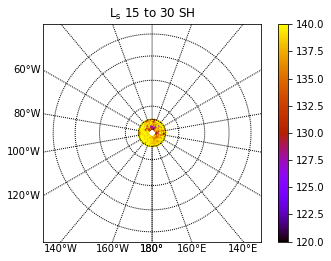

In [80]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 15 to 30 SH')
x,y = m(SLongSUB2,SLatSUB2)
m.scatter(x, y,c=STSUB2, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

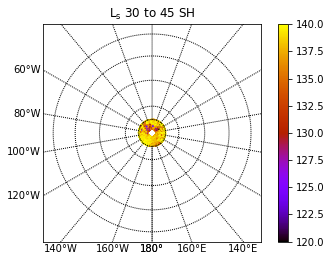

In [81]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 30 to 45 SH')
x,y = m(SLongSUB3,SLatSUB3)
m.scatter(x, y,c=STSUB3, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

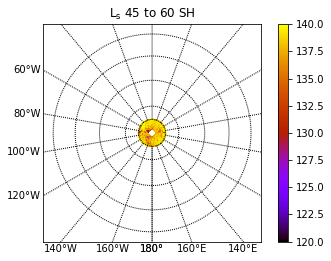

In [82]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 45 to 60 SH')
x,y = m(SLongSUB4,SLatSUB4)
m.scatter(x, y,c=STSUB4, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

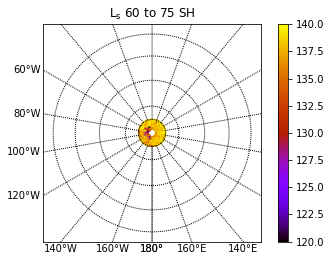

In [83]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 60 to 75 SH')
x,y = m(SLongSUB5,SLatSUB5)
m.scatter(x, y,c=STSUB5, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

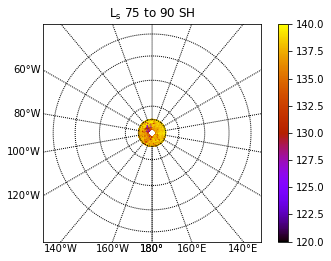

In [84]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 75 to 90 SH')
x,y = m(SLongSUB6,SLatSUB6)
m.scatter(x, y,c=STSUB6, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

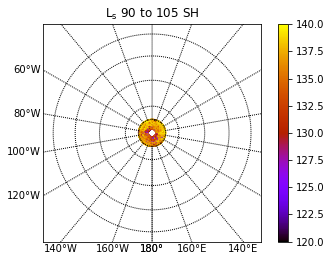

In [85]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 90 to 105 SH')
x,y = m(SLongSUB7,SLatSUB7)
m.scatter(x, y,c=STSUB7, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

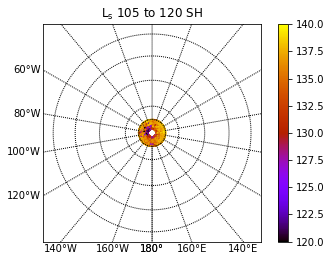

In [86]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 105 to 120 SH')
x,y = m(SLongSUB8,SLatSUB8)
m.scatter(x, y,c=STSUB8, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

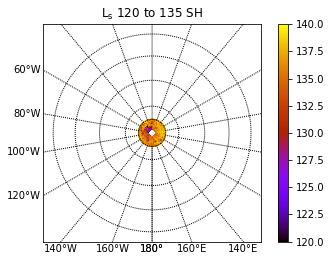

In [87]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 120 to 135 SH')
x,y = m(SLongSUB9,SLatSUB9)
m.scatter(x, y,c=STSUB9, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

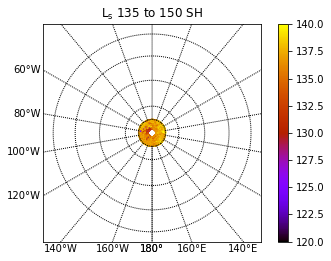

In [88]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 135 to 150 SH')
x,y = m(SLongSUB10,SLatSUB10)
m.scatter(x, y,c=STSUB10, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

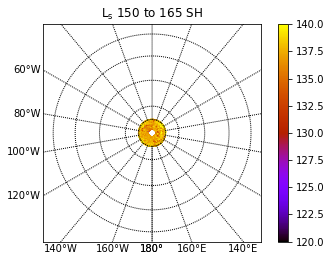

In [89]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 150 to 165 SH')
x,y = m(SLongSUB11,SLatSUB11)
m.scatter(x, y,c=STSUB11, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

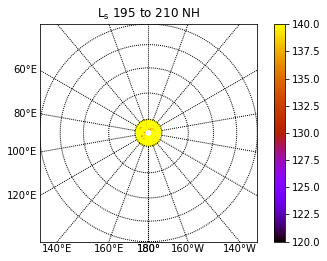

In [90]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 195 to 210 NH')
x,y = m(NLongSUB13,NLatSUB13)
m.scatter(x, y,c=NTSUB13, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

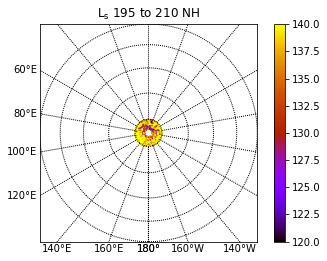

In [91]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 195 to 210 NH')
x,y = m(NLongSUB14,NLatSUB14)
m.scatter(x, y,c=NTSUB14, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

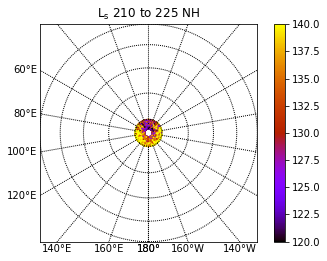

In [92]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 210 to 225 NH')
x,y = m(NLongSUB15,NLatSUB15)
m.scatter(x, y,c=NTSUB15, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

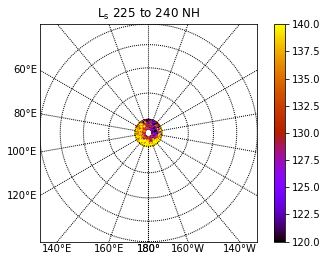

In [93]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 225 to 240 NH')
x,y = m(NLongSUB16,NLatSUB16)
m.scatter(x, y,c=NTSUB16, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

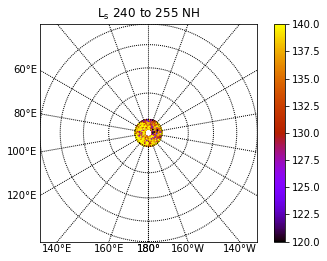

In [94]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 240 to 255 NH')
x,y = m(NLongSUB17,NLatSUB17)
m.scatter(x, y,c=NTSUB17, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

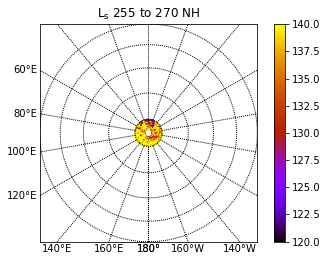

In [95]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 255 to 270 NH')
x,y = m(NLongSUB18,NLatSUB18)
m.scatter(x, y,c=NTSUB18, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

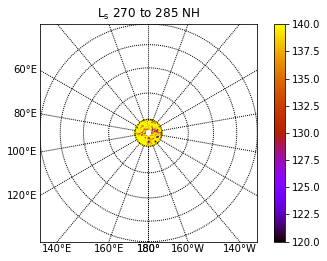

In [96]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 270 to 285 NH')
x,y = m(NLongSUB19,NLatSUB19)
m.scatter(x, y,c=NTSUB19, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

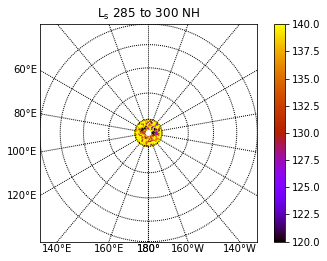

In [97]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 285 to 300 NH')
x,y = m(NLongSUB20,NLatSUB20)
m.scatter(x, y,c=NTSUB20, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

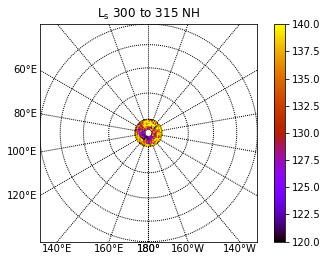

In [98]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('$\mathregular{L_s}$ 300 to 315 NH')
x,y = m(NLongSUB21,NLatSUB21)
m.scatter(x, y,c=NTSUB21, cmap='gnuplot', s=0.5, vmin = 120, vmax = 140)
plt.colorbar()
plt.show()

In [99]:
rad = np.pi/180 #to be used later

In [100]:
'''Function to convert latitude from a lambert azimuthal projection into a radius of a circle 
this function is specifically for the northern hemisphere'''
def RNorth(phi):
    R = 2*(np.cos(((phi+90)*rad)/2))
    return R

In [101]:
'''Function to convert latitude from a lambert azimuthal projection into a radius of a circle 
this function is specifically for the southern hemisphere'''
def RSouth(phi):
    R = 2*(np.cos(((90-phi)*rad)/2))
    return R

In [102]:
#evaluated previous functions for Martian coordinates to get radii
r = RNorth(Lat_CO2_NWI)
r1 = RNorth(Lat_CO2_NSP)
r2 = RNorth(Lat_CO2_NSM)
r3 = RNorth(Lat_CO2_NFA)
s = RSouth(Lat_CO2_SWI)
s1 = RSouth(Lat_CO2_SSP)
s2 = RSouth(Lat_CO2_SSM)
s3 = RSouth(Lat_CO2_SFA)

In [103]:
'''Function to convert polar coordinates int cartesian this is the x component'''
def converttox(R,theta):
    x= R*(np.cos(theta*rad))
    return x

In [104]:
'''Function to convert polar coordinates int cartesian this is the y component'''
def converttoy(R,theta):
    y= R*(np.sin(theta*rad))
    return y

In [105]:
#used radii from previous function and Martian longitudes to convert from polar to cartesian
XNWI = converttox(r,Long_CO2_NWI)
YNWI = converttoy(r,Long_CO2_NWI)
XNSP = converttox(r1,Long_CO2_NSP)
YNSP = converttoy(r1,Long_CO2_NSP)
XNSM = converttox(r2,Long_CO2_NSM)
YNSM = converttoy(r2,Long_CO2_NSM)
XNFA = converttox(r3,Long_CO2_NFA)
YNFA = converttoy(r3,Long_CO2_NFA)
XSWI = converttox(s,Long_CO2_SWI)
YSWI = converttoy(s,Long_CO2_SWI)
XSSP = converttox(s1,Long_CO2_SSP)
YSSP = converttoy(s1,Long_CO2_SSP)
XSSM = converttox(s2,Long_CO2_SSM)
YSSM = converttoy(s2,Long_CO2_SSM)
XSFA = converttox(s3,Long_CO2_SFA)
YSFA = converttoy(s3,Long_CO2_SFA)

In [106]:
#converted previous variables into arrays
xNWI = np.array(XNWI)
yNWI = np.array(YNWI)
xNSP = np.array(XNSP)
yNSP = np.array(YNSP)
xNSM = np.array(XNSM)
yNSM = np.array(YNSM)
xNFA = np.array(XNFA)
yNFA = np.array(YNFA)
xSWI = np.array(XSWI)
ySWI = np.array(YSWI)
xSSP = np.array(XSSP)
ySSP = np.array(YSSP)
xSSM = np.array(XSSM)
ySSM = np.array(YSSM)
xSFA = np.array(XSFA)
ySFA = np.array(YSFA)

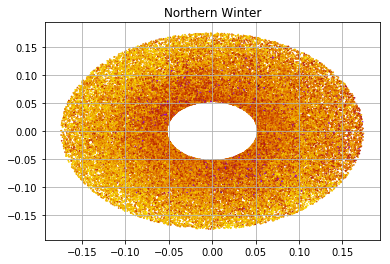

In [107]:
#plotted Martian north polar CO2 ice cap during northern winter in cartesian coordinates
plt.scatter(xNWI,yNWI,c=Temp_NWI, cmap='gnuplot', s=.5)
plt.title('Northern Winter')
plt.grid()
plt.show()

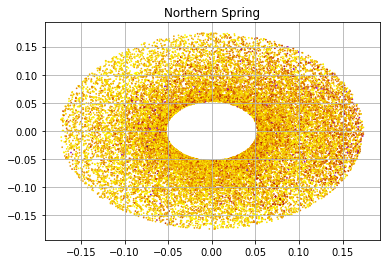

In [108]:
#plotted Martian north polar CO2 ice cap during northern spring in cartesian coordinates
plt.scatter(xNSP,yNSP,c=Temp_NSP, cmap='gnuplot', s=.5)
plt.title('Northern Spring')
plt.grid()
plt.show()

In [109]:
print xNSM

[-0.14159491 -0.12502874 -0.15016916  0.05140693 -0.12614258]


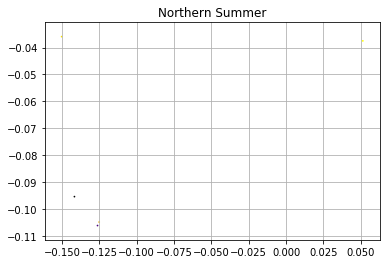

In [110]:
#plotted Martian north polar CO2 ice cap during northern summer in cartesian coordinates
plt.scatter(xNSM,yNSM,c=Temp_NSM, cmap='gnuplot', s=.5)
plt.title('Northern Summer')
plt.grid()
plt.show()

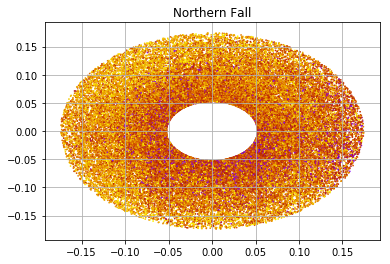

In [111]:
#plotted Martian north polar CO2 ice cap during northern fall in cartesian coordinates
plt.scatter(xNFA,yNFA,c=Temp_NFA, cmap='gnuplot', s=.5)
plt.title('Northern Fall')
plt.grid()
plt.show()

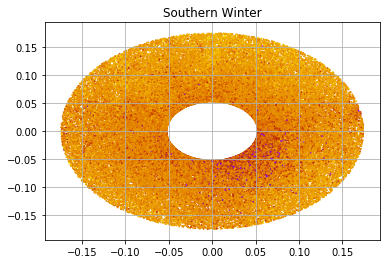

In [112]:
#plotted Martian south polar CO2 ice cap during southern winter in cartesian coordinates
plt.scatter(xSWI,ySWI,c=Temp_SWI, cmap='gnuplot', s=.5)
plt.title('Southern Winter')
plt.grid()
plt.show()

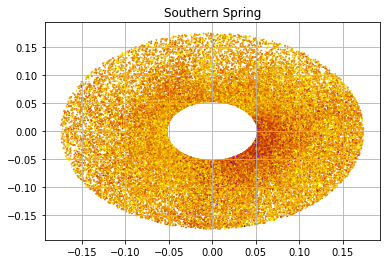

In [113]:
#plotted Martian north polar CO2 ice cap during northern spring in cartesian coordinates
plt.scatter(xSSP,ySSP,c=Temp_SSP, cmap='gnuplot', s=.5)
plt.title('Southern Spring')
plt.grid()
plt.show()

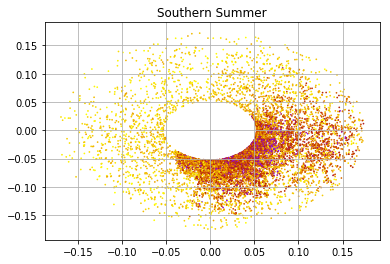

In [114]:
#plotted Martian north polar CO2 ice cap during northern spring in cartesian coordinates
plt.scatter(xSSM,ySSM,c=Temp_SSM, cmap='gnuplot', s=.5)
plt.title('Southern Summer')
plt.grid()
plt.show()

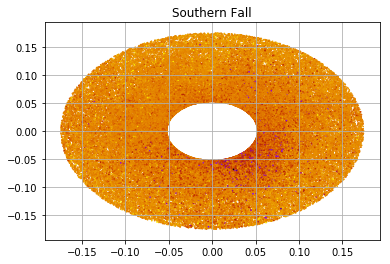

In [115]:
#plotted Martian north polar CO2 ice cap during northern spring in cartesian coordinates
plt.scatter(xSFA,ySFA,c=Temp_SFA, cmap='gnuplot', s=.5)
plt.title('Southern Fall')
plt.grid()
plt.show()

In [116]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (North)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

N0, xedges, yedges, binnumber = stats.binned_statistic_2d(xNWI, yNWI, values = Temp_NWI, statistic='mean' , bins = [xbins, ybins])
N1, xedges, yedges, binnumber = stats.binned_statistic_2d(xNSP, yNSP, values = Temp_NSP, statistic='mean' , bins = [xbins, ybins])
N2, xedges, yedges, binnumber = stats.binned_statistic_2d(xNSM, yNSM, values = Temp_NSM, statistic='mean' , bins = [xbins, ybins])
N3, xedges, yedges, binnumber = stats.binned_statistic_2d(xNFA, yNFA, values = Temp_NFA, statistic='mean' , bins = [xbins, ybins])


In [117]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

S0, xedges, yedges, binnumber = stats.binned_statistic_2d(xSWI, ySWI, values = Temp_SWI, statistic='mean' , bins = [xbins, ybins])
S1, xedges, yedges, binnumber = stats.binned_statistic_2d(xSSP, ySSP, values = Temp_SSP, statistic='mean' , bins = [xbins, ybins])
S2, xedges, yedges, binnumber = stats.binned_statistic_2d(xSSM, ySSM, values = Temp_SSM, statistic='mean' , bins = [xbins, ybins])
S3, xedges, yedges, binnumber = stats.binned_statistic_2d(xSFA, ySFA, values = Temp_SFA, statistic='mean' , bins = [xbins, ybins])

In [118]:
#used pervious functions to calculate IR Flux of the northern and southern winter
NWIIR = IRFlux(N0)
NSPIR = IRFlux(N1)
NSMIR = IRFlux(N2)
NFAIR = IRFlux(N3)
SWIIR = IRFlux(S0)
SSPIR = IRFlux(S1)
SSMIR = IRFlux(S2)
SFAIR = IRFlux(S3)

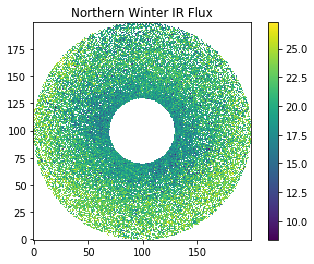

In [119]:
#plotted the IR Flux for Northern Hemisphere
plt.imshow(NWIIR,origin='lower')
plt.colorbar()
plt.title('Northern Winter IR Flux')
plt.show()

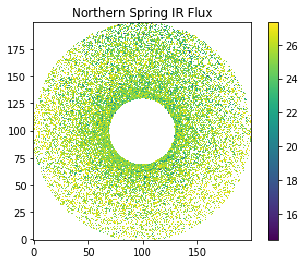

In [120]:
#plotted the IR Flux for Northern Hemisphere
plt.imshow(NSPIR,origin='lower')
plt.colorbar()
plt.title('Northern Spring IR Flux')
plt.show()

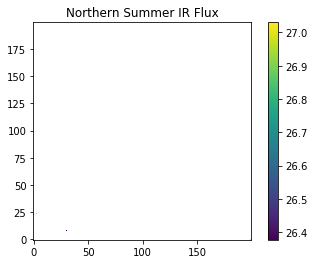

In [121]:
#plotted the IR Flux for Northern Hemisphere
plt.imshow(NSMIR,origin='lower')
plt.colorbar()
plt.title('Northern Summer IR Flux')
plt.show()

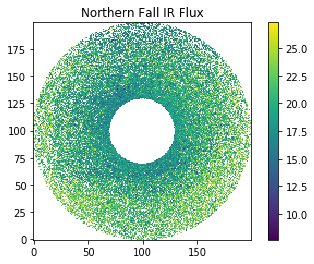

In [122]:
#plotted the IR Flux for Northern Hemisphere
plt.imshow(NFAIR,origin='lower')
plt.colorbar()
plt.title('Northern Fall IR Flux')
plt.show()

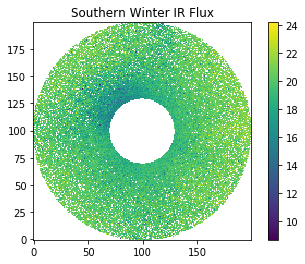

In [123]:
#plotted the IR Flux for southern Hemisphere
plt.imshow(SWIIR,origin='lower')
plt.colorbar()
plt.title('Southern Winter IR Flux')
plt.show()

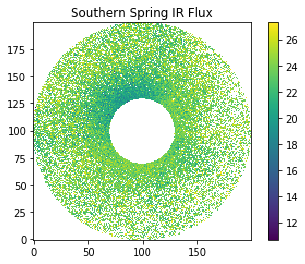

In [124]:
#plotted the IR Flux for southern Hemisphere
plt.imshow(SSPIR,origin='lower')
plt.colorbar()
plt.title('Southern Spring IR Flux')
plt.show()

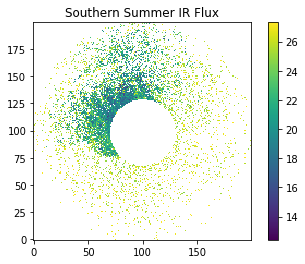

In [125]:
#plotted the IR Flux for southern Hemisphere
plt.imshow(SSMIR,origin='lower')
plt.colorbar()
plt.title('Southern Summer IR Flux')
plt.show()

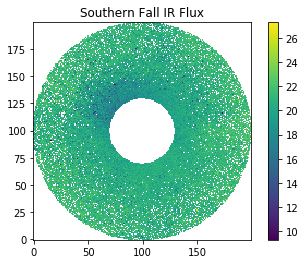

In [126]:
#plotted the IR Flux for southern Hemisphere
plt.imshow(SFAIR,origin='lower')
plt.colorbar()
plt.title('Southern Fall IR Flux')
plt.show()

In [127]:
#evaluated R function to convert latitude to radii for the previously subdivided seasons into units of 15 L_s for southern hemisphere
s_0 = RSouth(SLat_CO2_SUB)
s_1 = RSouth(SLat_CO2_SUB2)
s_2 = RSouth(SLat_CO2_SUB3)
s_3 = RSouth(SLat_CO2_SUB4)
s_4 = RSouth(SLat_CO2_SUB5)
s_5 = RSouth(SLat_CO2_SUB6)
s_6 = RSouth(SLat_CO2_SUB7)
s_7 = RSouth(SLat_CO2_SUB8)
s_8 = RSouth(SLat_CO2_SUB9)
s_9 = RSouth(SLat_CO2_SUB10)
s_10 = RSouth(SLat_CO2_SUB11)
s_11 = RSouth(SLat_CO2_SUB12)
s_12 = RSouth(SLat_CO2_SUB13)
s_13 = RSouth(SLat_CO2_SUB14)
s_14 = RSouth(SLat_CO2_SUB15)
s_15 = RSouth(SLat_CO2_SUB16)
s_16 = RSouth(SLat_CO2_SUB17)
s_17 = RSouth(SLat_CO2_SUB18)
s_18 = RSouth(SLat_CO2_SUB19)
s_19 = RSouth(SLat_CO2_SUB20)
s_20 = RSouth(SLat_CO2_SUB21)
s_21 = RSouth(SLat_CO2_SUB22)
s_22 = RSouth(SLat_CO2_SUB23)
s_23 = RSouth(SLat_CO2_SUB24)

In [128]:
#evaluated R function to convert latitude to radii for the previously subdivided seasons into units of 15 L_s for northern hemisphere
r_0 = RNorth(NLat_CO2_SUB)
r_1 = RNorth(NLat_CO2_SUB2)
r_2 = RNorth(NLat_CO2_SUB3)
r_3 = RNorth(NLat_CO2_SUB4)
r_4 = RNorth(NLat_CO2_SUB5)
r_5 = RNorth(NLat_CO2_SUB6)
r_6 = RNorth(NLat_CO2_SUB7)
r_7 = RNorth(NLat_CO2_SUB8)
r_8 = RNorth(NLat_CO2_SUB9)
r_9 = RNorth(NLat_CO2_SUB10)
r_10 = RNorth(NLat_CO2_SUB11)
r_11 = RNorth(NLat_CO2_SUB12)
r_12 = RNorth(NLat_CO2_SUB13)
r_13 = RNorth(NLat_CO2_SUB14)
r_14 = RNorth(NLat_CO2_SUB15)
r_15 = RNorth(NLat_CO2_SUB16)
r_16 = RNorth(NLat_CO2_SUB17)
r_17 = RNorth(NLat_CO2_SUB18)
r_18 = RNorth(NLat_CO2_SUB19)
r_19 = RNorth(NLat_CO2_SUB20)
r_20 = RNorth(NLat_CO2_SUB21)
r_21 = RNorth(NLat_CO2_SUB22)
r_22 = RNorth(NLat_CO2_SUB23)
r_23 = RNorth(NLat_CO2_SUB24)

In [129]:
#used radii from previous function and Martian longitudes to convert from polar to cartesian northern hemisphere
XN_0 = converttox(r_0,NLong_CO2_SUB)
YN_0 = converttoy(r_0,NLong_CO2_SUB)
XN_1 = converttox(r_1,NLong_CO2_SUB2)
YN_1 = converttoy(r_1,NLong_CO2_SUB2)
XN_2 = converttox(r_2,NLong_CO2_SUB3)
YN_2 = converttoy(r_2,NLong_CO2_SUB3)
XN_3 = converttox(r_3,NLong_CO2_SUB4)
YN_3 = converttoy(r_3,NLong_CO2_SUB4)
XN_4 = converttox(r_4,NLong_CO2_SUB5)
YN_4 = converttoy(r_4,NLong_CO2_SUB5)
XN_5 = converttox(r_5,NLong_CO2_SUB6)
YN_5 = converttoy(r_5,NLong_CO2_SUB6)
XN_6 = converttox(r_6,NLong_CO2_SUB7)
YN_6 = converttoy(r_6,NLong_CO2_SUB7)
XN_7 = converttox(r_7,NLong_CO2_SUB8)
YN_7 = converttoy(r_7,NLong_CO2_SUB8)
XN_8 = converttox(r_8,NLong_CO2_SUB9)
YN_8 = converttoy(r_8,NLong_CO2_SUB9)
XN_9 = converttox(r_9,NLong_CO2_SUB10)
YN_9 = converttoy(r_9,NLong_CO2_SUB10)
XN_10 = converttox(r_10,NLong_CO2_SUB11)
YN_10 = converttoy(r_10,NLong_CO2_SUB11)
XN_11 = converttox(r_11,NLong_CO2_SUB12)
YN_11 = converttoy(r_11,NLong_CO2_SUB12)
XN_12 = converttox(r_12,NLong_CO2_SUB13)
YN_12 = converttoy(r_12,NLong_CO2_SUB13)
XN_13 = converttox(r_13,NLong_CO2_SUB14)
YN_13 = converttoy(r_13,NLong_CO2_SUB14)
XN_14 = converttox(r_14,NLong_CO2_SUB15)
YN_14 = converttoy(r_14,NLong_CO2_SUB15)
XN_15 = converttox(r_15,NLong_CO2_SUB16)
YN_15 = converttoy(r_15,NLong_CO2_SUB16)
XN_16 = converttox(r_16,NLong_CO2_SUB17)
YN_16 = converttoy(r_16,NLong_CO2_SUB17)
XN_17 = converttox(r_17,NLong_CO2_SUB18)
YN_17 = converttoy(r_17,NLong_CO2_SUB18)
XN_18 = converttox(r_18,NLong_CO2_SUB19)
YN_18 = converttoy(r_18,NLong_CO2_SUB19)
XN_19 = converttox(r_19,NLong_CO2_SUB20)
YN_19 = converttoy(r_19,NLong_CO2_SUB20)
XN_20 = converttox(r_20,NLong_CO2_SUB21)
YN_20 = converttoy(r_20,NLong_CO2_SUB21)
XN_21 = converttox(r_21,NLong_CO2_SUB22)
YN_21 = converttoy(r_21,NLong_CO2_SUB22)
XN_22 = converttox(r_22,NLong_CO2_SUB23)
YN_22 = converttoy(r_22,NLong_CO2_SUB23)
XN_23 = converttox(r_23,NLong_CO2_SUB24)
YN_23 = converttoy(r_23,NLong_CO2_SUB24)

In [130]:
#used radii from previous function and Martian longitudes to convert from polar to cartesian southern hemisphere
XS_0 = converttox(s_0,SLong_CO2_SUB)
YS_0 = converttoy(s_0,SLong_CO2_SUB)
XS_1 = converttox(s_1,SLong_CO2_SUB2)
YS_1 = converttoy(s_1,SLong_CO2_SUB2)
XS_2 = converttox(s_2,SLong_CO2_SUB3)
YS_2 = converttoy(s_2,SLong_CO2_SUB3)
XS_3 = converttox(s_3,SLong_CO2_SUB4)
YS_3 = converttoy(s_3,SLong_CO2_SUB4)
XS_4 = converttox(s_4,SLong_CO2_SUB5)
YS_4 = converttoy(s_4,SLong_CO2_SUB5)
XS_5 = converttox(s_5,SLong_CO2_SUB6)
YS_5 = converttoy(s_5,SLong_CO2_SUB6)
XS_6 = converttox(s_6,SLong_CO2_SUB7)
YS_6 = converttoy(s_6,SLong_CO2_SUB7)
XS_7 = converttox(s_7,SLong_CO2_SUB8)
YS_7 = converttoy(s_7,SLong_CO2_SUB8)
XS_8 = converttox(s_8,SLong_CO2_SUB9)
YS_8 = converttoy(s_8,SLong_CO2_SUB9)
XS_9 = converttox(s_9,SLong_CO2_SUB10)
YS_9 = converttoy(s_9,SLong_CO2_SUB10)
XS_10 = converttox(s_10,SLong_CO2_SUB11)
YS_10 = converttoy(s_10,SLong_CO2_SUB11)
XS_11 = converttox(s_11,SLong_CO2_SUB12)
YS_11 = converttoy(s_11,SLong_CO2_SUB12)
XS_12 = converttox(s_12,SLong_CO2_SUB13)
YS_12 = converttoy(s_12,SLong_CO2_SUB13)
XS_13 = converttox(s_13,SLong_CO2_SUB14)
YS_13 = converttoy(s_13,SLong_CO2_SUB14)
XS_14 = converttox(s_14,SLong_CO2_SUB15)
YS_14 = converttoy(s_14,SLong_CO2_SUB15)
XS_15 = converttox(s_15,SLong_CO2_SUB16)
YS_15 = converttoy(s_15,SLong_CO2_SUB16)
XS_16 = converttox(s_16,SLong_CO2_SUB17)
YS_16 = converttoy(s_16,SLong_CO2_SUB17)
XS_17 = converttox(s_17,SLong_CO2_SUB18)
YS_17 = converttoy(s_17,SLong_CO2_SUB18)
XS_18 = converttox(s_18,SLong_CO2_SUB19)
YS_18 = converttoy(s_18,SLong_CO2_SUB19)
XS_19 = converttox(s_19,SLong_CO2_SUB20)
YS_19 = converttoy(s_19,SLong_CO2_SUB20)
XS_20 = converttox(s_20,SLong_CO2_SUB21)
YS_20 = converttoy(s_20,SLong_CO2_SUB21)
XS_21 = converttox(s_21,SLong_CO2_SUB22)
YS_21 = converttoy(s_21,SLong_CO2_SUB22)
XS_22 = converttox(s_22,SLong_CO2_SUB23)
YS_22 = converttoy(s_22,SLong_CO2_SUB23)
XS_23 = converttox(s_23,SLong_CO2_SUB24)
YS_23 = converttoy(s_23,SLong_CO2_SUB24)

In [131]:
#converted previous variables into arrays 
xN_0 = np.array(XN_0)
yN_0 = np.array(YN_0)
xS_0 = np.array(XS_0)
yS_0 = np.array(YS_0)
xN_1 = np.array(XN_1)
yN_1 = np.array(YN_1)
xS_1 = np.array(XS_1)
yS_1 = np.array(YS_1)
xN_2 = np.array(XN_2)
yN_2 = np.array(YN_2)
xS_2 = np.array(XS_2)
yS_2 = np.array(YS_2)
xN_3 = np.array(XN_3)
yN_3 = np.array(YN_3)
xS_3 = np.array(XS_3)
yS_3 = np.array(YS_3)
xN_4 = np.array(XN_4)
yN_4 = np.array(YN_4)
xS_4 = np.array(XS_4)
yS_4 = np.array(YS_4)
xN_5 = np.array(XN_5)
yN_5 = np.array(YN_5)
xS_5 = np.array(XS_5)
yS_5 = np.array(YS_5)
xN_6 = np.array(XN_6)
yN_6 = np.array(YN_6)
xS_6 = np.array(XS_6)
yS_6 = np.array(YS_6)
xN_7 = np.array(XN_7)
yN_7 = np.array(YN_7)
xS_7 = np.array(XS_7)
yS_7 = np.array(YS_7)
xN_8 = np.array(XN_8)
yN_8 = np.array(YN_8)
xS_8 = np.array(XS_8)
yS_8 = np.array(YS_8)
xN_9 = np.array(XN_9)
yN_9 = np.array(YN_9)
xS_9 = np.array(XS_9)
yS_9 = np.array(YS_9)
xN_10 = np.array(XN_10)
yN_10 = np.array(YN_10)
xS_10 = np.array(XS_10)
yS_10 = np.array(YS_10)
xN_11 = np.array(XN_11)
yN_11 = np.array(YN_11)
xS_11 = np.array(XS_11)
yS_11 = np.array(YS_11)
xN_12 = np.array(XN_12)
yN_12 = np.array(YN_12)
xS_12 = np.array(XS_12)
yS_12 = np.array(YS_12)
xN_13 = np.array(XN_13)
yN_13 = np.array(YN_13)
xS_13 = np.array(XS_13)
yS_13 = np.array(YS_13)
xN_14 = np.array(XN_14)
yN_14 = np.array(YN_14)
xS_14 = np.array(XS_14)
yS_14 = np.array(YS_14)
xN_15 = np.array(XN_15)
yN_15 = np.array(YN_15)
xS_15 = np.array(XS_15)
yS_15 = np.array(YS_15)
xN_16 = np.array(XN_16)
yN_16 = np.array(YN_16)
xS_16 = np.array(XS_16)
yS_16 = np.array(YS_16)
xN_17 = np.array(XN_17)
yN_17 = np.array(YN_17)
xS_17 = np.array(XS_17)
yS_17 = np.array(YS_17)
xN_18 = np.array(XN_18)
yN_18 = np.array(YN_18)
xS_18 = np.array(XS_18)
yS_18 = np.array(YS_18)
xN_19 = np.array(XN_19)
yN_19 = np.array(YN_19)
xS_19 = np.array(XS_19)
yS_19 = np.array(YS_19)
xN_20 = np.array(XN_20)
yN_20 = np.array(YN_20)
xS_20 = np.array(XS_20)
yS_20 = np.array(YS_20)
xN_21 = np.array(XN_21)
yN_21 = np.array(YN_21)
xS_21 = np.array(XS_21)
yS_21 = np.array(YS_21)
xN_22 = np.array(XN_22)
yN_22 = np.array(YN_22)
xS_22 = np.array(XS_22)
yS_22 = np.array(YS_22)
xN_23 = np.array(XN_23)
yN_23 = np.array(YN_23)
xS_23 = np.array(XS_23)
yS_23 = np.array(YS_23)

In [132]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n0, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_0, yN_0, values = NTFLUX, statistic='mean' , bins = [xbins, ybins])

In [133]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)
xbins, ybins = len(x_range), len(y_range)

n1, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_1, yN_1, values = NTFLUX2, statistic='mean' , bins = [xbins, ybins])

In [134]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n2, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_2, yN_2, values = NTFLUX3, statistic='mean' , bins = [xbins, ybins])

In [135]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n3, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_3, yN_3, values = NTFLUX4, statistic='mean' , bins = [xbins, ybins])

In [136]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n4, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_4, yN_4, values = NTFLUX5, statistic='mean' , bins = [xbins, ybins])

In [137]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n5, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_5, yN_5, values = NTFLUX6, statistic='mean' , bins = [xbins, ybins])

In [138]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n11, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_11, yN_11, values = NTFLUX12, statistic='mean' , bins = [xbins, ybins])

In [139]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n12, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_12, yN_12, values = NTFLUX13, statistic='mean' , bins = [xbins, ybins])

In [140]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n13, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_13, yN_13, values = NTFLUX14, statistic='mean' , bins = [xbins, ybins])

In [141]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n14, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_14, yN_14, values = NTFLUX15, statistic='mean' , bins = [xbins, ybins])

In [142]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n15, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_15, yN_15, values = NTFLUX16, statistic='mean' , bins = [xbins, ybins])

In [143]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n16, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_16, yN_16, values = NTFLUX17, statistic='mean' , bins = [xbins, ybins])

In [144]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n17, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_17, yN_17, values = NTFLUX18, statistic='mean' , bins = [xbins, ybins])

In [145]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n18, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_18, yN_18, values = NTFLUX19, statistic='mean' , bins = [xbins, ybins])

In [146]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n19, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_19, yN_19, values = NTFLUX20, statistic='mean' , bins = [xbins, ybins])

In [147]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)
xbins, ybins = len(x_range), len(y_range)

n20, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_20, yN_20, values = NTFLUX21, statistic='mean' , bins = [xbins, ybins])

In [148]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n21, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_21, yN_21, values = NTFLUX22, statistic='mean' , bins = [xbins, ybins])

In [149]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n22, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_22, yN_22, values = NTFLUX23, statistic='mean' , bins = [xbins, ybins])

In [150]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

n23, xedges, yedges, binnumber = stats.binned_statistic_2d(xN_23, yN_23, values = NTFLUX24, statistic='mean' , bins = [xbins, ybins])

In [151]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s0, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_0, yS_0, values = STFLUX, statistic='mean' , bins = [xbins, ybins])

In [152]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s1, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_1, yS_1, values = STFLUX2, statistic='mean' , bins = [xbins, ybins])

In [153]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s2, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_2, yS_2, values = STFLUX3, statistic='mean' , bins = [xbins, ybins])

In [154]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s3, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_3, yS_3, values = STFLUX4, statistic='mean' , bins = [xbins, ybins])

In [155]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s4, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_4, yS_4, values = STFLUX5, statistic='mean' , bins = [xbins, ybins])

In [156]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s5, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_5, yS_5, values = STFLUX6, statistic='mean' , bins = [xbins, ybins])

In [157]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s6, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_6, yS_6, values = STFLUX7, statistic='mean' , bins = [xbins, ybins])

In [158]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s7, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_7, yS_7, values = STFLUX8, statistic='mean' , bins = [xbins, ybins])

In [159]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s8, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_8, yS_8, values = STFLUX9, statistic='mean' , bins = [xbins, ybins])

In [160]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s9, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_9, yS_9, values = STFLUX10, statistic='mean' , bins = [xbins, ybins])

In [161]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s10, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_10, yS_10, values = STFLUX11, statistic='mean' , bins = [xbins, ybins])

In [162]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s11, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_11, yS_11, values = STFLUX12, statistic='mean' , bins = [xbins, ybins])

In [163]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s12, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_12, yS_12, values = STFLUX13, statistic='mean' , bins = [xbins, ybins])

In [164]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s13, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_13, yS_13, values = STFLUX14, statistic='mean' , bins = [xbins, ybins])

In [165]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s14, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_14, yS_14, values = STFLUX15, statistic='mean' , bins = [xbins, ybins])

In [166]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s15, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_15, yS_15, values = STFLUX16, statistic='mean' , bins = [xbins, ybins])

In [167]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s16, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_16, yS_16, values = STFLUX17, statistic='mean' , bins = [xbins, ybins])

In [168]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s17, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_17, yS_17, values = STFLUX18, statistic='mean' , bins = [xbins, ybins])

In [169]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s18, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_18, yS_18, values = STFLUX19, statistic='mean' , bins = [xbins, ybins])

In [170]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s19, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_19, yS_19, values = STFLUX20, statistic='mean' , bins = [xbins, ybins])

In [171]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s20, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_20, yS_20, values = STFLUX21, statistic='mean' , bins = [xbins, ybins])

In [172]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s21, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_21, yS_21, values = STFLUX22, statistic='mean' , bins = [xbins, ybins])

In [173]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)

xbins, ybins = len(x_range), len(y_range)

s22, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_22, yS_22, values = STFLUX23, statistic='mean' , bins = [xbins, ybins])

In [174]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean that will be used to calculate IR Flux (South)
x_range = np.arange(-1,1,.01)
y_range = np.arange(-1,1,.01)
xbins, ybins = len(x_range), len(y_range)

s23, xedges, yedges, binnumber = stats.binned_statistic_2d(xS_23, yS_23, values = STFLUX24, statistic='mean' , bins = [xbins, ybins])

In [175]:
#took the average and standard deviation (error) of the previous bin flux calculations for north hemisphere C02
n_0flux = np.nanmean(n0)
n_1flux = np.nanmean(n1)
n_2flux = np.nanmean(n2)
n_3flux = np.nanmean(n3)
n_4flux = np.nanmean(n4)
n_5flux = np.nanmean(n5)
n_6flux = np.nanmean(np.nan)
n_7flux = np.nanmean(np.nan)
n_8flux = np.nanmean(np.nan)
n_9flux = np.nanmean(np.nan)
n_10flux = np.nanmean(np.nan)
n_11flux = np.nanmean(n11)
n_12flux = np.nanmean(n12)
n_13flux = np.nanmean(n13)
n_14flux = np.nanmean(n14)
n_15flux = np.nanmean(n15)
n_16flux = np.nanmean(n16)
n_17flux = np.nanmean(n17)
n_18flux = np.nanmean(n18)
n_19flux = np.nanmean(n19)
n_20flux = np.nanmean(n20)
n_21flux = np.nanmean(n21)
n_22flux = np.nanmean(n22)
n_23flux = np.nanmean(n23)

n0SD = np.nanstd(n0)
n1SD = np.nanstd(n1)
n2SD = np.nanstd(n2)
n3SD = np.nanstd(n3)
n4SD = np.nanstd(n4)
n5SD = np.nanstd(n5)
n6SD = np.nanstd(np.nan)
n7SD = np.nanstd(np.nan)
n8SD = np.nanstd(np.nan)
n9SD = np.nanstd(np.nan)
n10SD = np.nanstd(np.nan)
n11SD = np.nanstd(n11)
n12SD = np.nanstd(n12)
n13SD = np.nanstd(n13)
n14SD = np.nanstd(n14)
n15SD = np.nanstd(n15)
n16SD = np.nanstd(n16)
n17SD = np.nanstd(n17)
n18SD = np.nanstd(n18)
n19SD = np.nanstd(n19)
n20SD = np.nanstd(n20)
n21SD = np.nanstd(n21)
n22SD = np.nanstd(n22)
n23SD = np.nanstd(n23)

/Users/eytangarybicas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/eytangarybicas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/Users/eytangarybicas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/Users/eytangarybicas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/Users/eytangarybicas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/Users/eytangarybicas/anaconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [176]:
#took the average and standard deviation (error) of the previous bin flux calculations for south hemisphere C02
s_0flux = np.nanmean(s0)
s_1flux = np.nanmean(s1)
s_2flux = np.nanmean(s2)
s_3flux = np.nanmean(s3)
s_4flux = np.nanmean(s4)
s_5flux = np.nanmean(s5)
s_6flux = np.nanmean(s6)
s_7flux = np.nanmean(s7)
s_8flux = np.nanmean(s8)
s_9flux = np.nanmean(s9)
s_10flux = np.nanmean(s10)
s_11flux = np.nanmean(s11)
s_12flux = np.nanmean(s12)
s_13flux = np.nanmean(s13)
s_14flux = np.nanmean(s14)
s_15flux = np.nanmean(s15)
s_16flux = np.nanmean(s16)
s_17flux = np.nanmean(s17)
s_18flux = np.nanmean(s18)
s_19flux = np.nanmean(s19)
s_20flux = np.nanmean(s20)
s_21flux = np.nanmean(s21)
s_22flux = np.nanmean(s22)
s_23flux = np.nanmean(s23)

s0SD = np.nanstd(s0)
s1SD = np.nanstd(s1)
s2SD = np.nanstd(s2)
s3SD = np.nanstd(s3)
s4SD = np.nanstd(s4)
s5SD = np.nanstd(s5)
s6SD = np.nanstd(s6)
s7SD = np.nanstd(s7)
s8SD = np.nanstd(s8)
s9SD = np.nanstd(s9)
s10SD = np.nanstd(s10)
s11SD = np.nanstd(s11)
s12SD = np.nanstd(s12)
s13SD = np.nanstd(s13)
s14SD = np.nanstd(s14)
s15SD = np.nanstd(s15)
s16SD = np.nanstd(s16)
s17SD = np.nanstd(s17)
s18SD = np.nanstd(s18)
s19SD = np.nanstd(s19)
s20SD = np.nanstd(s20)
s21SD = np.nanstd(s21)
s22SD = np.nanstd(s22)
s23SD = np.nanstd(s23)

In [177]:
#took previous calculations and stored them in arrays to be plotted and analysed
IRsouth = [s_0flux,s_1flux,s_2flux,s_3flux,s_4flux,s_5flux,s_6flux,s_7flux,s_8flux,s_9flux,s_10flux,
      s_11flux,s_12flux,s_13flux,s_14flux,s_15flux,s_16flux,s_17flux,s_18flux,s_19flux,s_20flux,s_21flux,
      s_22flux,s_23flux]
IRsouth = np.array(IRsouth)
IRnorth = [n_0flux,n_1flux,n_2flux,n_3flux,n_4flux,n_5flux,n_6flux,n_7flux,n_8flux,n_9flux,n_10flux,
      n_11flux,n_12flux,n_13flux,n_14flux,n_15flux,n_16flux,n_17flux,n_18flux,n_19flux,n_20flux,n_21flux,
      n_22flux,n_23flux]
IRnorth = np.array(IRnorth)
n_err = [n0SD,n1SD,n2SD,n3SD,n4SD,n5SD,n6SD,n7SD,n8SD,n9SD,n10SD,n11SD,n12SD,n13SD,n14SD,n15SD,n16SD,
         n17SD,n18SD,n19SD,n20SD,n21SD,n22SD,n23SD]
s_err = [s0SD,s1SD,s2SD,s3SD,s4SD,s5SD,s6SD,s7SD,s8SD,s9SD,s10SD,s11SD,s12SD,s13SD,s14SD,s15SD,s16SD,
         s17SD,s18SD,s19SD,s20SD,s21SD,s22SD,s23SD]
L_s = np.linspace(0,360,24)

/Users/eytangarybicas/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


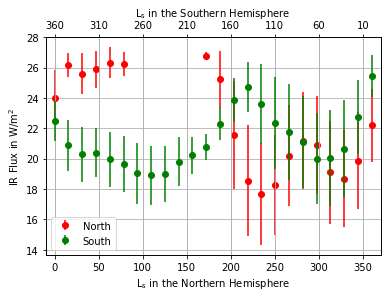

In [178]:
#plotted northern hemisphere and southern hemisphere CO2 IR fluxes throughout a martian year
fig=plt.figure()
plt.grid()
plt.xlim(-10,370)
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
plt.grid()
plt.xlim(-10,370)
No = ax1.errorbar(L_s,IRnorth,yerr = n_err, fmt = 'o', label= 'North',color = 'r')
So = ax2.errorbar(L_s,IRsouth,yerr = s_err, fmt = 'o', label= 'South', color = 'g')
ax1.set_xlabel('$\mathregular{L_s}$ in the Northern Hemisphere')
ax2.xaxis.tick_top()
ax2.set_xticklabels(['370','360','310','260','210','160','110','60','10'])
ax2.set_xlabel('$\mathregular{L_s}$ in the Southern Hemisphere')
plt.legend([No,So],['North','South'], loc = 'lower left')
ax1.set_ylabel('IR Flux in W/$\mathregular{m^2}$')
plt.show()

In [179]:
#constrained initial MCS dataframe to fit conditions of daily and seasonal as well as regional temperatures
new_north_day = df[(Surf_lat_df <= 90) & (Surf_lat_df >= 70) & (LTST_df <= 1.0) & (LTST_df >= 0.5)]
new_north_night = df[(Surf_lat_df <= 90) & (Surf_lat_df >= 70) & (LTST_df <= 0.5) & (LTST_df >= 0.0)]
new_south_day = df[(Surf_lat_df <= -70) & (Surf_lat_df >= -90) & (LTST_df <= 1.0) & (LTST_df >= 0.5)]
new_south_night = df[(Surf_lat_df <= -70) & (Surf_lat_df >= -90) & (LTST_df <= 0.5) & (LTST_df >= 0.0)]

In [180]:
#renamed columns in constrained dataframe
UTC_new_northD = new_north_day['UTC']
MY_new_northD= new_north_day['MY'] 
L_s_new_northD = new_north_day['L_s']
LTST_new_northD = new_north_day['LTST'] 
Surf_lat_new_northD = new_north_day['Surf_lat'] 
Surf_lon_new_northD = new_north_day['Surf_lon'] 
Surf_rad_new_northD = new_north_day['Surf_rad'] 
Surf_elev_new_northD = new_north_day['Surf_elev'] 
T_surf_new_northD = new_north_day['T_surf'] 
T_surf_err_new_northD = new_north_day['T_surf_err'] 
Dust_column_new_northD = new_north_day['Dust_column'] 
Dust_column_err_new_northD = new_north_day['Dust_column_err'] 
H2Oice_column_new_northD = new_north_day['H2Oice_column']
H2Oice_column_err_new_northD = new_north_day['H2Oice_column_err'] 
p_surf_new_northD = new_north_day['p_surf'] 
p_surf_err_new_northD = new_north_day['p_surf_err']
P_qual_new_northD = new_north_day['P_qual'] 
T_qual_new_northD = new_north_day['T_qual']

In [181]:
#renamed columns in constrained dataframe
UTC_new_northN = new_north_night['UTC']
MY_new_northN= new_north_night['MY'] 
L_s_new_northN = new_north_night['L_s']
LTST_new_northN = new_north_night['LTST'] 
Surf_lat_new_northN = new_north_night['Surf_lat'] 
Surf_lon_new_northN = new_north_night['Surf_lon'] 
Surf_rad_new_northN = new_north_night['Surf_rad'] 
Surf_elev_new_northN = new_north_night['Surf_elev'] 
T_surf_new_northN = new_north_night['T_surf'] 
T_surf_err_new_northN = new_north_night['T_surf_err'] 
Dust_column_new_northN = new_north_night['Dust_column'] 
Dust_column_err_new_northN = new_north_night['Dust_column_err'] 
H2Oice_column_new_northN = new_north_night['H2Oice_column']
H2Oice_column_err_new_northN = new_north_night['H2Oice_column_err'] 
p_surf_new_northN = new_north_night['p_surf'] 
p_surf_err_new_northN = new_north_night['p_surf_err']
P_qual_new_northN = new_north_night['P_qual'] 
T_qual_new_northN = new_north_night['T_qual']

In [182]:
#renamed columns in constrained dataframe
UTC_new_southD = new_south_day['UTC']
MY_new_southD= new_south_day['MY'] 
L_s_new_southD = new_south_day['L_s']
LTST_new_southD = new_south_day['LTST'] 
Surf_lat_new_southD = new_south_day['Surf_lat'] 
Surf_lon_new_southD = new_south_day['Surf_lon'] 
Surf_rad_new_southD = new_south_day['Surf_rad'] 
Surf_elev_new_southD = new_south_day['Surf_elev'] 
T_surf_new_southD = new_south_day['T_surf'] 
T_surf_err_new_southD = new_south_day['T_surf_err'] 
Dust_column_new_southD = new_south_day['Dust_column'] 
Dust_column_err_new_southD = new_south_day['Dust_column_err'] 
H2Oice_column_new_southD = new_south_day['H2Oice_column']
H2Oice_column_err_new_southD = new_south_day['H2Oice_column_err'] 
p_surf_new_southD = new_south_day['p_surf'] 
p_surf_err_new_southD = new_south_day['p_surf_err']
P_qual_new_southD = new_south_day['P_qual'] 
T_qual_new_southD = new_south_day['T_qual']

In [183]:
#renamed columns in constrained dataframe
UTC_new_southN = new_south_night['UTC']
MY_new_southN = new_south_night['MY'] 
L_s_new_southN = new_south_night['L_s']
LTST_new_southN = new_south_night['LTST'] 
Surf_lat_new_southN = new_south_night['Surf_lat'] 
Surf_lon_new_southN = new_south_night['Surf_lon'] 
Surf_rad_new_southN = new_south_night['Surf_rad'] 
Surf_elev_new_southN = new_south_night['Surf_elev'] 
T_surf_new_southN = new_south_night['T_surf'] 
T_surf_err_new_southN = new_south_night['T_surf_err'] 
Dust_column_new_southN = new_south_night['Dust_column'] 
Dust_column_err_new_southN = new_south_night['Dust_column_err'] 
H2Oice_column_new_southN = new_south_night['H2Oice_column']
H2Oice_column_err_new_southN = new_south_night['H2Oice_column_err'] 
p_surf_new_southN = new_south_night['p_surf'] 
p_surf_err_new_southN = new_south_night['p_surf_err']
P_qual_new_southN = new_south_night['P_qual'] 
T_qual_new_southN = new_south_night['T_qual']

In [184]:
#I subdivided the previous DataFrames based on periods of 15 L_s for the Northern Hemisphere Day
new_north_SUBD = new_north_day[(L_s_new_northD <= 15)  & (L_s_new_northD >= 0)]
new_north_SUBD2= new_north_day[(L_s_new_northD <= 30)  & (L_s_new_northD >= 15)]
new_north_SUBD3= new_north_day[(L_s_new_northD <= 45)  & (L_s_new_northD >= 30)]
new_north_SUBD4= new_north_day[(L_s_new_northD <= 60)  & (L_s_new_northD >= 45)]
new_north_SUBD5= new_north_day[(L_s_new_northD <= 75)  & (L_s_new_northD >= 60)]
new_north_SUBD6= new_north_day[(L_s_new_northD <= 90)  & (L_s_new_northD >= 75)]
new_north_SUBD7= new_north_day[(L_s_new_northD <= 105)  & (L_s_new_northD >= 90)]
new_north_SUBD8= new_north_day[(L_s_new_northD <= 120)  & (L_s_new_northD >= 105)]
new_north_SUBD9= new_north_day[(L_s_new_northD <= 135)  & (L_s_new_northD >= 120)]
new_north_SUBD10= new_north_day[(L_s_new_northD <= 150)  & (L_s_new_northD >= 135)]
new_north_SUBD11= new_north_day[(L_s_new_northD <= 165)  & (L_s_new_northD >= 150)]
new_north_SUBD12= new_north_day[(L_s_new_northD <= 180)  & (L_s_new_northD >= 165)]
new_north_SUBD13= new_north_day[(L_s_new_northD <= 195)  & (L_s_new_northD >= 180)]
new_north_SUBD14= new_north_day[(L_s_new_northD <= 210)  & (L_s_new_northD >= 195)]
new_north_SUBD15= new_north_day[(L_s_new_northD <= 225)  & (L_s_new_northD >= 210)]
new_north_SUBD16= new_north_day[(L_s_new_northD <= 240)  & (L_s_new_northD >= 225)]
new_north_SUBD17= new_north_day[(L_s_new_northD <= 255)  & (L_s_new_northD >= 240)]
new_north_SUBD18= new_north_day[(L_s_new_northD <= 270)  & (L_s_new_northD >= 255)]
new_north_SUBD19= new_north_day[(L_s_new_northD <= 285)  & (L_s_new_northD >= 270)]
new_north_SUBD20= new_north_day[(L_s_new_northD <= 300)  & (L_s_new_northD >= 285)]
new_north_SUBD21= new_north_day[(L_s_new_northD <= 315)  & (L_s_new_northD >= 300)]
new_north_SUBD22= new_north_day[(L_s_new_northD <= 330)  & (L_s_new_northD >= 315)]
new_north_SUBD23= new_north_day[(L_s_new_northD <= 345)  & (L_s_new_northD >= 330)]
new_north_SUBD24= new_north_day[(L_s_new_northD <= 360)  & (L_s_new_northD >= 345)]

In [185]:
#I subdivided the previous DataFrames based on periods of 15 L_s for the Northern Hemisphere Night
new_north_SUBN = new_north_night[(L_s_new_northN <= 15)  & (L_s_new_northN >= 0)]
new_north_SUBN2= new_north_night[(L_s_new_northN <= 30)  & (L_s_new_northN >= 15)]
new_north_SUBN3= new_north_night[(L_s_new_northN <= 45)  & (L_s_new_northN >= 30)]
new_north_SUBN4= new_north_night[(L_s_new_northN <= 60)  & (L_s_new_northN >= 45)]
new_north_SUBN5= new_north_night[(L_s_new_northN <= 75)  & (L_s_new_northN >= 60)]
new_north_SUBN6= new_north_night[(L_s_new_northN <= 90)  & (L_s_new_northN >= 75)]
new_north_SUBN7= new_north_night[(L_s_new_northN <= 105)  & (L_s_new_northN >= 90)]
new_north_SUBN8= new_north_night[(L_s_new_northN <= 120)  & (L_s_new_northN >= 105)]
new_north_SUBN9= new_north_night[(L_s_new_northN <= 135)  & (L_s_new_northN >= 120)]
new_north_SUBN10= new_north_night[(L_s_new_northN <= 150)  & (L_s_new_northN >= 135)]
new_north_SUBN11= new_north_night[(L_s_new_northN <= 165)  & (L_s_new_northN >= 150)]
new_north_SUBN12= new_north_night[(L_s_new_northN <= 180)  & (L_s_new_northN >= 165)]
new_north_SUBN13= new_north_night[(L_s_new_northN <= 195)  & (L_s_new_northN >= 180)]
new_north_SUBN14= new_north_night[(L_s_new_northN <= 210)  & (L_s_new_northN >= 195)]
new_north_SUBN15= new_north_night[(L_s_new_northN <= 225)  & (L_s_new_northN >= 210)]
new_north_SUBN16= new_north_night[(L_s_new_northN <= 240)  & (L_s_new_northN >= 225)]
new_north_SUBN17= new_north_night[(L_s_new_northN <= 255)  & (L_s_new_northN >= 240)]
new_north_SUBN18= new_north_night[(L_s_new_northN <= 270)  & (L_s_new_northN >= 255)]
new_north_SUBN19= new_north_night[(L_s_new_northN <= 285)  & (L_s_new_northN >= 270)]
new_north_SUBN20= new_north_night[(L_s_new_northN <= 300)  & (L_s_new_northN >= 285)]
new_north_SUBN21= new_north_night[(L_s_new_northN <= 315)  & (L_s_new_northN >= 300)]
new_north_SUBN22= new_north_night[(L_s_new_northN <= 330)  & (L_s_new_northN >= 315)]
new_north_SUBN23= new_north_night[(L_s_new_northN <= 345)  & (L_s_new_northN >= 330)]
new_north_SUBN24= new_north_night[(L_s_new_northN <= 360)  & (L_s_new_northN >= 345)]

In [186]:
#I subdivided the previous DataFrames based on periods of 15 L_s for the Southern Hemisphere Day
new_south_SUBD = new_south_day[(L_s_new_southD <= 15)  & (L_s_new_southD >= 0)]
new_south_SUBD2= new_south_day[(L_s_new_southD <= 30)  & (L_s_new_southD >= 15)]
new_south_SUBD3= new_south_day[(L_s_new_southD <= 45)  & (L_s_new_southD >= 30)]
new_south_SUBD4= new_south_day[(L_s_new_southD <= 60)  & (L_s_new_southD >= 45)]
new_south_SUBD5= new_south_day[(L_s_new_southD <= 75)  & (L_s_new_southD >= 60)]
new_south_SUBD6= new_south_day[(L_s_new_southD <= 90)  & (L_s_new_southD >= 75)]
new_south_SUBD7= new_south_day[(L_s_new_southD <= 105)  & (L_s_new_southD >= 90)]
new_south_SUBD8= new_south_day[(L_s_new_southD <= 120)  & (L_s_new_southD >= 105)]
new_south_SUBD9= new_south_day[(L_s_new_southD <= 135)  & (L_s_new_southD >= 120)]
new_south_SUBD10= new_south_day[(L_s_new_southD <= 150)  & (L_s_new_southD >= 135)]
new_south_SUBD11= new_south_day[(L_s_new_southD <= 165)  & (L_s_new_southD >= 150)]
new_south_SUBD12= new_south_day[(L_s_new_southD <= 180)  & (L_s_new_southD >= 165)]
new_south_SUBD13= new_south_day[(L_s_new_southD <= 195)  & (L_s_new_southD >= 180)]
new_south_SUBD14= new_south_day[(L_s_new_southD <= 210)  & (L_s_new_southD >= 195)]
new_south_SUBD15= new_south_day[(L_s_new_southD <= 225)  & (L_s_new_southD >= 210)]
new_south_SUBD16= new_south_day[(L_s_new_southD <= 240)  & (L_s_new_southD >= 225)]
new_south_SUBD17= new_south_day[(L_s_new_southD <= 255)  & (L_s_new_southD >= 240)]
new_south_SUBD18= new_south_day[(L_s_new_southD <= 270)  & (L_s_new_southD >= 255)]
new_south_SUBD19= new_south_day[(L_s_new_southD <= 285)  & (L_s_new_southD >= 270)]
new_south_SUBD20= new_south_day[(L_s_new_southD <= 300)  & (L_s_new_southD >= 285)]
new_south_SUBD21= new_south_day[(L_s_new_southD <= 315)  & (L_s_new_southD >= 300)]
new_south_SUBD22= new_south_day[(L_s_new_southD <= 330)  & (L_s_new_southD >= 315)]
new_south_SUBD23= new_south_day[(L_s_new_southD <= 345)  & (L_s_new_southD >= 330)]
new_south_SUBD24= new_south_day[(L_s_new_southD <= 360)  & (L_s_new_southD >= 345)]

In [187]:
#I subdivided the previous DataFrames based on periods of 15 L_s for the Southern Hemisphere Night
new_south_SUBN = new_south_night[(L_s_new_southN <= 15)  & (L_s_new_southN >= 0)]
new_south_SUBN2= new_south_night[(L_s_new_southN <= 30)  & (L_s_new_southN >= 15)]
new_south_SUBN3= new_south_night[(L_s_new_southN <= 45)  & (L_s_new_southN >= 30)]
new_south_SUBN4= new_south_night[(L_s_new_southN <= 60)  & (L_s_new_southN >= 45)]
new_south_SUBN5= new_south_night[(L_s_new_southN <= 75)  & (L_s_new_southN >= 60)]
new_south_SUBN6= new_south_night[(L_s_new_southN <= 90)  & (L_s_new_southN >= 75)]
new_south_SUBN7= new_south_night[(L_s_new_southN <= 105)  & (L_s_new_southN >= 90)]
new_south_SUBN8= new_south_night[(L_s_new_southN <= 120)  & (L_s_new_southN >= 105)]
new_south_SUBN9= new_south_night[(L_s_new_southN <= 135)  & (L_s_new_southN >= 120)]
new_south_SUBN10= new_south_night[(L_s_new_southN <= 150)  & (L_s_new_southN >= 135)]
new_south_SUBN11= new_south_night[(L_s_new_southN <= 165)  & (L_s_new_southN >= 150)]
new_south_SUBN12= new_south_night[(L_s_new_southN <= 180)  & (L_s_new_southN >= 165)]
new_south_SUBN13= new_south_night[(L_s_new_southN <= 195)  & (L_s_new_southN >= 180)]
new_south_SUBN14= new_south_night[(L_s_new_southN <= 210)  & (L_s_new_southN >= 195)]
new_south_SUBN15= new_south_night[(L_s_new_southN <= 225)  & (L_s_new_southN >= 210)]
new_south_SUBN16= new_south_night[(L_s_new_southN <= 240)  & (L_s_new_southN >= 225)]
new_south_SUBN17= new_south_night[(L_s_new_southN <= 255)  & (L_s_new_southN >= 240)]
new_south_SUBN18= new_south_night[(L_s_new_southN <= 270)  & (L_s_new_southN >= 255)]
new_south_SUBN19= new_south_night[(L_s_new_southN <= 285)  & (L_s_new_southN >= 270)]
new_south_SUBN20= new_south_night[(L_s_new_southN <= 300)  & (L_s_new_southN >= 285)]
new_south_SUBN21= new_south_night[(L_s_new_southN <= 315)  & (L_s_new_southN >= 300)]
new_south_SUBN22= new_south_night[(L_s_new_southN <= 330)  & (L_s_new_southN >= 315)]
new_south_SUBN23= new_south_night[(L_s_new_southN <= 345)  & (L_s_new_southN >= 330)]
new_south_SUBN24= new_south_night[(L_s_new_southN <= 360)  & (L_s_new_southN >= 345)]

In [188]:
# Renamed each column in the new dataframe created above(Northern Hemisphere Day)
DNp_surf_SUB = new_north_SUBD['p_surf']
DNT_surf_SUB = new_north_SUBD['T_surf']
DNL_s_SUB = new_north_SUBD['L_s']
DNLat_SUB = new_north_SUBD['Surf_lat']
DNLong_SUB = new_north_SUBD['Surf_lon']

DNp_surf_SUB2 = new_north_SUBD2['p_surf']
DNT_surf_SUB2 = new_north_SUBD2['T_surf']
DNL_s_SUB2 = new_north_SUBD2['L_s']
DNLat_SUB2 = new_north_SUBD2['Surf_lat']
DNLong_SUB2 = new_north_SUBD2['Surf_lon']

DNp_surf_SUB3 = new_north_SUBD3['p_surf']
DNT_surf_SUB3 = new_north_SUBD3['T_surf']
DNL_s_SUB3 = new_north_SUBD3['L_s']
DNLat_SUB3 = new_north_SUBD3['Surf_lat']
DNLong_SUB3 = new_north_SUBD3['Surf_lon']

DNp_surf_SUB4 = new_north_SUBD4['p_surf']
DNT_surf_SUB4 = new_north_SUBD4['T_surf']
DNL_s_SUB4 = new_north_SUBD4['L_s']
DNLat_SUB4 = new_north_SUBD4['Surf_lat']
DNLong_SUB4 = new_north_SUBD4['Surf_lon']

DNp_surf_SUB5 = new_north_SUBD5['p_surf']
DNT_surf_SUB5 = new_north_SUBD5['T_surf']
DNL_s_SUB5 = new_north_SUBD5['L_s']
DNLat_SUB5 = new_north_SUBD5['Surf_lat']
DNLong_SUB5 = new_north_SUBD5['Surf_lon']

DNp_surf_SUB6 = new_north_SUBD6['p_surf']
DNT_surf_SUB6 = new_north_SUBD6['T_surf']
DNL_s_SUB6 = new_north_SUBD6['L_s']
DNLat_SUB6 = new_north_SUBD6['Surf_lat']
DNLong_SUB6 = new_north_SUBD6['Surf_lon']

DNp_surf_SUB7 = new_north_SUBD7['p_surf']
DNT_surf_SUB7 = new_north_SUBD7['T_surf']
DNL_s_SUB7 = new_north_SUBD7['L_s']
DNLat_SUB7 = new_north_SUBD7['Surf_lat']
DNLong_SUB7 = new_north_SUBD7['Surf_lon']

DNp_surf_SUB8 = new_north_SUBD8['p_surf']
DNT_surf_SUB8 = new_north_SUBD8['T_surf']
DNL_s_SUB8 = new_north_SUBD8['L_s']
DNLat_SUB8 = new_north_SUBD8['Surf_lat']
DNLong_SUB8 = new_north_SUBD8['Surf_lon']

DNp_surf_SUB9 = new_north_SUBD9['p_surf']
DNT_surf_SUB9 = new_north_SUBD9['T_surf']
DNL_s_SUB9 = new_north_SUBD9['L_s']
DNLat_SUB9 = new_north_SUBD9['Surf_lat']
DNLong_SUB9 = new_north_SUBD9['Surf_lon']

DNp_surf_SUB10 = new_north_SUBD10['p_surf']
DNT_surf_SUB10 = new_north_SUBD10['T_surf']
DNL_s_SUB10 = new_north_SUBD10['L_s']
DNLat_SUB10 = new_north_SUBD10['Surf_lat']
DNLong_SUB10 = new_north_SUBD10['Surf_lon']

DNp_surf_SUB11 = new_north_SUBD11['p_surf']
DNT_surf_SUB11 = new_north_SUBD11['T_surf']
DNL_s_SUB11 = new_north_SUBD11['L_s']
DNLat_SUB11 = new_north_SUBD11['Surf_lat']
DNLong_SUB11 = new_north_SUBD11['Surf_lon']

DNp_surf_SUB12 = new_north_SUBD12['p_surf']
DNT_surf_SUB12 = new_north_SUBD12['T_surf']
DNL_s_SUB12 = new_north_SUBD12['L_s']
DNLat_SUB12 = new_north_SUBD12['Surf_lat']
DNLong_SUB12 = new_north_SUBD12['Surf_lon']

DNp_surf_SUB13 = new_north_SUBD13['p_surf']
DNT_surf_SUB13 = new_north_SUBD13['T_surf']
DNL_s_SUB13 = new_north_SUBD13['L_s']
DNLat_SUB13 = new_north_SUBD13['Surf_lat']
DNLong_SUB13 = new_north_SUBD13['Surf_lon']

DNp_surf_SUB14 = new_north_SUBD14['p_surf']
DNT_surf_SUB14 = new_north_SUBD14['T_surf']
DNL_s_SUB14 = new_north_SUBD14['L_s']
DNLat_SUB14 = new_north_SUBD14['Surf_lat']
DNLong_SUB14 = new_north_SUBD14['Surf_lon']

DNp_surf_SUB15 = new_north_SUBD15['p_surf']
DNT_surf_SUB15 = new_north_SUBD15['T_surf']
DNL_s_SUB15 = new_north_SUBD15['L_s']
DNLat_SUB15 = new_north_SUBD15['Surf_lat']
DNLong_SUB15 = new_north_SUBD15['Surf_lon']

DNp_surf_SUB16 = new_north_SUBD16['p_surf']
DNT_surf_SUB16 = new_north_SUBD16['T_surf']
DNL_s_SUB16 = new_north_SUBD16['L_s']
DNLat_SUB16 = new_north_SUBD16['Surf_lat']
DNLong_SUB16 = new_north_SUBD16['Surf_lon']

DNp_surf_SUB17 = new_north_SUBD17['p_surf']
DNT_surf_SUB17 = new_north_SUBD17['T_surf']
DNL_s_SUB17 = new_north_SUBD17['L_s']
DNLat_SUB17 = new_north_SUBD17['Surf_lat']
DNLong_SUB17 = new_north_SUBD17['Surf_lon']

DNp_surf_SUB18 = new_north_SUBD18['p_surf']
DNT_surf_SUB18 = new_north_SUBD18['T_surf']
DNL_s_SUB18 = new_north_SUBD18['L_s']
DNLat_SUB18 = new_north_SUBD18['Surf_lat']
DNLong_SUB18 = new_north_SUBD18['Surf_lon']

DNp_surf_SUB19 = new_north_SUBD19['p_surf']
DNT_surf_SUB19 = new_north_SUBD19['T_surf']
DNL_s_SUB19 = new_north_SUBD19['L_s']
DNLat_SUB19 = new_north_SUBD19['Surf_lat']
DNLong_SUB19 = new_north_SUBD19['Surf_lon']

DNp_surf_SUB20 = new_north_SUBD20['p_surf']
DNT_surf_SUB20 = new_north_SUBD20['T_surf']
DNL_s_SUB20 = new_north_SUBD20['L_s']
DNLat_SUB20 = new_north_SUBD20['Surf_lat']
DNLong_SUB20 = new_north_SUBD20['Surf_lon']

DNp_surf_SUB21 = new_north_SUBD21['p_surf']
DNT_surf_SUB21 = new_north_SUBD21['T_surf']
DNL_s_SUB21 = new_north_SUBD21['L_s']
DNLat_SUB21 = new_north_SUBD21['Surf_lat']
DNLong_SUB21 = new_north_SUBD21['Surf_lon']

DNp_surf_SUB22 = new_north_SUBD22['p_surf']
DNT_surf_SUB22 = new_north_SUBD22['T_surf']
DNL_s_SUB22 = new_north_SUBD22['L_s']
DNLat_SUB22 = new_north_SUBD22['Surf_lat']
DNLong_SUB22 = new_north_SUBD22['Surf_lon']

DNp_surf_SUB23 = new_north_SUBD23['p_surf']
DNT_surf_SUB23 = new_north_SUBD23['T_surf']
DNL_s_SUB23 = new_north_SUBD23['L_s']
DNLat_SUB23 = new_north_SUBD23['Surf_lat']
DNLong_SUB23 = new_north_SUBD23['Surf_lon']

DNp_surf_SUB24 = new_north_SUBD24['p_surf']
DNT_surf_SUB24 = new_north_SUBD24['T_surf']
DNL_s_SUB24 = new_north_SUBD24['L_s']
DNLat_SUB24 = new_north_SUBD24['Surf_lat']
DNLong_SUB24 = new_north_SUBD24['Surf_lon']

In [189]:
# Renamed each column in the new dataframe created above(Northern Hemisphere Night)
NNp_surf_SUB = new_north_SUBN['p_surf']
NNT_surf_SUB = new_north_SUBN['T_surf']
NNL_s_SUB = new_north_SUBN['L_s']
NNLat_SUB = new_north_SUBN['Surf_lat']
NNLong_SUB = new_north_SUBN['Surf_lon']

NNp_surf_SUB2 = new_north_SUBN2['p_surf']
NNT_surf_SUB2 = new_north_SUBN2['T_surf']
NNL_s_SUB2 = new_north_SUBN2['L_s']
NNLat_SUB2 = new_north_SUBN2['Surf_lat']
NNLong_SUB2 = new_north_SUBN2['Surf_lon']

NNp_surf_SUB3 = new_north_SUBN3['p_surf']
NNT_surf_SUB3 = new_north_SUBN3['T_surf']
NNL_s_SUB3 = new_north_SUBN3['L_s']
NNLat_SUB3 = new_north_SUBN3['Surf_lat']
NNLong_SUB3 = new_north_SUBN3['Surf_lon']

NNp_surf_SUB4 = new_north_SUBN4['p_surf']
NNT_surf_SUB4 = new_north_SUBN4['T_surf']
NNL_s_SUB4 = new_north_SUBN4['L_s']
NNLat_SUB4 = new_north_SUBN4['Surf_lat']
NNLong_SUB4 = new_north_SUBN4['Surf_lon']

NNp_surf_SUB5 = new_north_SUBN5['p_surf']
NNT_surf_SUB5 = new_north_SUBN5['T_surf']
NNL_s_SUB5 = new_north_SUBN5['L_s']
NNLat_SUB5 = new_north_SUBN5['Surf_lat']
NNLong_SUB5 = new_north_SUBN5['Surf_lon']

NNp_surf_SUB6 = new_north_SUBN6['p_surf']
NNT_surf_SUB6 = new_north_SUBN6['T_surf']
NNL_s_SUB6 = new_north_SUBN6['L_s']
NNLat_SUB6 = new_north_SUBN6['Surf_lat']
NNLong_SUB6 = new_north_SUBN6['Surf_lon']

NNp_surf_SUB7 = new_north_SUBN7['p_surf']
NNT_surf_SUB7 = new_north_SUBN7['T_surf']
NL_s_SUB7 = new_north_SUBN7['L_s']
NNLat_SUB7 = new_north_SUBN7['Surf_lat']
NNLong_SUB7 = new_north_SUBN7['Surf_lon']

NNp_surf_SUB8 = new_north_SUBN8['p_surf']
NNT_surf_SUB8 = new_north_SUBN8['T_surf']
NNL_s_SUB8 = new_north_SUBN8['L_s']
NNLat_SUB8 = new_north_SUBN8['Surf_lat']
NNLong_SUB8 = new_north_SUBN8['Surf_lon']

NNp_surf_SUB9 = new_north_SUBN9['p_surf']
NNT_surf_SUB9 = new_north_SUBN9['T_surf']
NNL_s_SUB9 = new_north_SUBN9['L_s']
NNLat_SUB9 = new_north_SUBN9['Surf_lat']
NNLong_SUB9 = new_north_SUBN9['Surf_lon']

NNp_surf_SUB10 = new_north_SUBN10['p_surf']
NNT_surf_SUB10 = new_north_SUBN10['T_surf']
NNL_s_SUB10 = new_north_SUBN10['L_s']
NNLat_SUB10 = new_north_SUBN10['Surf_lat']
NNLong_SUB10 = new_north_SUBN10['Surf_lon']

NNp_surf_SUB11 = new_north_SUBN11['p_surf']
NNT_surf_SUB11 = new_north_SUBN11['T_surf']
NNL_s_SUB11 = new_north_SUBN11['L_s']
NNLat_SUB11 = new_north_SUBN11['Surf_lat']
NNLong_SUB11 = new_north_SUBN11['Surf_lon']

NNp_surf_SUB12 = new_north_SUBN12['p_surf']
NNT_surf_SUB12 = new_north_SUBN12['T_surf']
NNL_s_SUB12 = new_north_SUBN12['L_s']
NNLat_SUB12 = new_north_SUBN12['Surf_lat']
NNLong_SUB12 = new_north_SUBN12['Surf_lon']

NNp_surf_SUB13 = new_north_SUBN13['p_surf']
NNT_surf_SUB13 = new_north_SUBN13['T_surf']
NNL_s_SUB13 = new_north_SUBN13['L_s']
NNLat_SUB13 = new_north_SUBN13['Surf_lat']
NNLong_SUB13 = new_north_SUBN13['Surf_lon']

NNp_surf_SUB14 = new_north_SUBN14['p_surf']
NNT_surf_SUB14 = new_north_SUBN14['T_surf']
NNL_s_SUB14 = new_north_SUBN14['L_s']
NNLat_SUB14 = new_north_SUBN14['Surf_lat']
NNLong_SUB14 = new_north_SUBN14['Surf_lon']

NNp_surf_SUB15 = new_north_SUBN15['p_surf']
NNT_surf_SUB15 = new_north_SUBN15['T_surf']
NNL_s_SUB15 = new_north_SUBN15['L_s']
NNLat_SUB15 = new_north_SUBN15['Surf_lat']
NNLong_SUB15 = new_north_SUBN15['Surf_lon']

NNp_surf_SUB16 = new_north_SUBN16['p_surf']
NNT_surf_SUB16 = new_north_SUBN16['T_surf']
NNL_s_SUB16 = new_north_SUBN16['L_s']
NNLat_SUB16 = new_north_SUBN16['Surf_lat']
NNLong_SUB16 = new_north_SUBN16['Surf_lon']

NNp_surf_SUB17 = new_north_SUBN17['p_surf']
NNT_surf_SUB17 = new_north_SUBN17['T_surf']
NNL_s_SUB17 = new_north_SUBN17['L_s']
NNLat_SUB17 = new_north_SUBN17['Surf_lat']
NNLong_SUB17 = new_north_SUBN17['Surf_lon']

NNp_surf_SUB18 = new_north_SUBN18['p_surf']
NNT_surf_SUB18 = new_north_SUBN18['T_surf']
NNL_s_SUB18 = new_north_SUBN18['L_s']
NNLat_SUB18 = new_north_SUBN18['Surf_lat']
NNLong_SUB18 = new_north_SUBN18['Surf_lon']

NNp_surf_SUB19 = new_north_SUBN19['p_surf']
NNT_surf_SUB19 = new_north_SUBN19['T_surf']
NNL_s_SUB19 = new_north_SUBN19['L_s']
NNLat_SUB19 = new_north_SUBN19['Surf_lat']
NNLong_SUB19 = new_north_SUBN19['Surf_lon']

NNp_surf_SUB20 = new_north_SUBN20['p_surf']
NNT_surf_SUB20 = new_north_SUBN20['T_surf']
NNL_s_SUB20 = new_north_SUBN20['L_s']
NNLat_SUB20 = new_north_SUBN20['Surf_lat']
NNLong_SUB20 = new_north_SUBN20['Surf_lon']

NNp_surf_SUB21 = new_north_SUBN21['p_surf']
NNT_surf_SUB21 = new_north_SUBN21['T_surf']
NNL_s_SUB21 = new_north_SUBN21['L_s']
NNLat_SUB21 = new_north_SUBN21['Surf_lat']
NNLong_SUB21 = new_north_SUBN21['Surf_lon']

NNp_surf_SUB22 = new_north_SUBN22['p_surf']
NNT_surf_SUB22 = new_north_SUBN22['T_surf']
NNL_s_SUB22 = new_north_SUBN22['L_s']
NNLat_SUB22 = new_north_SUBN22['Surf_lat']
NNLong_SUB22 = new_north_SUBN22['Surf_lon']

NNp_surf_SUB23 = new_north_SUBN23['p_surf']
NNT_surf_SUB23 = new_north_SUBN23['T_surf']
NNL_s_SUB23 = new_north_SUBN23['L_s']
NNLat_SUB23 = new_north_SUBN23['Surf_lat']
NNLong_SUB23 = new_north_SUBN23['Surf_lon']

NNp_surf_SUB24 = new_north_SUBN24['p_surf']
NNT_surf_SUB24 = new_north_SUBN24['T_surf']
NNL_s_SUB24 = new_north_SUBN24['L_s']
NNLat_SUB24 = new_north_SUBN24['Surf_lat']
NNLong_SUB24 = new_north_SUBN24['Surf_lon']

In [190]:
# Converted each column into an array from the new dataframe(Northern Hemisphere Day)
DNTrLongSUB = np.array(DNLong_SUB)
DNTrLatSUB = np.array(DNLat_SUB)
DNTrTSUB = np.array(DNT_surf_SUB)

DNTrLongSUB2 = np.array(DNLong_SUB2)
DNTrLatSUB2 = np.array(DNLat_SUB2)
DNTrTSUB2 = np.array(DNT_surf_SUB2)

DNTrLongSUB3 = np.array(DNLong_SUB3)
DNTrLatSUB3 = np.array(DNLat_SUB3)
DNTrTSUB3 = np.array(DNT_surf_SUB3)

DNTrLongSUB4 = np.array(DNLong_SUB4)
DNTrLatSUB4 = np.array(DNLat_SUB4)
DNTrTSUB4 = np.array(DNT_surf_SUB4)

DNTrLongSUB5 = np.array(DNLong_SUB5)
DNTrLatSUB5 = np.array(DNLat_SUB5)
DNTrTSUB5 = np.array(DNT_surf_SUB5)

DNTrLongSUB6 = np.array(DNLong_SUB6)
DNTrLatSUB6 = np.array(DNLat_SUB6)
DNTrTSUB6 = np.array(DNT_surf_SUB6)

DNTrLongSUB7 = np.array(DNLong_SUB7)
DNTrLatSUB7 = np.array(DNLat_SUB7)
DNTrTSUB7 = np.array(DNT_surf_SUB7)

DNTrLongSUB8 = np.array(DNLong_SUB8)
DNTrLatSUB8 = np.array(DNLat_SUB8)
DNTrTSUB8 = np.array(DNT_surf_SUB8)

DNTrLongSUB9 = np.array(DNLong_SUB9)
DNTrLatSUB9 = np.array(DNLat_SUB9)
DNTrTSUB9 = np.array(DNT_surf_SUB9)

DNTrLongSUB10 = np.array(DNLong_SUB10)
DNTrLatSUB10 = np.array(DNLat_SUB10)
DNTrTSUB10 = np.array(DNT_surf_SUB10)

DNTrLongSUB11 = np.array(DNLong_SUB11)
DNTrLatSUB11 = np.array(DNLat_SUB11)
DNTrTSUB11 = np.array(DNT_surf_SUB11)

DNTrLongSUB12 = np.array(DNLong_SUB12)
DNTrLatSUB12 = np.array(DNLat_SUB12)
DNTrTSUB12 = np.array(DNT_surf_SUB12)

DNTrLongSUB13 = np.array(DNLong_SUB13)
DNTrLatSUB13 = np.array(DNLat_SUB13)
DNTrTSUB13 = np.array(DNT_surf_SUB13)

DNTrLongSUB14 = np.array(DNLong_SUB14)
DNTrLatSUB14 = np.array(DNLat_SUB14)
DNTrTSUB14 = np.array(DNT_surf_SUB14)

DNTrLongSUB15 = np.array(DNLong_SUB15)
DNTrLatSUB15 = np.array(DNLat_SUB15)
DNTrTSUB15 = np.array(DNT_surf_SUB15)

DNTrLongSUB16 = np.array(DNLong_SUB16)
DNTrLatSUB16 = np.array(DNLat_SUB16)
DNTrTSUB16 = np.array(DNT_surf_SUB16)

DNTrLongSUB17 = np.array(DNLong_SUB17)
DNTrLatSUB17 = np.array(DNLat_SUB17)
DNTrTSUB17 = np.array(DNT_surf_SUB17)

DNTrLongSUB18 = np.array(DNLong_SUB18)
DNTrLatSUB18 = np.array(DNLat_SUB18)
DNTrTSUB18 = np.array(DNT_surf_SUB18)

DNTrLongSUB19 = np.array(DNLong_SUB19)
DNTrLatSUB19 = np.array(DNLat_SUB19)
DNTrTSUB19 = np.array(DNT_surf_SUB19)

DNTrLongSUB20 = np.array(DNLong_SUB20)
DNTrLatSUB20 = np.array(DNLat_SUB20)
DNTrTSUB20 = np.array(DNT_surf_SUB20)

DNTrLongSUB21 = np.array(DNLong_SUB21)
DNTrLatSUB21 = np.array(DNLat_SUB21)
DNTrTSUB21 = np.array(DNT_surf_SUB21)

DNTrLongSUB22 = np.array(DNLong_SUB22)
DNTrLatSUB22 = np.array(DNLat_SUB22)
DNTrTSUB22 = np.array(DNT_surf_SUB22)

DNTrLongSUB23 = np.array(DNLong_SUB23)
DNTrLatSUB23 = np.array(DNLat_SUB23)
DNTrTSUB23 = np.array(DNT_surf_SUB23)

DNTrLongSUB24 = np.array(DNLong_SUB24)
DNTrLatSUB24 = np.array(DNLat_SUB24)
DNTrTSUB24 = np.array(DNT_surf_SUB24)

In [191]:
# Converted each column into an array from the new dataframe(Northern Hemisphere Night)
NNTrLongSUB = np.array(NNLong_SUB)
NNTrLatSUB = np.array(NNLat_SUB)
NNTrTSUB = np.array(NNT_surf_SUB)

NNTrLongSUB2 = np.array(NNLong_SUB2)
NNTrLatSUB2 = np.array(NNLat_SUB2)
NNTrTSUB2 = np.array(NNT_surf_SUB2)

NNTrLongSUB3 = np.array(NNLong_SUB3)
NNTrLatSUB3 = np.array(NNLat_SUB3)
NNTrTSUB3 = np.array(NNT_surf_SUB3)

NNTrLongSUB4 = np.array(NNLong_SUB4)
NNTrLatSUB4 = np.array(NNLat_SUB4)
NNTrTSUB4 = np.array(NNT_surf_SUB4)

NNTrLongSUB5 = np.array(NNLong_SUB5)
NNTrLatSUB5 = np.array(NNLat_SUB5)
NNTrTSUB5 = np.array(NNT_surf_SUB5)

NNTrLongSUB6 = np.array(NNLong_SUB6)
NNTrLatSUB6 = np.array(NNLat_SUB6)
NNTrTSUB6 = np.array(NNT_surf_SUB6)

NNTrLongSUB7 = np.array(NNLong_SUB7)
NNTrLatSUB7 = np.array(NNLat_SUB7)
NNTrTSUB7 = np.array(NNT_surf_SUB7)

NNTrLongSUB8 = np.array(NNLong_SUB8)
NNTrLatSUB8 = np.array(NNLat_SUB8)
NNTrTSUB8 = np.array(NNT_surf_SUB8)

NNTrLongSUB9 = np.array(NNLong_SUB9)
NNTrLatSUB9 = np.array(NNLat_SUB9)
NNTrTSUB9 = np.array(NNT_surf_SUB9)

NNTrLongSUB10 = np.array(NNLong_SUB10)
NNTrLatSUB10 = np.array(NNLat_SUB10)
NNTrTSUB10 = np.array(NNT_surf_SUB10)

NNTrLongSUB11 = np.array(NNLong_SUB11)
NNTrLatSUB11 = np.array(NNLat_SUB11)
NNTrTSUB11 = np.array(NNT_surf_SUB11)

NNTrLongSUB12 = np.array(NNLong_SUB12)
NNTrLatSUB12 = np.array(NNLat_SUB12)
NNTrTSUB12 = np.array(NNT_surf_SUB12)

NNTrLongSUB13 = np.array(NNLong_SUB13)
NNTrLatSUB13 = np.array(NNLat_SUB13)
NNTrTSUB13 = np.array(NNT_surf_SUB13)

NNTrLongSUB14 = np.array(NNLong_SUB14)
NNTrLatSUB14 = np.array(NNLat_SUB14)
NNTrTSUB14 = np.array(NNT_surf_SUB14)

NNTrLongSUB15 = np.array(NNLong_SUB15)
NNTrLatSUB15 = np.array(NNLat_SUB15)
NNTrTSUB15 = np.array(NNT_surf_SUB15)

NNTrLongSUB16 = np.array(NNLong_SUB16)
NNTrLatSUB16 = np.array(NNLat_SUB16)
NNTrTSUB16 = np.array(NNT_surf_SUB16)

NNTrLongSUB17 = np.array(NNLong_SUB17)
NNTrLatSUB17 = np.array(NNLat_SUB17)
NNTrTSUB17 = np.array(NNT_surf_SUB17)

NNTrLongSUB18 = np.array(NNLong_SUB18)
NNTrLatSUB18 = np.array(NNLat_SUB18)
NNTrTSUB18 = np.array(NNT_surf_SUB18)

NNTrLongSUB19 = np.array(NNLong_SUB19)
NNTrLatSUB19 = np.array(NNLat_SUB19)
NNTrTSUB19 = np.array(NNT_surf_SUB19)

NNTrLongSUB20 = np.array(NNLong_SUB20)
NNTrLatSUB20 = np.array(NNLat_SUB20)
NNTrTSUB20 = np.array(NNT_surf_SUB20)

NNTrLongSUB21 = np.array(NNLong_SUB21)
NNTrLatSUB21 = np.array(NNLat_SUB21)
NNTrTSUB21 = np.array(NNT_surf_SUB21)

NNTrLongSUB22 = np.array(NNLong_SUB22)
NNTrLatSUB22 = np.array(NNLat_SUB22)
NNTrTSUB22 = np.array(NNT_surf_SUB22)

NNTrLongSUB23 = np.array(NNLong_SUB23)
NNTrLatSUB23 = np.array(NNLat_SUB23)
NNTrTSUB23 = np.array(NNT_surf_SUB23)

NNTrLongSUB24 = np.array(NNLong_SUB24)
NNTrLatSUB24 = np.array(NNLat_SUB24)
NNTrTSUB24 = np.array(NNT_surf_SUB24)

In [192]:
# Renamed each column in the new dataframe created above(Southern Hemisphere Day)
DSp_surf_SUB = new_south_SUBD['p_surf']
DST_surf_SUB = new_south_SUBD['T_surf']
DSL_s_SUB = new_south_SUBD['L_s']
DSLat_SUB = new_south_SUBD['Surf_lat']
DSLong_SUB = new_south_SUBD['Surf_lon']

DSp_surf_SUB2 = new_south_SUBD2['p_surf']
DST_surf_SUB2 = new_south_SUBD2['T_surf']
DSL_s_SUB2 = new_south_SUBD2['L_s']
DSLat_SUB2 = new_south_SUBD2['Surf_lat']
DSLong_SUB2 = new_south_SUBD2['Surf_lon']

DSp_surf_SUB3 = new_south_SUBD3['p_surf']
DST_surf_SUB3 = new_south_SUBD3['T_surf']
DSL_s_SUB3 = new_south_SUBD3['L_s']
DSLat_SUB3 = new_south_SUBD3['Surf_lat']
DSLong_SUB3 = new_south_SUBD3['Surf_lon']

DSp_surf_SUB4 = new_south_SUBD4['p_surf']
DST_surf_SUB4 = new_south_SUBD4['T_surf']
DSL_s_SUB4 = new_south_SUBD4['L_s']
DSLat_SUB4 = new_south_SUBD4['Surf_lat']
DSLong_SUB4 = new_south_SUBD4['Surf_lon']

DSp_surf_SUB5 = new_south_SUBD5['p_surf']
DST_surf_SUB5 = new_south_SUBD5['T_surf']
DSL_s_SUB5 = new_south_SUBD5['L_s']
DSLat_SUB5 = new_south_SUBD5['Surf_lat']
DSLong_SUB5 = new_south_SUBD5['Surf_lon']

DSp_surf_SUB6 = new_south_SUBD6['p_surf']
DST_surf_SUB6 = new_south_SUBD6['T_surf']
DSL_s_SUB6 = new_south_SUBD6['L_s']
DSLat_SUB6 = new_south_SUBD6['Surf_lat']
DSLong_SUB6 = new_south_SUBD6['Surf_lon']

DSp_surf_SUB7 = new_south_SUBD7['p_surf']
DST_surf_SUB7 = new_south_SUBD7['T_surf']
DSL_s_SUB7 = new_south_SUBD7['L_s']
DSLat_SUB7 = new_south_SUBD7['Surf_lat']
DSLong_SUB7 = new_south_SUBD7['Surf_lon']

DSp_surf_SUB8 = new_south_SUBD8['p_surf']
DST_surf_SUB8 = new_south_SUBD8['T_surf']
DSL_s_SUB8 = new_south_SUBD8['L_s']
DSLat_SUB8 = new_south_SUBD8['Surf_lat']
DSLong_SUB8 = new_south_SUBD8['Surf_lon']

DSp_surf_SUB9 = new_south_SUBD9['p_surf']
DST_surf_SUB9 = new_south_SUBD9['T_surf']
DSL_s_SUB9 = new_south_SUBD9['L_s']
DSLat_SUB9 = new_south_SUBD9['Surf_lat']
DSLong_SUB9 = new_south_SUBD9['Surf_lon']

DSp_surf_SUB10 = new_south_SUBD10['p_surf']
DST_surf_SUB10 = new_south_SUBD10['T_surf']
DSL_s_SUB10 = new_south_SUBD10['L_s']
DSLat_SUB10 = new_south_SUBD10['Surf_lat']
DSLong_SUB10 = new_south_SUBD10['Surf_lon']

DSp_surf_SUB11 = new_south_SUBD11['p_surf']
DST_surf_SUB11 = new_south_SUBD11['T_surf']
DSL_s_SUB11 = new_south_SUBD11['L_s']
DSLat_SUB11 = new_south_SUBD11['Surf_lat']
DSLong_SUB11 = new_south_SUBD11['Surf_lon']

DSp_surf_SUB12 = new_south_SUBD12['p_surf']
DST_surf_SUB12 = new_south_SUBD12['T_surf']
DSL_s_SUB12 = new_south_SUBD12['L_s']
DSLat_SUB12 = new_south_SUBD12['Surf_lat']
DSLong_SUB12 = new_south_SUBD12['Surf_lon']

DSp_surf_SUB13 = new_south_SUBD13['p_surf']
DST_surf_SUB13 = new_south_SUBD13['T_surf']
DSL_s_SUB13 = new_south_SUBD13['L_s']
DSLat_SUB13 = new_south_SUBD13['Surf_lat']
DSLong_SUB13 = new_south_SUBD13['Surf_lon']

DSp_surf_SUB14 = new_south_SUBD14['p_surf']
DST_surf_SUB14 = new_south_SUBD14['T_surf']
DSL_s_SUB14 = new_south_SUBD14['L_s']
DSLat_SUB14 = new_south_SUBD14['Surf_lat']
DSLong_SUB14 = new_south_SUBD14['Surf_lon']

DSp_surf_SUB15 = new_south_SUBD15['p_surf']
DST_surf_SUB15 = new_south_SUBD15['T_surf']
DSL_s_SUB15 = new_south_SUBD15['L_s']
DSLat_SUB15 = new_south_SUBD15['Surf_lat']
DSLong_SUB15 = new_south_SUBD15['Surf_lon']

DSp_surf_SUB16 = new_south_SUBD16['p_surf']
DST_surf_SUB16 = new_south_SUBD16['T_surf']
DSL_s_SUB16 = new_south_SUBD16['L_s']
DSLat_SUB16 = new_south_SUBD16['Surf_lat']
DSLong_SUB16 = new_south_SUBD16['Surf_lon']

DSp_surf_SUB17 = new_south_SUBD17['p_surf']
DST_surf_SUB17 = new_south_SUBD17['T_surf']
DSL_s_SUB17 = new_south_SUBD17['L_s']
DSLat_SUB17 = new_south_SUBD17['Surf_lat']
DSLong_SUB17 = new_south_SUBD17['Surf_lon']

DSp_surf_SUB18 = new_south_SUBD18['p_surf']
DST_surf_SUB18 = new_south_SUBD18['T_surf']
DSL_s_SUB18 = new_south_SUBD18['L_s']
DSLat_SUB18 = new_south_SUBD18['Surf_lat']
DSLong_SUB18 = new_south_SUBD18['Surf_lon']

DSp_surf_SUB19 = new_south_SUBD19['p_surf']
DST_surf_SUB19 = new_south_SUBD19['T_surf']
DSL_s_SUB19 = new_south_SUBD19['L_s']
DSLat_SUB19 = new_south_SUBD19['Surf_lat']
DSLong_SUB19 = new_south_SUBD19['Surf_lon']

DSp_surf_SUB20 = new_south_SUBD20['p_surf']
DST_surf_SUB20 = new_south_SUBD20['T_surf']
DSL_s_SUB20 = new_south_SUBD20['L_s']
DSLat_SUB20 = new_south_SUBD20['Surf_lat']
DSLong_SUB20 = new_south_SUBD20['Surf_lon']

DSp_surf_SUB21 = new_south_SUBD21['p_surf']
DST_surf_SUB21 = new_south_SUBD21['T_surf']
DSL_s_SUB21 = new_south_SUBD21['L_s']
DSLat_SUB21 = new_south_SUBD21['Surf_lat']
DSLong_SUB21 = new_south_SUBD21['Surf_lon']

DSp_surf_SUB22 = new_south_SUBD22['p_surf']
DST_surf_SUB22 = new_south_SUBD22['T_surf']
DSL_s_SUB22 = new_south_SUBD22['L_s']
DSLat_SUB22 = new_south_SUBD22['Surf_lat']
DSLong_SUB22 = new_south_SUBD22['Surf_lon']

DSp_surf_SUB23 = new_south_SUBD23['p_surf']
DST_surf_SUB23 = new_south_SUBD23['T_surf']
DSL_s_SUB23 = new_south_SUBD23['L_s']
DSLat_SUB23 = new_south_SUBD23['Surf_lat']
DSLong_SUB23 = new_south_SUBD23['Surf_lon']

DSp_surf_SUB24 = new_south_SUBD24['p_surf']
DST_surf_SUB24 = new_south_SUBD24['T_surf']
DSL_s_SUB24 = new_south_SUBD24['L_s']
DSLat_SUB24 = new_south_SUBD24['Surf_lat']
DSLong_SUB24 = new_south_SUBD24['Surf_lon']

In [193]:
# Renamed each column in the new dataframe created above(Southern Hemisphere Night)
NSp_surf_SUB = new_south_SUBN['p_surf']
NST_surf_SUB = new_south_SUBN['T_surf']
NSL_s_SUB = new_south_SUBN['L_s']
NSLat_SUB = new_south_SUBN['Surf_lat']
NSLong_SUB = new_south_SUBN['Surf_lon']

NSp_surf_SUB2 = new_south_SUBN2['p_surf']
NST_surf_SUB2 = new_south_SUBN2['T_surf']
NSL_s_SUB2 = new_south_SUBN2['L_s']
NSLat_SUB2 = new_south_SUBN2['Surf_lat']
NSLong_SUB2 = new_south_SUBN2['Surf_lon']

NSp_surf_SUB3 = new_south_SUBN3['p_surf']
NST_surf_SUB3 = new_south_SUBN3['T_surf']
NSL_s_SUB3 = new_south_SUBN3['L_s']
NSLat_SUB3 = new_south_SUBN3['Surf_lat']
NSLong_SUB3 = new_south_SUBN3['Surf_lon']

NSp_surf_SUB4 = new_south_SUBN4['p_surf']
NST_surf_SUB4 = new_south_SUBN4['T_surf']
NSL_s_SUB4 = new_south_SUBN4['L_s']
NSLat_SUB4 = new_south_SUBN4['Surf_lat']
NSLong_SUB4 = new_south_SUBN4['Surf_lon']

NSp_surf_SUB5 = new_south_SUBN5['p_surf']
NST_surf_SUB5 = new_south_SUBN5['T_surf']
NSL_s_SUB5 = new_south_SUBN5['L_s']
NSLat_SUB5 = new_south_SUBN5['Surf_lat']
NSLong_SUB5 = new_south_SUBN5['Surf_lon']

NSp_surf_SUB6 = new_south_SUBN6['p_surf']
NST_surf_SUB6 = new_south_SUBN6['T_surf']
NSL_s_SUB6 = new_south_SUBN6['L_s']
NSLat_SUB6 = new_south_SUBN6['Surf_lat']
NSLong_SUB6 = new_south_SUBN6['Surf_lon']

NSp_surf_SUB7 = new_south_SUBN7['p_surf']
NST_surf_SUB7 = new_south_SUBN7['T_surf']
NSL_s_SUB7 = new_south_SUBN7['L_s']
NSLat_SUB7 = new_south_SUBN7['Surf_lat']
NSLong_SUB7 = new_south_SUBN7['Surf_lon']

NSp_surf_SUB8 = new_south_SUBN8['p_surf']
NST_surf_SUB8 = new_south_SUBN8['T_surf']
NSL_s_SUB8 = new_south_SUBN8['L_s']
NSLat_SUB8 = new_south_SUBN8['Surf_lat']
NSLong_SUB8 = new_south_SUBN8['Surf_lon']

NSp_surf_SUB9 = new_south_SUBN9['p_surf']
NST_surf_SUB9 = new_south_SUBN9['T_surf']
NSL_s_SUB9 = new_south_SUBN9['L_s']
NSLat_SUB9 = new_south_SUBN9['Surf_lat']
NSLong_SUB9 = new_south_SUBN9['Surf_lon']

NSp_surf_SUB10 = new_south_SUBN10['p_surf']
NST_surf_SUB10 = new_south_SUBN10['T_surf']
NSL_s_SUB10 = new_south_SUBN10['L_s']
NSLat_SUB10 = new_south_SUBN10['Surf_lat']
NSLong_SUB10 = new_south_SUBN10['Surf_lon']

NSp_surf_SUB11 = new_south_SUBN11['p_surf']
NST_surf_SUB11 = new_south_SUBN11['T_surf']
NSL_s_SUB11 = new_south_SUBN11['L_s']
NSLat_SUB11 = new_south_SUBN11['Surf_lat']
NSLong_SUB11 = new_south_SUBN11['Surf_lon']

NSp_surf_SUB12 = new_south_SUBN12['p_surf']
NST_surf_SUB12 = new_south_SUBN12['T_surf']
NSL_s_SUB12 = new_south_SUBN12['L_s']
NSLat_SUB12 = new_south_SUBN12['Surf_lat']
NSLong_SUB12 = new_south_SUBN12['Surf_lon']

NSp_surf_SUB13 = new_south_SUBN13['p_surf']
NST_surf_SUB13 = new_south_SUBN13['T_surf']
NSL_s_SUB13 = new_south_SUBN13['L_s']
NSLat_SUB13 = new_south_SUBN13['Surf_lat']
NSLong_SUB13 = new_south_SUBN13['Surf_lon']

NSp_surf_SUB14 = new_south_SUBN14['p_surf']
NST_surf_SUB14 = new_south_SUBN14['T_surf']
NSL_s_SUB14 = new_south_SUBN14['L_s']
NSLat_SUB14 = new_south_SUBN14['Surf_lat']
NSLong_SUB14 = new_south_SUBN14['Surf_lon']

NSp_surf_SUB15 = new_south_SUBN15['p_surf']
NST_surf_SUB15 = new_south_SUBN15['T_surf']
NSL_s_SUB15 = new_south_SUBN15['L_s']
NSLat_SUB15 = new_south_SUBN15['Surf_lat']
NSLong_SUB15 = new_south_SUBN15['Surf_lon']

NSp_surf_SUB16 = new_south_SUBN16['p_surf']
NST_surf_SUB16 = new_south_SUBN16['T_surf']
NSL_s_SUB16 = new_south_SUBN16['L_s']
NSLat_SUB16 = new_south_SUBN16['Surf_lat']
NSLong_SUB16 = new_south_SUBN16['Surf_lon']

NSp_surf_SUB17 = new_south_SUBN17['p_surf']
NST_surf_SUB17 = new_south_SUBN17['T_surf']
NSL_s_SUB17 = new_south_SUBN17['L_s']
NSLat_SUB17 = new_south_SUBN17['Surf_lat']
NSLong_SUB17 = new_south_SUBN17['Surf_lon']

NSp_surf_SUB18 = new_south_SUBN18['p_surf']
NST_surf_SUB18 = new_south_SUBN18['T_surf']
NSL_s_SUB18 = new_south_SUBN18['L_s']
NSLat_SUB18 = new_south_SUBN18['Surf_lat']
NSLong_SUB18 = new_south_SUBN18['Surf_lon']

NSp_surf_SUB19 = new_south_SUBN19['p_surf']
NST_surf_SUB19 = new_south_SUBN19['T_surf']
NSL_s_SUB19 = new_south_SUBN19['L_s']
NSLat_SUB19 = new_south_SUBN19['Surf_lat']
NSLong_SUB19 = new_south_SUBN19['Surf_lon']

NSp_surf_SUB20 = new_south_SUBN20['p_surf']
NST_surf_SUB20 = new_south_SUBN20['T_surf']
NSL_s_SUB20 = new_south_SUBN20['L_s']
NSLat_SUB20 = new_south_SUBN20['Surf_lat']
NSLong_SUB20 = new_south_SUBN20['Surf_lon']

NSp_surf_SUB21 = new_south_SUBN21['p_surf']
NST_surf_SUB21 = new_south_SUBN21['T_surf']
NSL_s_SUB21 = new_south_SUBN21['L_s']
NSLat_SUB21 = new_south_SUBN21['Surf_lat']
NSLong_SUB21 = new_south_SUBN21['Surf_lon']

NSp_surf_SUB22 = new_south_SUBN22['p_surf']
NST_surf_SUB22 = new_south_SUBN22['T_surf']
NSL_s_SUB22 = new_south_SUBN22['L_s']
NSLat_SUB22 = new_south_SUBN22['Surf_lat']
NSLong_SUB22 = new_south_SUBN22['Surf_lon']

NSp_surf_SUB23 = new_south_SUBN23['p_surf']
NST_surf_SUB23 = new_south_SUBN23['T_surf']
NSL_s_SUB23 = new_south_SUBN23['L_s']
NSLat_SUB23 = new_south_SUBN23['Surf_lat']
NSLong_SUB23 = new_south_SUBN23['Surf_lon']

NSp_surf_SUB24 = new_south_SUBN24['p_surf']
NST_surf_SUB24 = new_south_SUBN24['T_surf']
NSL_s_SUB24 = new_south_SUBN24['L_s']
NSLat_SUB24 = new_south_SUBN24['Surf_lat']
NSLong_SUB24 = new_south_SUBN24['Surf_lon']

In [194]:
# Converted each column into an array from the new dataframe(Southern Hemisphere Day)
DSTrLongSUB = np.array(DSLong_SUB)
DSTrLatSUB = np.array(DSLat_SUB)
DSTrTSUB = np.array(DST_surf_SUB)

DSTrLongSUB2 = np.array(DSLong_SUB2)
DSTrLatSUB2 = np.array(DSLat_SUB2)
DSTrTSUB2 = np.array(DST_surf_SUB2)

DSTrLongSUB3 = np.array(DSLong_SUB3)
DSTrLatSUB3 = np.array(DSLat_SUB3)
DSTrTSUB3 = np.array(DST_surf_SUB3)

DSTrLongSUB4 = np.array(DSLong_SUB4)
DSTrLatSUB4 = np.array(DSLat_SUB4)
DSTrTSUB4 = np.array(DST_surf_SUB4)

DSTrLongSUB5 = np.array(DSLong_SUB5)
DSTrLatSUB5 = np.array(DSLat_SUB5)
DSTrTSUB5 = np.array(DST_surf_SUB5)

DSTrLongSUB6 = np.array(DSLong_SUB6)
DSTrLatSUB6 = np.array(DSLat_SUB6)
DSTrTSUB6 = np.array(DST_surf_SUB6)

DSTrLongSUB7 = np.array(DSLong_SUB7)
DSTrLatSUB7 = np.array(DSLat_SUB7)
DSTrTSUB7 = np.array(DST_surf_SUB7)

DSTrLongSUB8 = np.array(DSLong_SUB8)
DSTrLatSUB8 = np.array(DSLat_SUB8)
DSTrTSUB8 = np.array(DST_surf_SUB8)

DSTrLongSUB9 = np.array(DSLong_SUB9)
DSTrLatSUB9 = np.array(DSLat_SUB9)
DSTrTSUB9 = np.array(DST_surf_SUB9)

DSTrLongSUB10 = np.array(DSLong_SUB10)
DSTrLatSUB10 = np.array(DSLat_SUB10)
DSTrTSUB10 = np.array(DST_surf_SUB10)

DSTrLongSUB11 = np.array(DSLong_SUB11)
DSTrLatSUB11 = np.array(DSLat_SUB11)
DSTrTSUB11 = np.array(DST_surf_SUB11)

DSTrLongSUB12 = np.array(DSLong_SUB12)
DSTrLatSUB12 = np.array(DSLat_SUB12)
DSTrTSUB12 = np.array(DST_surf_SUB12)

DSTrLongSUB13 = np.array(DSLong_SUB13)
DSTrLatSUB13 = np.array(DSLat_SUB13)
DSTrTSUB13 = np.array(DST_surf_SUB13)

DSTrLongSUB14 = np.array(DSLong_SUB14)
DSTrLatSUB14 = np.array(DSLat_SUB14)
DSTrTSUB14 = np.array(DST_surf_SUB14)

DSTrLongSUB15 = np.array(DSLong_SUB15)
DSTrLatSUB15 = np.array(DSLat_SUB15)
DSTrTSUB15 = np.array(DST_surf_SUB15)

DSTrLongSUB16 = np.array(DSLong_SUB16)
DSTrLatSUB16 = np.array(DSLat_SUB16)
DSTrTSUB16 = np.array(DST_surf_SUB16)

DSTrLongSUB17 = np.array(DSLong_SUB17)
DSTrLatSUB17 = np.array(DSLat_SUB17)
DSTrTSUB17 = np.array(DST_surf_SUB17)

DSTrLongSUB18 = np.array(DSLong_SUB18)
DSTrLatSUB18 = np.array(DSLat_SUB18)
DSTrTSUB18 = np.array(DST_surf_SUB18)

DSTrLongSUB19 = np.array(DSLong_SUB19)
DSTrLatSUB19 = np.array(DSLat_SUB19)
DSTrTSUB19 = np.array(DST_surf_SUB19)

DSTrLongSUB20 = np.array(DSLong_SUB20)
DSTrLatSUB20 = np.array(DSLat_SUB20)
DSTrTSUB20 = np.array(DST_surf_SUB20)

DSTrLongSUB21 = np.array(DSLong_SUB21)
DSTrLatSUB21 = np.array(DSLat_SUB21)
DSTrTSUB21 = np.array(DST_surf_SUB21)

DSTrLongSUB22 = np.array(DSLong_SUB22)
DSTrLatSUB22 = np.array(DSLat_SUB22)
DSTrTSUB22 = np.array(DST_surf_SUB22)

DSTrLongSUB23 = np.array(DSLong_SUB23)
DSTrLatSUB23 = np.array(DSLat_SUB23)
DSTrTSUB23 = np.array(DST_surf_SUB23)

DSTrLongSUB24 = np.array(DSLong_SUB24)
DSTrLatSUB24 = np.array(DSLat_SUB24)
DSTrTSUB24 = np.array(DST_surf_SUB24)

In [195]:
# Converted each column into an array from the new dataframe(Southern Hemisphere Night)
NSTrLongSUB = np.array(NSLong_SUB)
NSTrLatSUB = np.array(NSLat_SUB)
NSTrTSUB = np.array(NST_surf_SUB)

NSTrLongSUB2 = np.array(NSLong_SUB2)
NSTrLatSUB2 = np.array(NSLat_SUB2)
NSTrTSUB2 = np.array(NST_surf_SUB2)

NSTrLongSUB3 = np.array(NSLong_SUB3)
NSTrLatSUB3 = np.array(NSLat_SUB3)
NSTrTSUB3 = np.array(NST_surf_SUB3)

NSTrLongSUB4 = np.array(NSLong_SUB4)
NSTrLatSUB4 = np.array(NSLat_SUB4)
NSTrTSUB4 = np.array(NST_surf_SUB4)

NSTrLongSUB5 = np.array(NSLong_SUB5)
NSTrLatSUB5 = np.array(NSLat_SUB5)
NSTrTSUB5 = np.array(NST_surf_SUB5)

NSTrLongSUB6 = np.array(NSLong_SUB6)
NSTrLatSUB6 = np.array(NSLat_SUB6)
NSTrTSUB6 = np.array(NST_surf_SUB6)

NSTrLongSUB7 = np.array(NSLong_SUB7)
NSTrLatSUB7 = np.array(NSLat_SUB7)
NSTrTSUB7 = np.array(NST_surf_SUB7)

NSTrLongSUB8 = np.array(NSLong_SUB8)
NSTrLatSUB8 = np.array(NSLat_SUB8)
NSTrTSUB8 = np.array(NST_surf_SUB8)

NSTrLongSUB9 = np.array(NSLong_SUB9)
NSTrLatSUB9 = np.array(NSLat_SUB9)
NSTrTSUB9 = np.array(NST_surf_SUB9)

NSTrLongSUB10 = np.array(NSLong_SUB10)
NSTrLatSUB10 = np.array(NSLat_SUB10)
NSTrTSUB10 = np.array(NST_surf_SUB10)

NSTrLongSUB11 = np.array(NSLong_SUB11)
NSTrLatSUB11 = np.array(NSLat_SUB11)
NSTrTSUB11 = np.array(NST_surf_SUB11)

NSTrLongSUB12 = np.array(NSLong_SUB12)
NSTrLatSUB12 = np.array(NSLat_SUB12)
NSTrTSUB12 = np.array(NST_surf_SUB12)

NSTrLongSUB13 = np.array(NSLong_SUB13)
NSTrLatSUB13 = np.array(NSLat_SUB13)
NSTrTSUB13 = np.array(NST_surf_SUB13)

NSTrLongSUB14 = np.array(NSLong_SUB14)
NSTrLatSUB14 = np.array(NSLat_SUB14)
NSTrTSUB14 = np.array(NST_surf_SUB14)

NSTrLongSUB15 = np.array(NSLong_SUB15)
NSTrLatSUB15 = np.array(NSLat_SUB15)
NSTrTSUB15 = np.array(NST_surf_SUB15)

NSTrLongSUB16 = np.array(NSLong_SUB16)
NSTrLatSUB16 = np.array(NSLat_SUB16)
NSTrTSUB16 = np.array(NST_surf_SUB16)

NSTrLongSUB17 = np.array(NSLong_SUB17)
NSTrLatSUB17 = np.array(NSLat_SUB17)
NSTrTSUB17 = np.array(NST_surf_SUB17)

NSTrLongSUB18 = np.array(NSLong_SUB18)
NSTrLatSUB18 = np.array(NSLat_SUB18)
NSTrTSUB18 = np.array(NST_surf_SUB18)

NSTrLongSUB19 = np.array(NSLong_SUB19)
NSTrLatSUB19 = np.array(NSLat_SUB19)
NSTrTSUB19 = np.array(NST_surf_SUB19)

NSTrLongSUB20 = np.array(NSLong_SUB20)
NSTrLatSUB20 = np.array(NSLat_SUB20)
NSTrTSUB20 = np.array(NST_surf_SUB20)

NSTrLongSUB21 = np.array(NSLong_SUB21)
NSTrLatSUB21 = np.array(NSLat_SUB21)
NSTrTSUB21 = np.array(NST_surf_SUB21)

NSTrLongSUB22 = np.array(NSLong_SUB22)
NSTrLatSUB22 = np.array(NSLat_SUB22)
NSTrTSUB22 = np.array(NST_surf_SUB22)

NSTrLongSUB23 = np.array(NSLong_SUB23)
NSTrLatSUB23 = np.array(NSLat_SUB23)
NSTrTSUB23 = np.array(NST_surf_SUB23)

NSTrLongSUB24 = np.array(NSLong_SUB24)
NSTrLatSUB24 = np.array(NSLat_SUB24)
NSTrTSUB24 = np.array(NST_surf_SUB24)

In [196]:
#evaluated R function to convert latitude to radii for the previously subdivided seasons into units of 15 L_s 
#for northern hemisphere Day
Dr_0 = RNorth(DNTrLatSUB)
Dr_1 = RNorth(DNTrLatSUB2)
Dr_2 = RNorth(DNTrLatSUB3)
Dr_3 = RNorth(DNTrLatSUB4)
Dr_4 = RNorth(DNTrLatSUB5)
Dr_5 = RNorth(DNTrLatSUB6)
Dr_6 = RNorth(DNTrLatSUB7)
Dr_7 = RNorth(DNTrLatSUB8)
Dr_8 = RNorth(DNTrLatSUB9)
Dr_9 = RNorth(DNTrLatSUB10)
Dr_10 = RNorth(DNTrLatSUB11)
Dr_11 = RNorth(DNTrLatSUB12)
Dr_12 = RNorth(DNTrLatSUB13)
Dr_13 = RNorth(DNTrLatSUB14)
Dr_14 = RNorth(DNTrLatSUB15)
Dr_15 = RNorth(DNTrLatSUB16)
Dr_16 = RNorth(DNTrLatSUB17)
Dr_17 = RNorth(DNTrLatSUB18)
Dr_18 = RNorth(DNTrLatSUB19)
Dr_19 = RNorth(DNTrLatSUB20)
Dr_20 = RNorth(DNTrLatSUB21)
Dr_21 = RNorth(DNTrLatSUB22)
Dr_22 = RNorth(DNTrLatSUB23)
Dr_23 = RNorth(DNTrLatSUB24)

In [197]:
#used radii from previous function and Martian longitudes to convert from polar to cartesian northern hemisphere day
DXN_0 = converttox(Dr_0,DNTrLongSUB)
DYN_0 = converttoy(Dr_0,DNTrLongSUB)
DXN_1 = converttox(Dr_1,DNTrLongSUB2)
DYN_1 = converttoy(Dr_1,DNTrLongSUB2)
DXN_2 = converttox(Dr_2,DNTrLongSUB3)
DYN_2 = converttoy(Dr_2,DNTrLongSUB3)
DXN_3 = converttox(Dr_3,DNTrLongSUB4)
DYN_3 = converttoy(Dr_3,DNTrLongSUB4)
DXN_4 = converttox(Dr_4,DNTrLongSUB5)
DYN_4 = converttoy(Dr_4,DNTrLongSUB5)
DXN_5 = converttox(Dr_5,DNTrLongSUB6)
DYN_5 = converttoy(Dr_5,DNTrLongSUB6)
DXN_6 = converttox(Dr_6,DNTrLongSUB7)
DYN_6 = converttoy(Dr_6,DNTrLongSUB7)
DXN_7 = converttox(Dr_7,DNTrLongSUB8)
DYN_7 = converttoy(Dr_7,DNTrLongSUB8)
DXN_8 = converttox(Dr_8,DNTrLongSUB9)
DYN_8 = converttoy(Dr_8,DNTrLongSUB9)
DXN_9 = converttox(Dr_9,DNTrLongSUB10)
DYN_9 = converttoy(Dr_9,DNTrLongSUB10)
DXN_10 = converttox(Dr_10,DNTrLongSUB11)
DYN_10 = converttoy(Dr_10,DNTrLongSUB11)
DXN_11 = converttox(Dr_11,DNTrLongSUB12)
DYN_11 = converttoy(Dr_11,DNTrLongSUB12)
DXN_12 = converttox(Dr_12,DNTrLongSUB13)
DYN_12 = converttoy(Dr_12,DNTrLongSUB13)
DXN_13 = converttox(Dr_13,DNTrLongSUB14)
DYN_13 = converttoy(Dr_13,DNTrLongSUB14)
DXN_14 = converttox(Dr_14,DNTrLongSUB15)
DYN_14 = converttoy(Dr_14,DNTrLongSUB15)
DXN_15 = converttox(Dr_15,DNTrLongSUB16)
DYN_15 = converttoy(Dr_15,DNTrLongSUB16)
DXN_16 = converttox(Dr_16,DNTrLongSUB17)
DYN_16 = converttoy(Dr_16,DNTrLongSUB17)
DXN_17 = converttox(Dr_17,DNTrLongSUB18)
DYN_17 = converttoy(Dr_17,DNTrLongSUB18)
DXN_18 = converttox(Dr_18,DNTrLongSUB19)
DYN_18 = converttoy(Dr_18,DNTrLongSUB19)
DXN_19 = converttox(Dr_19,DNTrLongSUB20)
DYN_19 = converttoy(Dr_19,DNTrLongSUB20)
DXN_20 = converttox(Dr_20,DNTrLongSUB21)
DYN_20 = converttoy(Dr_20,DNTrLongSUB21)
DXN_21 = converttox(Dr_21,DNTrLongSUB22)
DYN_21 = converttoy(Dr_21,DNTrLongSUB22)
DXN_22 = converttox(Dr_22,DNTrLongSUB23)
DYN_22 = converttoy(Dr_22,DNTrLongSUB23)
DXN_23 = converttox(Dr_23,DNTrLongSUB24)
DYN_23 = converttoy(Dr_23,DNTrLongSUB24)

In [198]:
#evaluated R function to convert latitude to radii for the previously subdivided seasons into units of 15 L_s 
#for northern hemisphere Night
Nr_0 = RNorth(NNTrLatSUB)
Nr_1 = RNorth(NNTrLatSUB2)
Nr_2 = RNorth(NNTrLatSUB3)
Nr_3 = RNorth(NNTrLatSUB4)
Nr_4 = RNorth(NNTrLatSUB5)
Nr_5 = RNorth(NNTrLatSUB6)
Nr_6 = RNorth(NNTrLatSUB7)
Nr_7 = RNorth(NNTrLatSUB8)
Nr_8 = RNorth(NNTrLatSUB9)
Nr_9 = RNorth(NNTrLatSUB10)
Nr_10 = RNorth(NNTrLatSUB11)
Nr_11 = RNorth(NNTrLatSUB12)
Nr_12 = RNorth(NNTrLatSUB13)
Nr_13 = RNorth(NNTrLatSUB14)
Nr_14 = RNorth(NNTrLatSUB15)
Nr_15 = RNorth(NNTrLatSUB16)
Nr_16 = RNorth(NNTrLatSUB17)
Nr_17 = RNorth(NNTrLatSUB18)
Nr_18 = RNorth(NNTrLatSUB19)
Nr_19 = RNorth(NNTrLatSUB20)
Nr_20 = RNorth(NNTrLatSUB21)
Nr_21 = RNorth(NNTrLatSUB22)
Nr_22 = RNorth(NNTrLatSUB23)
Nr_23 = RNorth(NNTrLatSUB24)

In [199]:
#used radii from previous function and Martian longitudes to convert from polar to cartesian northern hemisphere night
NXN_0 = converttox(Nr_0,NNTrLongSUB)
NYN_0 = converttoy(Nr_0,NNTrLongSUB)
NXN_1 = converttox(Nr_1,NNTrLongSUB2)
NYN_1 = converttoy(Nr_1,NNTrLongSUB2)
NXN_2 = converttox(Nr_2,NNTrLongSUB3)
NYN_2 = converttoy(Nr_2,NNTrLongSUB3)
NXN_3 = converttox(Nr_3,NNTrLongSUB4)
NYN_3 = converttoy(Nr_3,NNTrLongSUB4)
NXN_4 = converttox(Nr_4,NNTrLongSUB5)
NYN_4 = converttoy(Nr_4,NNTrLongSUB5)
NXN_5 = converttox(Nr_5,NNTrLongSUB6)
NYN_5 = converttoy(Nr_5,NNTrLongSUB6)
NXN_6 = converttox(Nr_6,NNTrLongSUB7)
NYN_6 = converttoy(Nr_6,NNTrLongSUB7)
NXN_7 = converttox(Nr_7,NNTrLongSUB8)
NYN_7 = converttoy(Nr_7,NNTrLongSUB8)
NXN_8 = converttox(Nr_8,NNTrLongSUB9)
NYN_8 = converttoy(Nr_8,NNTrLongSUB9)
NXN_9 = converttox(Nr_9,NNTrLongSUB10)
NYN_9 = converttoy(Nr_9,NNTrLongSUB10)
NXN_10 = converttox(Nr_10,NNTrLongSUB11)
NYN_10 = converttoy(Nr_10,NNTrLongSUB11)
NXN_11 = converttox(Nr_11,NNTrLongSUB12)
NYN_11 = converttoy(Nr_11,NNTrLongSUB12)
NXN_12 = converttox(Nr_12,NNTrLongSUB13)
NYN_12 = converttoy(Nr_12,NNTrLongSUB13)
NXN_13 = converttox(Nr_13,NNTrLongSUB14)
NYN_13 = converttoy(Nr_13,NNTrLongSUB14)
NXN_14 = converttox(Nr_14,NNTrLongSUB15)
NYN_14 = converttoy(Nr_14,NNTrLongSUB15)
NXN_15 = converttox(Nr_15,NNTrLongSUB16)
NYN_15 = converttoy(Nr_15,NNTrLongSUB16)
NXN_16 = converttox(Nr_16,NNTrLongSUB17)
NYN_16 = converttoy(Nr_16,NNTrLongSUB17)
NXN_17 = converttox(Nr_17,NNTrLongSUB18)
NYN_17 = converttoy(Nr_17,NNTrLongSUB18)
NXN_18 = converttox(Nr_18,NNTrLongSUB19)
NYN_18 = converttoy(Nr_18,NNTrLongSUB19)
NXN_19 = converttox(Nr_19,NNTrLongSUB20)
NYN_19 = converttoy(Nr_19,NNTrLongSUB20)
NXN_20 = converttox(Nr_20,NNTrLongSUB21)
NYN_20 = converttoy(Nr_20,NNTrLongSUB21)
NXN_21 = converttox(Nr_21,NNTrLongSUB22)
NYN_21 = converttoy(Nr_21,NNTrLongSUB22)
NXN_22 = converttox(Nr_22,NNTrLongSUB23)
NYN_22 = converttoy(Nr_22,NNTrLongSUB23)
NXN_23 = converttox(Nr_23,NNTrLongSUB24)
NYN_23 = converttoy(Nr_23,NNTrLongSUB24)

In [200]:
#evaluated R function to convert latitude to radii for the previously subdivided seasons into units of 15 L_s 
#for southern hemisphere Day
Ds_0 = RSouth(DSTrLatSUB)
Ds_1 = RSouth(DSTrLatSUB2)
Ds_2 = RSouth(DSTrLatSUB3)
Ds_3 = RSouth(DSTrLatSUB4)
Ds_4 = RSouth(DSTrLatSUB5)
Ds_5 = RSouth(DSTrLatSUB6)
Ds_6 = RSouth(DSTrLatSUB7)
Ds_7 = RSouth(DSTrLatSUB8)
Ds_8 = RSouth(DSTrLatSUB9)
Ds_9 = RSouth(DSTrLatSUB10)
Ds_10 = RSouth(DSTrLatSUB11)
Ds_11 = RSouth(DSTrLatSUB12)
Ds_12 = RSouth(DSTrLatSUB13)
Ds_13 = RSouth(DSTrLatSUB14)
Ds_14 = RSouth(DSTrLatSUB15)
Ds_15 = RSouth(DSTrLatSUB16)
Ds_16 = RSouth(DSTrLatSUB17)
Ds_17 = RSouth(DSTrLatSUB18)
Ds_18 = RSouth(DSTrLatSUB19)
Ds_19 = RSouth(DSTrLatSUB20)
Ds_20 = RSouth(DSTrLatSUB21)
Ds_21 = RSouth(DSTrLatSUB22)
Ds_22 = RSouth(DSTrLatSUB23)
Ds_23 = RSouth(DSTrLatSUB24)

In [201]:
#used radii from previous function and Martian longitudes to convert from polar to cartesian southern hemisphere day
DXS_0 = converttox(Ds_0,DSTrLongSUB)
DYS_0 = converttoy(Ds_0,DSTrLongSUB)
DXS_1 = converttox(Ds_1,DSTrLongSUB2)
DYS_1 = converttoy(Ds_1,DSTrLongSUB2)
DXS_2 = converttox(Ds_2,DSTrLongSUB3)
DYS_2 = converttoy(Ds_2,DSTrLongSUB3)
DXS_3 = converttox(Ds_3,DSTrLongSUB4)
DYS_3 = converttoy(Ds_3,DSTrLongSUB4)
DXS_4 = converttox(Ds_4,DSTrLongSUB5)
DYS_4 = converttoy(Ds_4,DSTrLongSUB5)
DXS_5 = converttox(Ds_5,DSTrLongSUB6)
DYS_5 = converttoy(Ds_5,DSTrLongSUB6)
DXS_6 = converttox(Ds_6,DSTrLongSUB7)
DYS_6 = converttoy(Ds_6,DSTrLongSUB7)
DXS_7 = converttox(Ds_7,DSTrLongSUB8)
DYS_7 = converttoy(Ds_7,DSTrLongSUB8)
DXS_8 = converttox(Ds_8,DSTrLongSUB9)
DYS_8 = converttoy(Ds_8,DSTrLongSUB9)
DXS_9 = converttox(Ds_9,DSTrLongSUB10)
DYS_9 = converttoy(Ds_9,DSTrLongSUB10)
DXS_10 = converttox(Ds_10,DSTrLongSUB11)
DYS_10 = converttoy(Ds_10,DSTrLongSUB11)
DXS_11 = converttox(Ds_11,DSTrLongSUB12)
DYS_11 = converttoy(Ds_11,DSTrLongSUB12)
DXS_12 = converttox(Ds_12,DSTrLongSUB13)
DYS_12 = converttoy(Ds_12,DSTrLongSUB13)
DXS_13 = converttox(Ds_13,DSTrLongSUB14)
DYS_13 = converttoy(Ds_13,DSTrLongSUB14)
DXS_14 = converttox(Ds_14,DSTrLongSUB15)
DYS_14 = converttoy(Ds_14,DSTrLongSUB15)
DXS_15 = converttox(Ds_15,DSTrLongSUB16)
DYS_15 = converttoy(Ds_15,DSTrLongSUB16)
DXS_16 = converttox(Ds_16,DSTrLongSUB17)
DYS_16 = converttoy(Ds_16,DSTrLongSUB17)
DXS_17 = converttox(Ds_17,DSTrLongSUB18)
DYS_17 = converttoy(Ds_17,DSTrLongSUB18)
DXS_18 = converttox(Ds_18,DSTrLongSUB19)
DYS_18 = converttoy(Ds_18,DSTrLongSUB19)
DXS_19 = converttox(Ds_19,DSTrLongSUB20)
DYS_19 = converttoy(Ds_19,DSTrLongSUB20)
DXS_20 = converttox(Ds_20,DSTrLongSUB21)
DYS_20 = converttoy(Ds_20,DSTrLongSUB21)
DXS_21 = converttox(Ds_21,DSTrLongSUB22)
DYS_21 = converttoy(Ds_21,DSTrLongSUB22)
DXS_22 = converttox(Ds_22,DSTrLongSUB23)
DYS_22 = converttoy(Ds_22,DSTrLongSUB23)
DXS_23 = converttox(Ds_23,DSTrLongSUB24)
DYS_23 = converttoy(Ds_23,DSTrLongSUB24)

In [202]:
#evaluated R function to convert latitude to radii for the previously subdivided seasons into units of 15 L_s 
#for southern hemisphere night
Ns_0 = RSouth(NSTrLatSUB)
Ns_1 = RSouth(NSTrLatSUB2)
Ns_2 = RSouth(NSTrLatSUB3)
Ns_3 = RSouth(NSTrLatSUB4)
Ns_4 = RSouth(NSTrLatSUB5)
Ns_5 = RSouth(NSTrLatSUB6)
Ns_6 = RSouth(NSTrLatSUB7)
Ns_7 = RSouth(NSTrLatSUB8)
Ns_8 = RSouth(NSTrLatSUB9)
Ns_9 = RSouth(NSTrLatSUB10)
Ns_10 = RSouth(NSTrLatSUB11)
Ns_11 = RSouth(NSTrLatSUB12)
Ns_12 = RSouth(NSTrLatSUB13)
Ns_13 = RSouth(NSTrLatSUB14)
Ns_14 = RSouth(NSTrLatSUB15)
Ns_15 = RSouth(NSTrLatSUB16)
Ns_16 = RSouth(NSTrLatSUB17)
Ns_17 = RSouth(NSTrLatSUB18)
Ns_18 = RSouth(NSTrLatSUB19)
Ns_19 = RSouth(NSTrLatSUB20)
Ns_20 = RSouth(NSTrLatSUB21)
Ns_21 = RSouth(NSTrLatSUB22)
Ns_22 = RSouth(NSTrLatSUB23)
Ns_23 = RSouth(NSTrLatSUB24)

In [203]:
#used radii from previous function and Martian longitudes to convert from polar to cartesian southern hemisphere night
NXS_0 = converttox(Ns_0,NSTrLongSUB)
NYS_0 = converttoy(Ns_0,NSTrLongSUB)
NXS_1 = converttox(Ns_1,NSTrLongSUB2)
NYS_1 = converttoy(Ns_1,NSTrLongSUB2)
NXS_2 = converttox(Ns_2,NSTrLongSUB3)
NYS_2 = converttoy(Ns_2,NSTrLongSUB3)
NXS_3 = converttox(Ns_3,NSTrLongSUB4)
NYS_3 = converttoy(Ns_3,NSTrLongSUB4)
NXS_4 = converttox(Ns_4,NSTrLongSUB5)
NYS_4 = converttoy(Ns_4,NSTrLongSUB5)
NXS_5 = converttox(Ns_5,NSTrLongSUB6)
NYS_5 = converttoy(Ns_5,NSTrLongSUB6)
NXS_6 = converttox(Ns_6,NSTrLongSUB7)
NYS_6 = converttoy(Ns_6,NSTrLongSUB7)
NXS_7 = converttox(Ns_7,NSTrLongSUB8)
NYS_7 = converttoy(Ns_7,NSTrLongSUB8)
NXS_8 = converttox(Ns_8,NSTrLongSUB9)
NYS_8 = converttoy(Ns_8,NSTrLongSUB9)
NXS_9 = converttox(Ns_9,NSTrLongSUB10)
NYS_9 = converttoy(Ns_9,NSTrLongSUB10)
NXS_10 = converttox(Ns_10,NSTrLongSUB11)
NYS_10 = converttoy(Ns_10,NSTrLongSUB11)
NXS_11 = converttox(Ns_11,NSTrLongSUB12)
NYS_11 = converttoy(Ns_11,NSTrLongSUB12)
NXS_12 = converttox(Ns_12,NSTrLongSUB13)
NYS_12 = converttoy(Ns_12,NSTrLongSUB13)
NXS_13 = converttox(Ns_13,NSTrLongSUB14)
NYS_13 = converttoy(Ns_13,NSTrLongSUB14)
NXS_14 = converttox(Ns_14,NSTrLongSUB15)
NYS_14 = converttoy(Ns_14,NSTrLongSUB15)
NXS_15 = converttox(Ns_15,NSTrLongSUB16)
NYS_15 = converttoy(Ns_15,NSTrLongSUB16)
NXS_16 = converttox(Ns_16,NSTrLongSUB17)
NYS_16 = converttoy(Ns_16,NSTrLongSUB17)
NXS_17 = converttox(Ns_17,NSTrLongSUB18)
NYS_17 = converttoy(Ns_17,NSTrLongSUB18)
NXS_18 = converttox(Ns_18,NSTrLongSUB19)
NYS_18 = converttoy(Ns_18,NSTrLongSUB19)
NXS_19 = converttox(Ns_19,NSTrLongSUB20)
NYS_19 = converttoy(Ns_19,NSTrLongSUB20)
NXS_20 = converttox(Ns_20,NSTrLongSUB21)
NYS_20 = converttoy(Ns_20,NSTrLongSUB21)
NXS_21 = converttox(Ns_21,NSTrLongSUB22)
NYS_21 = converttoy(Ns_21,NSTrLongSUB22)
NXS_22 = converttox(Ns_22,NSTrLongSUB23)
NYS_22 = converttoy(Ns_22,NSTrLongSUB23)
NXS_23 = converttox(Ns_23,NSTrLongSUB24)
NYS_23 = converttoy(Ns_23,NSTrLongSUB24)

In [204]:
#used the flux function to calculate the IR flux from obtained temoeratures in both hemispheres and times of the day
DNTFLUX = np.array(IRFlux(DNTrTSUB))
DNTFLUX2 = np.array(IRFlux(DNTrTSUB2))
DNTFLUX3 = np.array(IRFlux(DNTrTSUB3))
DNTFLUX4 = np.array(IRFlux(DNTrTSUB4))
DNTFLUX5 = np.array(IRFlux(DNTrTSUB5))
DNTFLUX6 = np.array(IRFlux(DNTrTSUB6))
DNTFLUX7 = np.array(IRFlux(DNTrTSUB7))
DNTFLUX8 = np.array(IRFlux(DNTrTSUB8)) 
DNTFLUX9 = np.array(IRFlux(DNTrTSUB9))
DNTFLUX10 = np.array(IRFlux(DNTrTSUB10))
DNTFLUX11 = np.array(IRFlux(DNTrTSUB11))
DNTFLUX12 = np.array(IRFlux(DNTrTSUB12))
DNTFLUX13 = np.array(IRFlux(DNTrTSUB13))
DNTFLUX14 = np.array(IRFlux(DNTrTSUB14))
DNTFLUX15 = np.array(IRFlux(DNTrTSUB15))
DNTFLUX16 = np.array(IRFlux(DNTrTSUB16))
DNTFLUX17 = np.array(IRFlux(DNTrTSUB17))
DNTFLUX18 = np.array(IRFlux(DNTrTSUB18))
DNTFLUX19 = np.array(IRFlux(DNTrTSUB19))
DNTFLUX20 = np.array(IRFlux(DNTrTSUB20))
DNTFLUX21 = np.array(IRFlux(DNTrTSUB21))
DNTFLUX22 = np.array(IRFlux(DNTrTSUB22))
DNTFLUX23 = np.array(IRFlux(DNTrTSUB23))
DNTFLUX24 = np.array(IRFlux(DNTrTSUB24))

NNTFLUX = np.array(IRFlux(NNTrTSUB))
NNTFLUX2 = np.array(IRFlux(NNTrTSUB2))
NNTFLUX3 = np.array(IRFlux(NNTrTSUB3))
NNTFLUX4 = np.array(IRFlux(NNTrTSUB4))
NNTFLUX5 = np.array(IRFlux(NNTrTSUB5))
NNTFLUX6 = np.array(IRFlux(NNTrTSUB6))
NNTFLUX7 = np.array(IRFlux(NNTrTSUB7))
NNTFLUX8 = np.array(IRFlux(NNTrTSUB8)) 
NNTFLUX9 = np.array(IRFlux(NNTrTSUB9))
NNTFLUX10 = np.array(IRFlux(NNTrTSUB10))
NNTFLUX11 = np.array(IRFlux(NNTrTSUB11))
NNTFLUX12 = np.array(IRFlux(NNTrTSUB12))
NNTFLUX13 = np.array(IRFlux(NNTrTSUB13))
NNTFLUX14 = np.array(IRFlux(NNTrTSUB14))
NNTFLUX15 = np.array(IRFlux(NNTrTSUB15))
NNTFLUX16 = np.array(IRFlux(NNTrTSUB16))
NNTFLUX17 = np.array(IRFlux(NNTrTSUB17))
NNTFLUX18 = np.array(IRFlux(NNTrTSUB18))
NNTFLUX19 = np.array(IRFlux(NNTrTSUB19))
NNTFLUX20 = np.array(IRFlux(NNTrTSUB20))
NNTFLUX21 = np.array(IRFlux(NNTrTSUB21))
NNTFLUX22 = np.array(IRFlux(NNTrTSUB22))
NNTFLUX23 = np.array(IRFlux(NNTrTSUB23))
NNTFLUX24 = np.array(IRFlux(NNTrTSUB24))

DSTFLUX = np.array(IRFlux(DSTrTSUB))
DSTFLUX2 = np.array(IRFlux(DSTrTSUB2))
DSTFLUX3 = np.array(IRFlux(DSTrTSUB3))
DSTFLUX4 = np.array(IRFlux(DSTrTSUB4))
DSTFLUX5 = np.array(IRFlux(DSTrTSUB5))
DSTFLUX6 = np.array(IRFlux(DSTrTSUB6))
DSTFLUX7 = np.array(IRFlux(DSTrTSUB7))
DSTFLUX8 = np.array(IRFlux(DSTrTSUB8)) 
DSTFLUX9 = np.array(IRFlux(DSTrTSUB9))
DSTFLUX10 = np.array(IRFlux(DSTrTSUB10))
DSTFLUX11 = np.array(IRFlux(DSTrTSUB11))
DSTFLUX12 = np.array(IRFlux(DSTrTSUB12))
DSTFLUX13 = np.array(IRFlux(DSTrTSUB13))
DSTFLUX14 = np.array(IRFlux(DSTrTSUB14))
DSTFLUX15 = np.array(IRFlux(DSTrTSUB15))
DSTFLUX16 = np.array(IRFlux(DSTrTSUB16))
DSTFLUX17 = np.array(IRFlux(DSTrTSUB17))
DSTFLUX18 = np.array(IRFlux(DSTrTSUB18))
DSTFLUX19 = np.array(IRFlux(DSTrTSUB19))
DSTFLUX20 = np.array(IRFlux(DSTrTSUB20))
DSTFLUX21 = np.array(IRFlux(DSTrTSUB21))
DSTFLUX22 = np.array(IRFlux(DSTrTSUB22))
DSTFLUX23 = np.array(IRFlux(DSTrTSUB23))
DSTFLUX24 = np.array(IRFlux(DSTrTSUB24))

NSTFLUX = np.array(IRFlux(NSTrTSUB))
NSTFLUX2 = np.array(IRFlux(NSTrTSUB2))
NSTFLUX3 = np.array(IRFlux(NSTrTSUB3))
NSTFLUX4 = np.array(IRFlux(NSTrTSUB4))
NSTFLUX5 = np.array(IRFlux(NSTrTSUB5))
NSTFLUX6 = np.array(IRFlux(NSTrTSUB6))
NSTFLUX7 = np.array(IRFlux(NSTrTSUB7))
NSTFLUX8 = np.array(IRFlux(NSTrTSUB8)) 
NSTFLUX9 = np.array(IRFlux(NSTrTSUB9))
NSTFLUX10 = np.array(IRFlux(NSTrTSUB10))
NSTFLUX11 = np.array(IRFlux(NSTrTSUB11))
NSTFLUX12 = np.array(IRFlux(NSTrTSUB12))
NSTFLUX13 = np.array(IRFlux(NSTrTSUB13))
NSTFLUX14 = np.array(IRFlux(NSTrTSUB14))
NSTFLUX15 = np.array(IRFlux(NSTrTSUB15))
NSTFLUX16 = np.array(IRFlux(NSTrTSUB16))
NSTFLUX17 = np.array(IRFlux(NSTrTSUB17))
NSTFLUX18 = np.array(IRFlux(NSTrTSUB18))
NSTFLUX19 = np.array(IRFlux(NSTrTSUB19))
NSTFLUX20 = np.array(IRFlux(NSTrTSUB20))
NSTFLUX21 = np.array(IRFlux(NSTrTSUB21))
NSTFLUX22 = np.array(IRFlux(NSTrTSUB22))
NSTFLUX23 = np.array(IRFlux(NSTrTSUB23))
NSTFLUX24 = np.array(IRFlux(NSTrTSUB24))


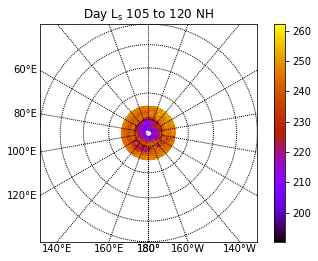

In [205]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Day $\mathregular{L_s}$ 105 to 120 NH')
x,y = m(DNTrLongSUB8,DNTrLatSUB8)
m.scatter(x, y,c=DNTrTSUB8, cmap='gnuplot', s=0.5,)
plt.colorbar()
plt.show()

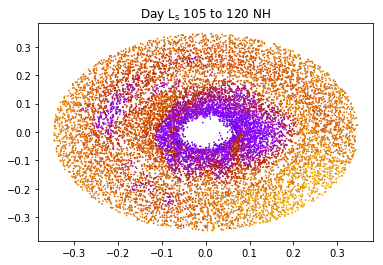

In [206]:
#re-plotted in cartesian
plt.scatter(DXN_7,DYN_7, c= DNTrTSUB8,  cmap='gnuplot', s=.5)
plt.title('Day $\mathregular{L_s}$ 105 to 120 NH')
plt.show()

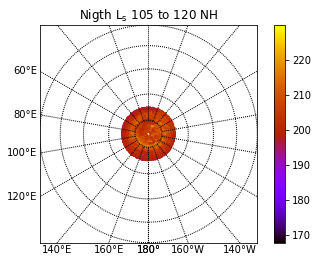

In [207]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Nigth $\mathregular{L_s}$ 105 to 120 NH')
x,y = m(NNTrLongSUB8,NNTrLatSUB8)
m.scatter(x, y,c=NNTrTSUB8, cmap='gnuplot', s=0.5)
plt.colorbar()
plt.show()

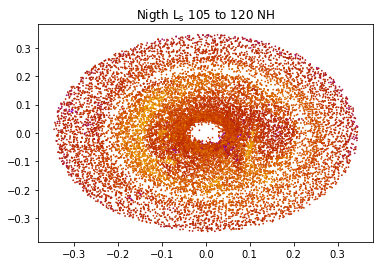

In [208]:
#re-plotted in cartesian
plt.scatter(NXN_7,NYN_7, c= NNTrTSUB8,  cmap='gnuplot', s=.5)
plt.title('Nigth $\mathregular{L_s}$ 105 to 120 NH')
plt.show()

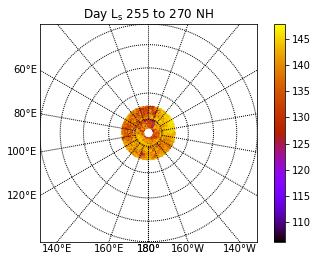

In [209]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Day $\mathregular{L_s}$ 255 to 270 NH')
x,y = m(DNTrLongSUB18,DNTrLatSUB18)
m.scatter(x, y,c=DNTrTSUB18, cmap='gnuplot', s=0.5)
plt.colorbar()
plt.show()

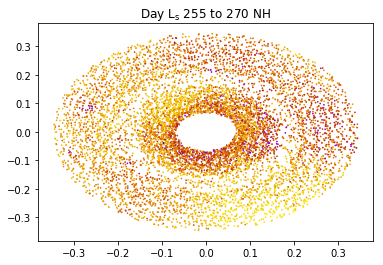

In [210]:
#re-plotted in cartesian
plt.scatter(DXN_17,DYN_17, c= DNTrTSUB18,  cmap='gnuplot', s=.5)
plt.title('Day $\mathregular{L_s}$ 255 to 270 NH')
plt.show()

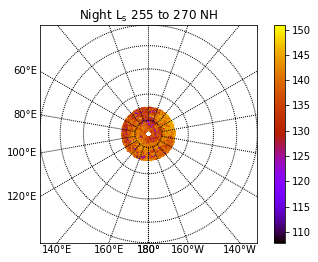

In [211]:
#Plotted each small array
m = Basemap(projection='nplaea',boundinglat=0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Night $\mathregular{L_s}$ 255 to 270 NH')
x,y = m(NNTrLongSUB18,NNTrLatSUB18)
m.scatter(x, y,c=NNTrTSUB18, cmap='gnuplot', s=0.5)
plt.colorbar()
plt.show()

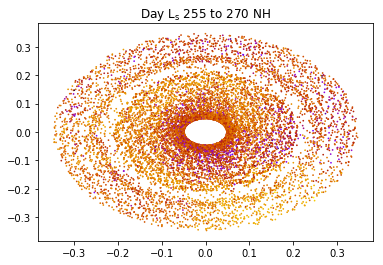

In [212]:
#re-plotted in cartesian
plt.scatter(NXN_17,NYN_17, c= NNTrTSUB18,  cmap='gnuplot', s=.5)
plt.title('Day $\mathregular{L_s}$ 255 to 270 NH')
plt.show()

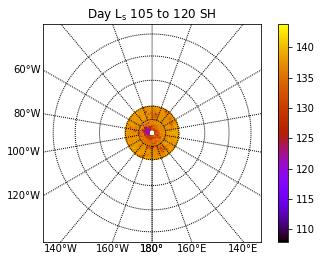

In [213]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Day $\mathregular{L_s}$ 105 to 120 SH')
x,y = m(DSTrLongSUB8,DSTrLatSUB8)
m.scatter(x, y,c=DSTrTSUB8, cmap='gnuplot', s=0.5)
plt.colorbar()
plt.show()

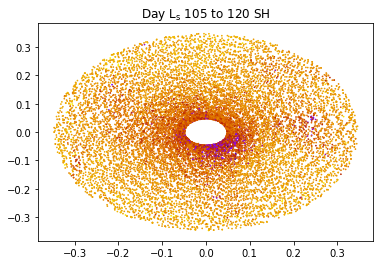

In [214]:
#re-plotted in cartesian
plt.scatter(DXS_7,DYS_7, c= DSTrTSUB8,  cmap='gnuplot', s=.5)
plt.title('Day $\mathregular{L_s}$ 105 to 120 SH')
plt.show()

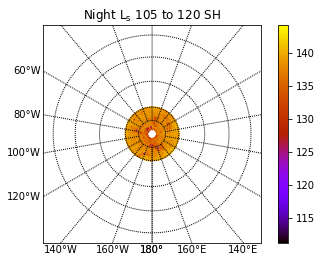

In [215]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Night $\mathregular{L_s}$ 105 to 120 SH')
x,y = m(NSTrLongSUB8,NSTrLatSUB8)
m.scatter(x, y,c=NSTrTSUB8, cmap='gnuplot', s=0.5,)
plt.colorbar()
plt.show()

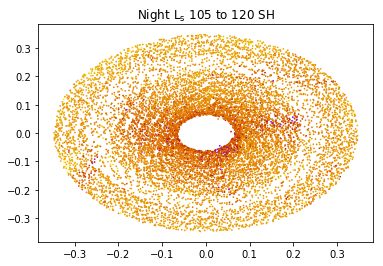

In [216]:
#re-plotted in cartesian
plt.scatter(NXS_7,NYS_7, c= NSTrTSUB8,  cmap='gnuplot', s=.5)
plt.title('Night $\mathregular{L_s}$ 105 to 120 SH')
plt.show()

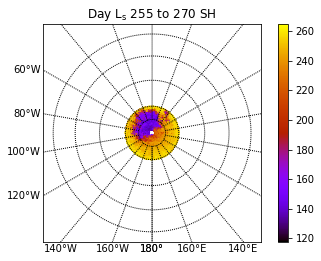

In [217]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Day $\mathregular{L_s}$ 255 to 270 SH')
x,y = m(DSTrLongSUB18,DSTrLatSUB18)
m.scatter(x, y,c=DSTrTSUB18, cmap='gnuplot', s=0.5)
plt.colorbar()
plt.show()

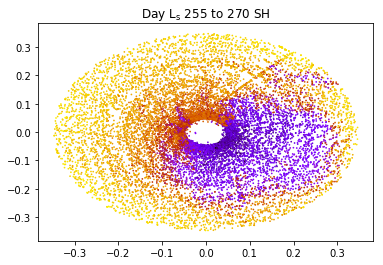

In [218]:
#re-plotted in cartesian
plt.scatter(DXS_17,DYS_17, c= DSTrTSUB18,  cmap='gnuplot', s=.5)
plt.title('Day $\mathregular{L_s}$ 255 to 270 SH')
plt.show()

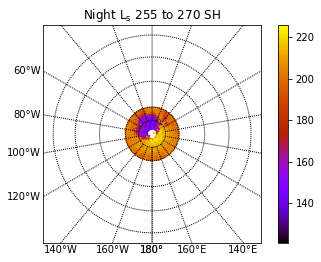

In [219]:
#Plotted each small array
m = Basemap(projection='splaea',boundinglat=-0.1,lon_0=180,resolution='l')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1,0,0,1],fontsize=10)
plt.title('Night $\mathregular{L_s}$ 255 to 270 SH')
x,y = m(NSTrLongSUB18,NSTrLatSUB18)
m.scatter(x, y,c=NSTrTSUB18, cmap='gnuplot', s=0.5)
plt.colorbar()
plt.show()

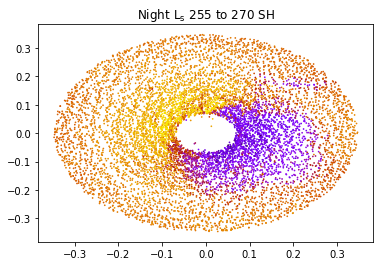

In [220]:
#re-plotted in cartesian
plt.scatter(NXS_17,NYS_17, c= NSTrTSUB18,  cmap='gnuplot', s=.5)
plt.title('Night $\mathregular{L_s}$ 255 to 270 SH')
plt.show()

In [221]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn0, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_0, DYN_0, values = DNTFLUX, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn1, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_1, DYN_1, values = DNTFLUX2, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn2, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_2, DYN_2, values = DNTFLUX3, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn3, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_3, DYN_3, values = DNTFLUX4, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn4, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_4, DYN_4, values = DNTFLUX5, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn5, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_5, DYN_5, values = DNTFLUX6, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn6, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_6, DYN_6, values = DNTFLUX7, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn7, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_7, DYN_7, values = DNTFLUX8, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn8, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_8, DYN_8, values = DNTFLUX9, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn9, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_9, DYN_9, values = DNTFLUX10, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn10, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_10, DYN_10, values = DNTFLUX11, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn11, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_11, DYN_11, values = DNTFLUX12, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn12, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_12, DYN_12, values = DNTFLUX13, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn13, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_13, DYN_13, values = DNTFLUX14, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn14, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_14, DYN_14, values = DNTFLUX15, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn15, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_15, DYN_15, values = DNTFLUX16, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn16, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_16, DYN_16, values = DNTFLUX17, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn17, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_17, DYN_17, values = DNTFLUX18, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn18, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_18, DYN_18, values = DNTFLUX19, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn19, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_19, DYN_19, values = DNTFLUX20, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn20, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_20, DYN_20, values = DNTFLUX21, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn21, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_21, DYN_21, values = DNTFLUX22, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn22, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_22, DYN_22, values = DNTFLUX23, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

dn23, xedges, yedges, binnumber = stats.binned_statistic_2d(DXN_23, DYN_23, values = DNTFLUX24, statistic='mean' , bins = [xbins, ybins])

In [222]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn0, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_0, NYN_0, values = NNTFLUX, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn1, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_1, NYN_1, values = NNTFLUX2, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn2, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_2, NYN_2, values = NNTFLUX3, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn3, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_3, NYN_3, values = NNTFLUX4, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn4, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_4, NYN_4, values = NNTFLUX5, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn5, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_5, NYN_5, values = NNTFLUX6, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn6, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_6, NYN_6, values = NNTFLUX7, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn7, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_7, NYN_7, values = NNTFLUX8, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn8, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_8, NYN_8, values = NNTFLUX9, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn9, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_9, NYN_9, values = NNTFLUX10, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn10, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_10, NYN_10, values = NNTFLUX11, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn11, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_11, NYN_11, values = NNTFLUX12, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn12, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_12, NYN_12, values = NNTFLUX13, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn13, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_13, NYN_13, values = NNTFLUX14, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn14, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_14, NYN_14, values = NNTFLUX15, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn15, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_15, NYN_15, values = NNTFLUX16, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn16, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_16, NYN_16, values = NNTFLUX17, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn17, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_17, NYN_17, values = NNTFLUX18, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn18, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_18, NYN_18, values = NNTFLUX19, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn19, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_19, NYN_19, values = NNTFLUX20, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn20, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_20, NYN_20, values = NNTFLUX21, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn21, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_21, NYN_21, values = NNTFLUX22, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn22, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_22, NYN_22, values = NNTFLUX23, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

nn23, xedges, yedges, binnumber = stats.binned_statistic_2d(NXN_23, NYN_23, values = NNTFLUX24, statistic='mean' , bins = [xbins, ybins])

In [223]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds0, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_0, DYS_0, values = DSTFLUX, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds1, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_1, DYS_1, values = DSTFLUX2, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds2, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_2, DYS_2, values = DSTFLUX3, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds3, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_3, DYS_3, values = DSTFLUX4, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds4, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_4, DYS_4, values = DSTFLUX5, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds5, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_5, DYS_5, values = DSTFLUX6, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds6, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_6, DYS_6, values = DSTFLUX7, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds7, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_7, DYS_7, values = DSTFLUX8, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds8, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_8, DYS_8, values = DSTFLUX9, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds9, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_9, DYS_9, values = DSTFLUX10, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds10, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_10, DYS_10, values = DSTFLUX11, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds11, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_11, DYS_11, values = DSTFLUX12, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds12, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_12, DYS_12, values = DSTFLUX13, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds13, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_13, DYS_13, values = DSTFLUX14, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds14, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_14, DYS_14, values = DSTFLUX15, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds15, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_15, DYS_15, values = DSTFLUX16, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds16, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_16, DYS_16, values = DSTFLUX17, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds17, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_17, DYS_17, values = DSTFLUX18, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds18, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_18, DYS_18, values = DSTFLUX19, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds19, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_19, DYS_19, values = DSTFLUX20, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds20, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_20, DYS_20, values = DSTFLUX21, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds21, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_21, DYS_21, values = DSTFLUX22, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds22, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_22, DYS_22, values = DSTFLUX23, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ds23, xedges, yedges, binnumber = stats.binned_statistic_2d(DXS_23, DYS_23, values = DSTFLUX24, statistic='mean' , bins = [xbins, ybins])

In [224]:
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns0, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_0, NYS_0, values = NSTFLUX, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns1, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_1, NYS_1, values = NSTFLUX2, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns2, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_2, NYS_2, values = NSTFLUX3, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns3, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_3, NYS_3, values = NSTFLUX4, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns4, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_4, NYS_4, values = NSTFLUX5, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns5, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_5, NYS_5, values = NSTFLUX6, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns6, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_6, NYS_6, values = NSTFLUX7, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns7, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_7, NYS_7, values = NSTFLUX8, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns8, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_8, NYS_8, values = NSTFLUX9, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns9, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_9, NYS_9, values = NSTFLUX10, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns10, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_10, NYS_10, values = NSTFLUX11, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns11, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_11, NYS_11, values = NSTFLUX12, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (North in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns12, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_12, NYS_12, values = NSTFLUX13, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns13, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_13, NYS_13, values = NSTFLUX14, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns14, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_14, NYS_14, values = NSTFLUX15, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns15, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_15, NYS_15, values = NSTFLUX16, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns16, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_16, NYS_16, values = NSTFLUX17, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns17, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_17, NYS_17, values = NSTFLUX18, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns18, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_18, NYS_18, values = NSTFLUX19, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns19, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_19, NYS_19, values = NSTFLUX20, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns20, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_20, NYS_20, values = NSTFLUX21, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns21, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_21, NYS_21, values = NSTFLUX22, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns22, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_22, NYS_22, values = NSTFLUX23, statistic='mean' , bins = [xbins, ybins])
#This is a function that stores the temperatures in an equal amount of bins and takes the mean 
#that will be used to calculate IR Flux (South in units of 15 L_s)
x_range = np.arange(-.4,.4,.01)
y_range = np.arange(-.4,.4,.01)

xbins, ybins = len(x_range), len(y_range)

ns23, xedges, yedges, binnumber = stats.binned_statistic_2d(NXS_23, NYS_23, values = NSTFLUX24, statistic='mean' , bins = [xbins, ybins])

In [225]:
#took the average and standard deviation (error) of the previous bin flux calculations for north hemisphere during the daytime
#the previous functions subdivided the tempertature maps into equal areas 
dn0flux = np.nanmean(dn0)
dn1flux = np.nanmean(dn1)
dn2flux = np.nanmean(dn2)
dn3flux = np.nanmean(dn3)
dn4flux = np.nanmean(dn4)
dn5flux = np.nanmean(dn5)
dn6flux = np.nanmean(dn6)
dn7flux = np.nanmean(dn7)
dn8flux = np.nanmean(dn8)
dn9flux = np.nanmean(dn9)
dn10flux = np.nanmean(dn10)
dn11flux = np.nanmean(dn11)
dn12flux = np.nanmean(dn12)
dn13flux = np.nanmean(dn13)
dn14flux = np.nanmean(dn14)
dn15flux = np.nanmean(dn15)
dn16flux = np.nanmean(dn16)
dn17flux = np.nanmean(dn17)
dn18flux = np.nanmean(dn18)
dn19flux = np.nanmean(dn19)
dn20flux = np.nanmean(dn20)
dn21flux = np.nanmean(dn21)
dn22flux = np.nanmean(dn22)
dn23flux = np.nanmean(dn23)

dn0SD = np.nanstd(dn0)
dn1SD = np.nanstd(dn1)
dn2SD = np.nanstd(dn2)
dn3SD = np.nanstd(dn3)
dn4SD = np.nanstd(dn4)
dn5SD = np.nanstd(dn5)
dn6SD = np.nanstd(dn6)
dn7SD = np.nanstd(dn7)
dn8SD = np.nanstd(dn8)
dn9SD = np.nanstd(dn9)
dn10SD = np.nanstd(dn10)
dn11SD = np.nanstd(dn11)
dn12SD = np.nanstd(dn12)
dn13SD = np.nanstd(dn13)
dn14SD = np.nanstd(dn14)
dn15SD = np.nanstd(dn15)
dn16SD = np.nanstd(dn16)
dn17SD = np.nanstd(dn17)
dn18SD = np.nanstd(dn18)
dn19SD = np.nanstd(dn19)
dn20SD = np.nanstd(dn20)
dn21SD = np.nanstd(dn21)
dn22SD = np.nanstd(dn22)
dn23SD = np.nanstd(dn23)

In [226]:
#took the average and standard deviation (error) of the previous bin flux calculations for north hemisphere during the nighttime
#the previous functions subdivided the tempertature maps into equal areas 
nn0flux = np.nanmean(nn0)
nn1flux = np.nanmean(nn1)
nn2flux = np.nanmean(nn2)
nn3flux = np.nanmean(nn3)
nn4flux = np.nanmean(nn4)
nn5flux = np.nanmean(nn5)
nn6flux = np.nanmean(nn6)
nn7flux = np.nanmean(nn7)
nn8flux = np.nanmean(nn8)
nn9flux = np.nanmean(nn9)
nn10flux = np.nanmean(nn10)
nn11flux = np.nanmean(nn11)
nn12flux = np.nanmean(nn12)
nn13flux = np.nanmean(nn13)
nn14flux = np.nanmean(nn14)
nn15flux = np.nanmean(nn15)
nn16flux = np.nanmean(nn16)
nn17flux = np.nanmean(nn17)
nn18flux = np.nanmean(nn18)
nn19flux = np.nanmean(nn19)
nn20flux = np.nanmean(nn20)
nn21flux = np.nanmean(nn21)
nn22flux = np.nanmean(nn22)
nn23flux = np.nanmean(nn23)

nn0SD = np.nanstd(nn0)
nn1SD = np.nanstd(nn1)
nn2SD = np.nanstd(nn2)
nn3SD = np.nanstd(nn3)
nn4SD = np.nanstd(nn4)
nn5SD = np.nanstd(nn5)
nn6SD = np.nanstd(nn6)
nn7SD = np.nanstd(nn7)
nn8SD = np.nanstd(nn8)
nn9SD = np.nanstd(nn9)
nn10SD = np.nanstd(nn10)
nn11SD = np.nanstd(nn11)
nn12SD = np.nanstd(nn12)
nn13SD = np.nanstd(nn13)
nn14SD = np.nanstd(nn14)
nn15SD = np.nanstd(nn15)
nn16SD = np.nanstd(nn16)
nn17SD = np.nanstd(nn17)
nn18SD = np.nanstd(nn18)
nn19SD = np.nanstd(nn19)
nn20SD = np.nanstd(nn20)
nn21SD = np.nanstd(nn21)
nn22SD = np.nanstd(nn22)
nn23SD = np.nanstd(nn23)

In [227]:
#took the average and standard deviation (error) of the previous bin flux calculations for south hemisphere during the daytime
#the previous functions subdivided the tempertature maps into equal areas 
ds0flux = np.nanmean(ds0)
ds1flux = np.nanmean(ds1)
ds2flux = np.nanmean(ds2)
ds3flux = np.nanmean(ds3)
ds4flux = np.nanmean(ds4)
ds5flux = np.nanmean(ds5)
ds6flux = np.nanmean(ds6)
ds7flux = np.nanmean(ds7)
ds8flux = np.nanmean(ds8)
ds9flux = np.nanmean(ds9)
ds10flux = np.nanmean(ds10)
ds11flux = np.nanmean(ds11)
ds12flux = np.nanmean(ds12)
ds13flux = np.nanmean(ds13)
ds14flux = np.nanmean(ds14)
ds15flux = np.nanmean(ds15)
ds16flux = np.nanmean(ds16)
ds17flux = np.nanmean(ds17)
ds18flux = np.nanmean(ds18)
ds19flux = np.nanmean(ds19)
ds20flux = np.nanmean(ds20)
ds21flux = np.nanmean(ds21)
ds22flux = np.nanmean(ds22)
ds23flux = np.nanmean(ds23)

ds0SD = np.nanstd(ds0)
ds1SD = np.nanstd(ds1)
ds2SD = np.nanstd(ds2)
ds3SD = np.nanstd(ds3)
ds4SD = np.nanstd(ds4)
ds5SD = np.nanstd(ds5)
ds6SD = np.nanstd(ds6)
ds7SD = np.nanstd(ds7)
ds8SD = np.nanstd(ds8)
ds9SD = np.nanstd(ds9)
ds10SD = np.nanstd(ds10)
ds11SD = np.nanstd(ds11)
ds12SD = np.nanstd(ds12)
ds13SD = np.nanstd(ds13)
ds14SD = np.nanstd(ds14)
ds15SD = np.nanstd(ds15)
ds16SD = np.nanstd(ds16)
ds17SD = np.nanstd(ds17)
ds18SD = np.nanstd(ds18)
ds19SD = np.nanstd(ds19)
ds20SD = np.nanstd(ds20)
ds21SD = np.nanstd(ds21)
ds22SD = np.nanstd(ds22)
ds23SD = np.nanstd(ds23)

In [228]:
#took the average and standard deviation (error) of the previous bin flux calculations for south hemisphere during the nighttime
#the previous functions subdivided the tempertature maps into equal areas 
ns0flux = np.nanmean(ns0)
ns1flux = np.nanmean(ns1)
ns2flux = np.nanmean(ns2)
ns3flux = np.nanmean(ns3)
ns4flux = np.nanmean(ns4)
ns5flux = np.nanmean(ns5)
ns6flux = np.nanmean(ns6)
ns7flux = np.nanmean(ns7)
ns8flux = np.nanmean(ns8)
ns9flux = np.nanmean(ns9)
ns10flux = np.nanmean(ns10)
ns11flux = np.nanmean(ns11)
ns12flux = np.nanmean(ns12)
ns13flux = np.nanmean(ns13)
ns14flux = np.nanmean(ns14)
ns15flux = np.nanmean(ns15)
ns16flux = np.nanmean(ns16)
ns17flux = np.nanmean(ns17)
ns18flux = np.nanmean(ns18)
ns19flux = np.nanmean(ns19)
ns20flux = np.nanmean(ns20)
ns21flux = np.nanmean(ns21)
ns22flux = np.nanmean(ns22)
ns23flux = np.nanmean(ns23)

ns0SD = np.nanstd(ns0)
ns1SD = np.nanstd(ns1)
ns2SD = np.nanstd(ns2)
ns3SD = np.nanstd(ns3)
ns4SD = np.nanstd(ns4)
ns5SD = np.nanstd(ns5)
ns6SD = np.nanstd(ns6)
ns7SD = np.nanstd(ns7)
ns8SD = np.nanstd(ns8)
ns9SD = np.nanstd(ns9)
ns10SD = np.nanstd(ns10)
ns11SD = np.nanstd(ns11)
ns12SD = np.nanstd(ns12)
ns13SD = np.nanstd(ns13)
ns14SD = np.nanstd(ns14)
ns15SD = np.nanstd(ns15)
ns16SD = np.nanstd(ns16)
ns17SD = np.nanstd(ns17)
ns18SD = np.nanstd(ns18)
ns19SD = np.nanstd(ns19)
ns20SD = np.nanstd(ns20)
ns21SD = np.nanstd(ns21)
ns22SD = np.nanstd(ns22)
ns23SD = np.nanstd(ns23)

In [229]:
#took previous calculations and stored them in arrays to be plotted and analysed
IRsouthNight = [ns0flux,ns1flux,ns2flux,ns3flux,ns4flux,ns5flux,ns6flux,ns7flux,ns8flux,ns9flux,ns10flux,
      ns11flux,ns12flux,ns13flux,ns14flux,ns15flux,ns16flux,ns17flux,ns18flux,ns19flux,ns20flux,ns21flux,
      ns22flux,ns23flux]
IRsouthNight = np.array(IRsouthNight)
IRsouthDay = [ds0flux,ds1flux,ds2flux,ds3flux,ds4flux,ds5flux,ds6flux,ds7flux,ds8flux,ds9flux,ds10flux,
      ds11flux,ds12flux,ds13flux,ds14flux,ds15flux,ds16flux,ds17flux,ds18flux,ds19flux,ds20flux,ds21flux,
      ds22flux,ds23flux]
IRsouthDay = np.array(IRsouthDay)
IRnorthNight = [nn0flux,nn1flux,nn2flux,nn3flux,nn4flux,nn5flux,nn6flux,nn7flux,nn8flux,nn9flux,nn10flux,
      nn11flux,nn12flux,nn13flux,nn14flux,nn15flux,nn16flux,nn17flux,nn18flux,nn19flux,nn20flux,nn21flux,
      nn22flux,nn23flux]
IRnorthNight = np.array(IRnorthNight)
IRnorthDay = [dn0flux,dn1flux,dn2flux,dn3flux,dn4flux,dn5flux,dn6flux,dn7flux,dn8flux,dn9flux,dn10flux,
      dn11flux,dn12flux,dn13flux,dn14flux,dn15flux,dn16flux,dn17flux,dn18flux,dn19flux,dn20flux,dn21flux,
      dn22flux,dn23flux]
IRnorthDay = np.array(IRnorthDay)
dn_err = [dn0SD,dn1SD,dn2SD,dn3SD,dn4SD,dn5SD,dn6SD,dn7SD,dn8SD,dn9SD,dn10SD,dn11SD,dn12SD,dn13SD,dn14SD,dn15SD,dn16SD,
         dn17SD,dn18SD,dn19SD,dn20SD,dn21SD,dn22SD,dn23SD]
nn_err = [nn0SD,nn1SD,nn2SD,nn3SD,nn4SD,nn5SD,nn6SD,nn7SD,nn8SD,nn9SD,nn10SD,nn11SD,nn12SD,nn13SD,nn14SD,nn15SD,nn16SD,
         nn17SD,nn18SD,nn19SD,nn20SD,nn21SD,nn22SD,nn23SD]
ds_err = [ds0SD,ds1SD,ds2SD,ds3SD,ds4SD,ds5SD,ds6SD,ds7SD,ds8SD,ds9SD,ds10SD,ds11SD,ds12SD,ds13SD,ds14SD,ds15SD,ds16SD,
         ds17SD,ds18SD,ds19SD,ds20SD,ds21SD,ds22SD,ds23SD]
ns_err = [ns0SD,ns1SD,ns2SD,ns3SD,ns4SD,ns5SD,ns6SD,ns7SD,ns8SD,ns9SD,ns10SD,ns11SD,ns12SD,ns13SD,ns14SD,ns15SD,ns16SD,
         ns17SD,ns18SD,ns19SD,ns20SD,ns21SD,ns22SD,ns23SD]
L_s_N = np.linspace(0,360,24)
L_s_S = np.linspace(360,0,24)

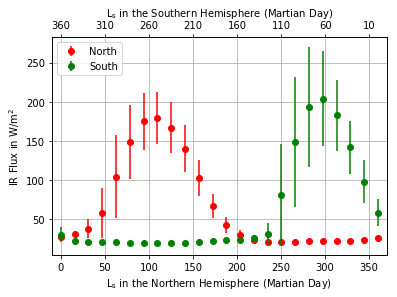

In [230]:
#plotted northern hemisphere and southern hemisphere daytime IR fluxes throughout a martian year
fig=plt.figure()
plt.grid()
plt.xlim(-10,370)
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
plt.grid()
plt.xlim(-10,370)
No = ax1.errorbar(L_s_N,IRnorthDay,yerr = dn_err, fmt = 'o', label= 'North',color = 'r')
So = ax2.errorbar(L_s_N,IRsouthDay,yerr = ds_err, fmt = 'o', label= 'South', color = 'g')
ax1.set_xlabel('$\mathregular{L_s}$ in the Northern Hemisphere (Martian Day)')
ax2.xaxis.tick_top()
ax2.set_xticklabels(['370','360','310','260','210','160','110','60','10'])
ax2.set_xlabel('$\mathregular{L_s}$ in the Southern Hemisphere (Martian Day)')
plt.legend([No,So],['North','South'], loc = 'upper left')
ax1.set_ylabel('IR Flux in W/$\mathregular{m^2}$')
plt.grid()
plt.show()

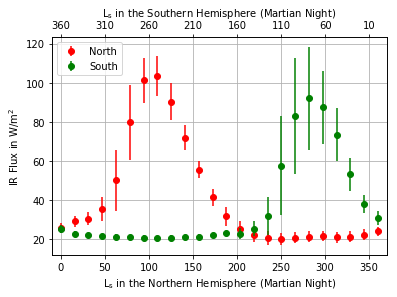

In [231]:
#plotted northern hemisphere and southern hemisphere nighttime IR fluxes throughout a martian year
fig=plt.figure()
plt.grid()
plt.xlim(-10,370)
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
plt.grid()
plt.xlim(-10,370)
No = ax1.errorbar(L_s_N,IRnorthNight,yerr = nn_err, fmt = 'o', label= 'North',color = 'r')
So = ax2.errorbar(L_s_N,IRsouthNight,yerr = ns_err, fmt = 'o', label= 'South', color = 'g')
ax1.set_xlabel('$\mathregular{L_s}$ in the Northern Hemisphere (Martian Night)')
ax2.xaxis.tick_top()
ax2.set_xticklabels(['370','360','310','260','210','160','110','60','10'])
ax2.set_xlabel('$\mathregular{L_s}$ in the Southern Hemisphere (Martian Night)')
plt.legend([No,So],['North','South'], loc = 'upper left')
ax1.set_ylabel('IR Flux in W/$\mathregular{m^2}$')
plt.grid()
plt.show()

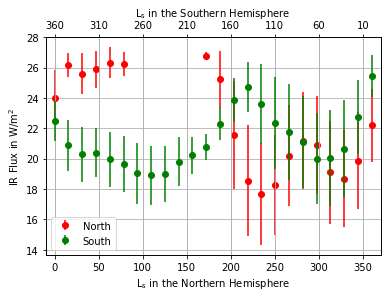

In [232]:
#re-plotted northern hemisphere and southern hemisphere CO2 IR fluxes throughout a martian year
fig=plt.figure()
plt.grid()
plt.xlim(-10,370)
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
plt.grid()
plt.xlim(-10,370)
No = ax1.errorbar(L_s_N,IRnorth,yerr = n_err, fmt = 'o', label= 'North',color = 'r')
So = ax2.errorbar(L_s_N,IRsouth,yerr = s_err, fmt = 'o', label= 'South', color = 'g')
ax1.set_xlabel('$\mathregular{L_s}$ in the Northern Hemisphere')
ax2.xaxis.tick_top()
ax2.set_xticklabels(['370','360','310','260','210','160','110','60','10'])
ax2.set_xlabel('$\mathregular{L_s}$ in the Southern Hemisphere')
plt.legend([No,So],['North','South'], loc = 'lower left')
ax1.set_ylabel('IR Flux in W/$\mathregular{m^2}$')
plt.show()

In [233]:
#created a dataframe from all the fluxes that I calculated this includes errors and L_s both in north and south
Flux = (L_s_N,  IRnorth, n_err, IRnorthDay, dn_err, IRnorthNight, nn_err, L_s_S, IRsouth, s_err, IRsouthDay, ds_err, IRsouthNight, ns_err)
Flux_right = np.transpose(Flux)
FluxDF = pd.DataFrame(list(Flux_right))
FluxDF.columns = ['North L_s', 'North CO_2', 'North CO_2 Error','North Day', 'North Day Error', 'North Night', 'North Night Error','South L_s', 'South CO_2', 'South CO_2 Error','South Day', 'South Day Error', 'South Night', 'South Night Error']

In [234]:
#checking the dataframe
FluxDF

North L_s  North CO_2  North CO_2 Error   North Day  North Day Error  \
0     0.000000   24.007337          1.803009   27.913703         2.950961   
1    15.652174   26.165111          0.771561   31.746556         4.027291   
2    31.304348   25.602672          1.366098   38.301495        11.817426   
3    46.956522   25.879145          1.239342   58.230343        32.116343   
4    62.608696   26.325834          1.009445  104.710729        53.006388   
5    78.260870   26.226320          0.775755  148.824907        47.270520   
6    93.913043         NaN               NaN  175.502880        36.345582   
7   109.565217         NaN               NaN  179.749657        33.063254   
8   125.217391         NaN               NaN  167.255233        32.420768   
9   140.869565         NaN               NaN  140.364109        29.807933   
10  156.521739         NaN               NaN  102.528688        22.880277   
11  172.173913   26.757535          0.290619   67.229697        15.161738   
12  187.826087   25.214764          1.904257   42.886141        10.555483   
13  203.478261   21.573376          3.565092   29.916968         6.526178   
14  219.130435   18.556523          3.657571   24.252019         3.951461   
15  234.782609   17.658957          3.341185   21.424886         3.172440   
16  250.434783   18.271708          3.304422   20.661651         2.858162   
17  266.086957   20.204476          3.304517   21.319993         2.742191   
18  281.739130   21.191368          3.176058   21.949690         2.575342   
19  297.391304   20.895996          3.212404   22.231666         2.281434   
20  313.043478   19.106344          3.400193   22.032159         2.393654   
21  328.695652   18.666965          3.201481   22.807345         2.453052   
22  344.347826   19.867040          3.177486   24.163751         2.310526   
23  360.000000   22.182807          2.410668   26.176856         2.339930   

    North Night  North Night Error   South L_s  South CO_2  South CO_2 Error  \
0     25.597118           2.429059  360.000000   22.492501          1.326064   
1     28.938225           2.881385  344.347826   20.871975          1.681432   
2     30.258119           3.386347  328.695652   20.294904          1.810356   
3     35.374411           6.267441  313.043478   20.377240          1.609138   
4     50.125101          15.625365  297.391304   19.963747          1.820572   
5     79.721980          19.118822  281.739130   19.628462          1.848365   
6    101.190231          11.428008  266.086957   19.042024          2.014593   
7    103.441653          10.475497  250.434783   18.893845          1.915218   
8     90.352472           9.631257  234.782609   18.994659          1.847681   
9     71.902376           6.604417  219.130435   19.802986          1.610290   
10    55.325462           4.327698  203.478261   20.227031          1.219844   
11    41.209773           4.596183  187.826087   20.777235          0.857106   
12    31.478084           4.627615  172.173913   22.310058          1.115833   
13    25.085714           4.046870  156.521739   23.887553          1.448143   
14    22.044288           3.661260  140.869565   24.722923          1.659005   
15    20.491936           3.521034  125.217391   23.609947          2.632098   
16    19.906820           2.994158  109.565217   22.356844          3.026182   
17    20.620127           2.857876   93.913043   21.773144          3.166939   
18    21.221108           2.729248   78.260870   21.088504          3.047320   
19    21.340540           2.517783   62.608696   20.000893          3.004602   
20    20.890490           2.782417   46.956522   20.048825          3.145816   
21    21.176717           2.819068   31.304348   20.642115          3.197203   
22    22.179795           2.703049   15.652174   22.753518          2.429554   
23    23.996524           2.294007    0.000000   25.448214          1.371595   

     South Day  South Day Error  South Night  South Night Error  
0    30.4946

In [235]:
#converted dataframe to csv file
FluxDF.to_csv('mcsfluxes.csv')

In [236]:
#averaged the norhtern and southern fluxes and calculated their errors
IRAVGN= (IRnorthDay+IRnorthNight)/2
IRAVGS= (IRsouthDay+IRsouthNight)/2
ERRAVGN= ((np.array(dn_err)+np.array(nn_err))/2)/np.sqrt(len(dn_err))
ERRAVGS= ((np.array(ds_err)+np.array(ns_err))/2)/np.sqrt(len(ds_err))

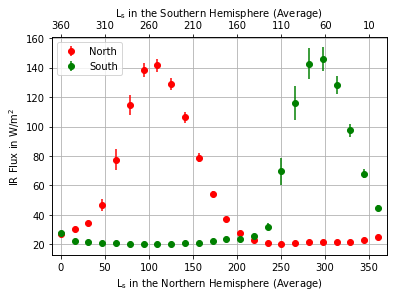

In [237]:
#plotted the average northern and southern hemisphere fluxes
fig=plt.figure()
plt.grid()
plt.xlim(-10,370)
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
plt.grid()
plt.xlim(-10,370)
No = ax1.errorbar(L_s_N,IRAVGN,yerr = ERRAVGN, fmt = 'o', label= 'North',color = 'r')
So = ax2.errorbar(L_s_N,IRAVGS,yerr = ERRAVGS, fmt = 'o', label= 'South', color = 'g')
ax1.set_xlabel('$\mathregular{L_s}$ in the Northern Hemisphere (Average)')
ax2.xaxis.tick_top()
ax2.set_xticklabels(['370','360','310','260','210','160','110','60','10'])
ax2.set_xlabel('$\mathregular{L_s}$ in the Southern Hemisphere (Average)')
plt.legend([No,So],['North','South'], loc = 'upper left')
ax1.set_ylabel('IR Flux in W/$\mathregular{m^2}$')
plt.grid()
plt.show()

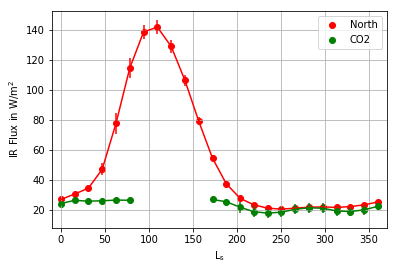

In [238]:
#plotted average northern hemisphere average flux vs. CO2 flux
plt.scatter(L_s_N,IRAVGN, label= 'North',color = 'r')
plt.scatter(L_s_N,IRnorth, label= 'CO2',color = 'g')
plt.errorbar(L_s_N,IRAVGN,yerr = ERRAVGN,color = 'r')
plt.errorbar(L_s_N,IRnorth,yerr = n_err,color = 'g')
plt.xlabel('$\mathregular{L_s}$')
plt.ylabel('IR Flux in W/$\mathregular{m^2}$')
plt.grid()
plt.xlim(-10,370)
plt.legend()
plt.show()

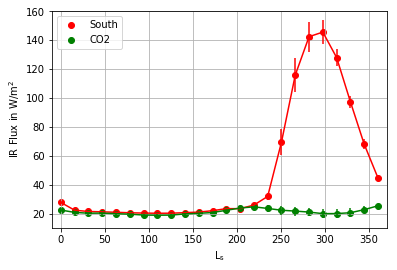

In [239]:
#plotted average southern hemisphere average flux vs. CO2 flux
plt.scatter(L_s_N,IRAVGS, label= 'South',color = 'r')
plt.scatter(L_s_N,IRsouth, label= 'CO2',color = 'g')
plt.errorbar(L_s_N,IRAVGS,yerr = ERRAVGS,color = 'r')
plt.errorbar(L_s_N,IRsouth,yerr = s_err,color = 'g')
plt.xlabel('$\mathregular{L_s}$')
plt.ylabel('IR Flux in W/$\mathregular{m^2}$')
plt.grid()
plt.xlim(-10,370)
plt.legend()
plt.show()